# Preprocessing Data

In [2]:
#importing relevant libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#for warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
from tqdm import tqdm
import math
from scipy.interpolate import interp1d
import seaborn as sns

In [2]:
folder_path="C:/Users/Mert/OneDrive - University of Sussex/second term/Machine Learning/assignment/dataset"

In [3]:
dir_list = os.listdir(folder_path)

In [4]:
for file_name in dir_list:
    print(file_name)
    index=file_name.find("-")
    df_name=file_name[:index-1]

Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv
Crops production indicators - FAOSTAT_data_en_2-22-2024.csv
Emissions - FAOSTAT_data_en_2-27-2024.csv
Employment - FAOSTAT_data_en_2-27-2024.csv
Exchange rate - FAOSTAT_data_en_2-22-2024.csv
Fertilizers use - FAOSTAT_data_en_2-27-2024.csv
Food balances indicators - FAOSTAT_data_en_2-22-2024.csv
Food security indicators  - FAOSTAT_data_en_2-22-2024.csv
Food trade indicators - FAOSTAT_data_en_2-22-2024.csv
Foreign direct investment - FAOSTAT_data_en_2-27-2024.csv
Land temperature change - FAOSTAT_data_en_2-27-2024.csv
Land use - FAOSTAT_data_en_2-22-2024.csv
Pesticides use - FAOSTAT_data_en_2-27-2024.csv


Consumer prices indicators 
Crops production indicators 
Emissions 
Employment 
Exchange rate 
Fertilizers use
Food balances indicators 
Food security indicators 
Food trade indicators 
Foreign direct investment 
Land temperature change 
Land use 
Pesticides use 

In [5]:
#check whether there is a null value in any cell, if there is, gives the total number, percentage over dataframe, column names
def check_null(df):
    any_null=df.isnull().values.any()
    if any_null==True:
        null_total_rows=len(df[df.isnull().any(axis=1)])
        print("Total number of null rows: {}".format(null_total_rows))
        percentage_null=null_total_rows*100/len(df)
        print("The total percentage of null values in dataframe: {:.2f}%".format(percentage_null))
        null_columns = df.isnull().any()
        print("Null-valued Columns:")
        print("--------------")
        print(null_columns)
  
    elif any_null==False:
        print("There is no null value in dataframe")

# **1. Consumer prices indicators**

In [6]:
df=pd.read_csv(folder_path+"/"+"Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv")
df.head()

Domain Code                  Domain  Area Code (M49)         Area  \
0          CP  Consumer Price Indices                4  Afghanistan   
1          CP  Consumer Price Indices                4  Afghanistan   
2          CP  Consumer Price Indices                4  Afghanistan   
3          CP  Consumer Price Indices                4  Afghanistan   
4          CP  Consumer Price Indices                4  Afghanistan   

   Year Code  Year  Item Code                                        Item  \
0       2000  2000      23013  Consumer Prices, Food Indices (2015 = 100)   
1       2000  2000      23013  Consumer Prices, Food Indices (2015 = 100)   
2       2000  2000      23013  Consumer Prices, Food Indices (2015 = 100)   
3       2000  2000      23013  Consumer Prices, Food Indices (2015 = 100)   
4       2000  2000      23013  Consumer Prices, Food Indices (2015 = 100)   

   Months Code    Months  Element Code Element Unit      Value Flag  \
0         7001   January          6125   Value  NaN  24.356332    I   
1         7002  February          6125   Value  NaN  23.636242    I   
2         7003     March          6125   Value  NaN  23.485345    I   
3         7004     April          6125   Value  NaN  24.767194    I   
4         7005       May          6125   Value  NaN  25.956912    I   

  Flag Description               Note  
0    Imputed value  base year is 2015  
1    Imputed value  base year is 2015  
2    Imputed value  base year is 2015  
3    Imputed value  base year is 2015  
4    Imputed value  base year is 2015

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112890 entries, 0 to 112889
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       112890 non-null  object 
 1   Domain            112890 non-null  object 
 2   Area Code (M49)   112890 non-null  int64  
 3   Area              112890 non-null  object 
 4   Year Code         112890 non-null  int64  
 5   Year              112890 non-null  int64  
 6   Item Code         112890 non-null  int64  
 7   Item              112890 non-null  object 
 8   Months Code       112890 non-null  int64  
 9   Months            112890 non-null  object 
 10  Element Code      112890 non-null  int64  
 11  Element           112890 non-null  object 
 12  Unit              55227 non-null   object 
 13  Value             112890 non-null  float64
 14  Flag              112890 non-null  object 
 15  Flag Description  112890 non-null  object 
 16  Note              57

In [8]:
df.Item.unique()

array(['Consumer Prices, Food Indices (2015 = 100)',
       'Food price inflation'], dtype=object)

In [9]:
df.Unit.unique()

array([nan, '%'], dtype=object)

In [10]:
df.Note.unique()

array(['base year is 2015', nan], dtype=object)

https://files-faostat.fao.org/production/CP/CP_e.pdf

From the file in the link above, it can be seen that the values on the table are based on the year of 2015. By using the formula indicated in the pdf file. 2 functions are created.

In [11]:
def find_geometric_mean(country):
    values=df[(df['Area']==country)&(df.Year==2015)&(df.Item=="Consumer Prices, Food Indices (2015 = 100)")].Value
    c=1
    t=0
    for i in values:
        t+=1
        c*=i
    geometric_mean_2015=c**(1/t)
    return geometric_mean_2015

In [12]:
def find_value(country,year,month):
    geometric_mean_2015=find_geometric_mean(country)
    value=float(df[(df['Area']==country)&(df.Year==year)&(df.Months==month)&(df.Item=="Consumer Prices, Food Indices (2015 = 100)")].Value)
    return value*geometric_mean_2015/100

In [13]:
find_value("Cayman Islands",2000,"January")

59.54936601183617

In [14]:
df[(df['Area']=="Cayman Islands")&(df.Year==2000)&(df.Months=="January")&(df.Item=="Consumer Prices, Food Indices (2015 = 100)")].Value

20646    59.549366
Name: Value, dtype: float64

As if can be seen above, the values are the same.

In [15]:
for i in df.Area.unique():
    print(i,":",find_geometric_mean(i))

Afghanistan : 100.0000000481465
Åland Islands : 99.99999986799713
Albania : 99.99999992800437
Algeria : 100.00000004710982
Andorra : 100.00000003943815
Angola : 100.00000002857867
Anguilla : 99.99999998587272
Antigua and Barbuda : 99.99999989872681
Argentina : 100.00000003939952
Armenia : 99.99999986091856
Aruba : 99.99999987507444
Australia : 99.96801530705139
Austria : 99.99950906155195
Azerbaijan : 99.99999998221824
Bahamas : 99.99999987602882
Bahrain : 100.00000009308732
Bangladesh : 99.99999989519824
Barbados : 99.99999990436415
Belarus : 100.00000016664646
Belgium : 99.99779450215632
Belize : 100.00000004377156
Benin : 99.99999995299855
Bermuda : 100.00000003861007
Bhutan : 99.99999991890235
Bolivia (Plurinational State of) : 100.00000013788087
Bosnia and Herzegovina : 99.99166752452103
Botswana : 100.0000002025866
Brazil : 99.96062246772762
British Virgin Islands : 99.9999999438093
Brunei Darussalam : 99.99999984991007
Bulgaria : 99.99999995915864
Burkina Faso : 100.000000012374

After checking the geometric means of each country. All of them can be accepted as 100. Because of that, the values in the table are found with an error of 0.001 maybe. Therefore, there is no necessity to change the values.

In [16]:
df[(df.Area=='Türkiye') & ((df.Year==2001) | (df.Year==2000)) & (df.Months=="January")]

Domain Code                  Domain  Area Code (M49)     Area  \
104520          CP  Consumer Price Indices              792  Türkiye   
104532          CP  Consumer Price Indices              792  Türkiye   
104805          CP  Consumer Price Indices              792  Türkiye   

        Year Code  Year  Item Code  \
104520       2000  2000      23013   
104532       2001  2001      23013   
104805       2001  2001      23014   

                                              Item  Months Code   Months  \
104520  Consumer Prices, Food Indices (2015 = 100)         7001  January   
104532  Consumer Prices, Food Indices (2015 = 100)         7001  January   
104805                        Food price inflation         7001  January   

        Element Code Element Unit      Value Flag  \
104520          6125   Value  NaN  10.808510    X   
104532          6125   Value  NaN  14.316070    X   
104805          6121   Value    %  32.451837    E   

                               Flag Description               Note  
104520  Figure from international organizations  base year is 2015  
104532  Figure from international organizations  base year is 2015  
104805                          Estimated value                NaN

In [17]:
diff_percentage_2001=df[(df.Area=='Türkiye') & (df.Year==2001) & (df.Months=="January") & (df.Unit=='%')].Value.iloc[0]

In [18]:
january_2000=df[(df.Area=='Türkiye') & (df.Year==2000) & (df.Months=="January") & (df.Unit!='%')].Value.iloc[0]
january_2001=df[(df.Area=='Türkiye') & (df.Year==2001) & (df.Months=="January") & (df.Unit!='%')].Value.iloc[0]
difference_in_percentage=(january_2001*100/january_2000)-100

diff_percentage_2001=df[(df.Area=='Türkiye') & (df.Year==2001) & (df.Months=="January") & (df.Unit=='%')].Value.iloc[0]


print("Difference between January,2001 and January,2000 found by calculation is {:.6f}%".format(difference_in_percentage))
print("The value in the table {}%".format(diff_percentage_2001))

Difference between January,2001 and January,2000 found by calculation is 32.451837%
The value in the table 32.451837%


As it can be above, there are values as % and NaN. If we take the difference between the same month of subsequent years, we can get the % value. Because of that, there is no point of keeping % values in the table.

In [19]:
#exclude % from unit
df=df[df["Unit"]!="%"]

In [20]:
df["Unit"]="index"

In [21]:
df=df[["Domain","Area", "Year", "Months","Unit","Value","Item"]]
df=df[df.Item!="Food price inflation"]
df.Domain="consumer_prices"
df=df.drop(columns=["Item"])
df = df.reset_index(drop=True)
df

Domain         Area  Year     Months   Unit         Value
0      consumer_prices  Afghanistan  2000    January  index     24.356332
1      consumer_prices  Afghanistan  2000   February  index     23.636242
2      consumer_prices  Afghanistan  2000      March  index     23.485345
3      consumer_prices  Afghanistan  2000      April  index     24.767194
4      consumer_prices  Afghanistan  2000        May  index     25.956912
...                ...          ...   ...        ...    ...           ...
57658  consumer_prices     Zimbabwe  2023        May  index  31805.005520
57659  consumer_prices     Zimbabwe  2023       June  index  64932.543300
57660  consumer_prices     Zimbabwe  2023       July  index  45020.232070
57661  consumer_prices     Zimbabwe  2023     August  index  41816.916720
57662  consumer_prices     Zimbabwe  2023  September  index  41924.478360

[57663 rows x 6 columns]

In [22]:
check_null(df)

There is no null value in dataframe


In [23]:
df_consumer_prices=df

In [24]:
#groupping data frame year by year rather than each months
df_consumer_prices2=df_consumer_prices.groupby(['Area', 'Year',"Domain","Unit"])['Value'].sum().reset_index()
df_consumer_prices2

Area  Year           Domain   Unit        Value
0       Afghanistan  2000  consumer_prices  index   319.558176
1       Afghanistan  2001  consumer_prices  index   358.722573
2       Afghanistan  2002  consumer_prices  index   424.138702
3       Afghanistan  2003  consumer_prices  index   482.437360
4       Afghanistan  2004  consumer_prices  index   550.086733
...             ...   ...              ...    ...          ...
4851  Åland Islands  2019  consumer_prices  index  1235.141236
4852  Åland Islands  2020  consumer_prices  index  1243.021645
4853  Åland Islands  2021  consumer_prices  index  1257.412162
4854  Åland Islands  2022  consumer_prices  index  1379.329541
4855  Åland Islands  2023  consumer_prices  index  1145.727717

[4856 rows x 5 columns]

In [25]:
#function to find unique min and max values in all dataframe
def check_min_max_uniques(df):
    min_max_years=df.groupby('Area')['Year'].agg(['min', 'max']).reset_index()
    print("min:", min_max_years["min"].unique(), "max:", min_max_years["max"].unique())
    return min_max_years

In [26]:
min_max_years=check_min_max_uniques(df)

min: [2000 2008] max: [2023]


In [27]:
#creating a df, min and max values for each country
min_max_years=df_consumer_prices2.groupby('Area')['Year'].agg(['min', 'max']).reset_index()
min_max_years 

Area   min   max
0      Afghanistan  2000  2023
1          Albania  2000  2023
2          Algeria  2000  2023
3          Andorra  2000  2023
4           Angola  2000  2023
..             ...   ...   ...
198       Viet Nam  2000  2023
199          Yemen  2000  2023
200         Zambia  2000  2023
201       Zimbabwe  2000  2023
202  Åland Islands  2000  2023

[203 rows x 3 columns]

In [28]:
min_max_years["min"].unique()

array([2000, 2008], dtype=int64)

In [29]:
min_max_years["max"].unique()

array([2023], dtype=int64)

In [30]:
#finding the countries where min year different from 2000
def find_different_min(min_max_years):
    different_min={}
    for i in range(len(min_max_years)):
        year=list(min_max_years[["min","Area"]].iloc[i])[0]
        area=list(min_max_years[["min","Area"]].iloc[i])[1]
        if year!=2000:
            #print(area,year)
            different_min[area]=year
    print(different_min)
    return different_min

In [31]:
different_min=find_different_min(min_max_years)

{'South Sudan': 2008, 'Sudan': 2008}


In [32]:
#finding the countries where max year different from 2023
def find_different_max(min_max_years):
    different_max={}
    for i in range(len(min_max_years)):
        year=list(min_max_years[["max","Area"]].iloc[i])[0]
        area=list(min_max_years[["max","Area"]].iloc[i])[1]
        if year<2022:
            #print(area,year)
            different_max[area]=year
    print(different_max)
    return different_max

In [33]:
#interpolation function
def interpolation(x_data,y_data,x_predictions,par="forward"):
    #forward interpolation
    if par=="forward":
        
        #linear interpolation to predict the other values
        f_linear = interp1d(x_data, y_data, kind='linear', fill_value="extrapolate")

        #predictions
        y_predictions=list(f_linear(x_prediction))
        
    #backward interpolation
    if par=="backward":
        #reverse data for backward
        x_data=x_data[::-1]
        y_data=y_data[::-1]
        
        #linear interpolation to predict the other values
        f_linear = interp1d(x_data, y_data, kind='linear', fill_value="extrapolate")

        #predictions
        y_prediction=list(f_linear(x_prediction))
        
        x_predictions=x_prediction
        y_predictions=y_prediction
        

        
    return x_predictions, y_predictions

In [34]:
predictions={}
for i in range(len(different_min)):
    area=list(different_min.keys())[i]
    #x: year y: value
    x_values=list(df_consumer_prices2[df_consumer_prices2["Area"]==area].Year)
    y_values=list(df_consumer_prices2[df_consumer_prices2["Area"]==area].Value)
    
    #x values to be predicted
    x_prediction=[i for i in range(list(different_min.values())[0]-1, 1999, -1)]
    
    #predicts value according to the function
    x_prediction,y_prediction=interpolation(x_values,y_values,x_prediction,par="backward")
    
    predictions[area]={"x":x_prediction, "y": y_prediction}

In [35]:
predictions

{'South Sudan': {'x': [2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000],
  'y': [322.71187000000003,
   305.45155400000004,
   288.19123800000006,
   270.93092200000007,
   253.67060600000008,
   236.4102900000001,
   219.1499740000001,
   201.8896580000001]},
 'Sudan': {'x': [2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000],
  'y': [249.19799800000004,
   214.46816600000005,
   179.73833400000007,
   145.00850200000008,
   110.27867000000009,
   75.5488380000001,
   40.819006000000115,
   6.089174000000128]}}

In [36]:
df_consumer_prices3=df_consumer_prices2.copy(deep=True)

In [37]:
year=list(predictions.values())[0]["x"]
value=list(predictions.values())[0]["y"]

In [38]:
new_rows=[]
for area in list(predictions.keys()):
    for y,v in zip(year,value):
        new_rows.append({"Area":area,
                         "Year": y, 
                         "Domain": "consumer_prices",
                         "Unit": "index", 
                         "Value": v})
df_new_rows = pd.DataFrame(new_rows)        

In [39]:
df_consumer_prices2[df_consumer_prices2["Area"]==list(different_min.keys())[0]]

Area  Year           Domain   Unit         Value
4128  South Sudan  2008  consumer_prices  index    339.972186
4129  South Sudan  2009  consumer_prices  index    357.232502
4130  South Sudan  2010  consumer_prices  index    359.367918
4131  South Sudan  2011  consumer_prices  index    548.903285
4132  South Sudan  2012  consumer_prices  index    794.951420
4133  South Sudan  2013  consumer_prices  index    763.208327
4134  South Sudan  2014  consumer_prices  index    783.185570
4135  South Sudan  2015  consumer_prices  index   1254.926620
4136  South Sudan  2016  consumer_prices  index   5968.624988
4137  South Sudan  2017  consumer_prices  index  16437.571533
4138  South Sudan  2018  consumer_prices  index  28001.330922
4139  South Sudan  2019  consumer_prices  index  58230.866224
4140  South Sudan  2020  consumer_prices  index  72047.015287
4141  South Sudan  2021  consumer_prices  index  86784.387464
4142  South Sudan  2022  consumer_prices  index  79167.074832
4143  South Sudan  2023  consumer_prices  index  55768.981467

In [40]:
df_consumer_prices2=pd.concat([df_consumer_prices2, df_new_rows], ignore_index=True)

In [41]:
df_consumer_prices2 = df_consumer_prices2.reset_index(drop=True)
df_consumer_prices2=df_consumer_prices2.rename(columns={"Value":"value_CPindex"})
df_consumer_prices2

Area  Year           Domain   Unit  value_CPindex
0     Afghanistan  2000  consumer_prices  index     319.558176
1     Afghanistan  2001  consumer_prices  index     358.722573
2     Afghanistan  2002  consumer_prices  index     424.138702
3     Afghanistan  2003  consumer_prices  index     482.437360
4     Afghanistan  2004  consumer_prices  index     550.086733
...           ...   ...              ...    ...            ...
4867        Sudan  2004  consumer_prices  index     270.930922
4868        Sudan  2003  consumer_prices  index     253.670606
4869        Sudan  2002  consumer_prices  index     236.410290
4870        Sudan  2001  consumer_prices  index     219.149974
4871        Sudan  2000  consumer_prices  index     201.889658

[4872 rows x 5 columns]

In [42]:
check_min_max_uniques(df_consumer_prices2)

min: [2000] max: [2023]


Area   min   max
0      Afghanistan  2000  2023
1          Albania  2000  2023
2          Algeria  2000  2023
3          Andorra  2000  2023
4           Angola  2000  2023
..             ...   ...   ...
198       Viet Nam  2000  2023
199          Yemen  2000  2023
200         Zambia  2000  2023
201       Zimbabwe  2000  2023
202  Åland Islands  2000  2023

[203 rows x 3 columns]

In [43]:
check_null(df_consumer_prices2)

There is no null value in dataframe


In [44]:
df_consumer_prices2

Area  Year           Domain   Unit  value_CPindex
0     Afghanistan  2000  consumer_prices  index     319.558176
1     Afghanistan  2001  consumer_prices  index     358.722573
2     Afghanistan  2002  consumer_prices  index     424.138702
3     Afghanistan  2003  consumer_prices  index     482.437360
4     Afghanistan  2004  consumer_prices  index     550.086733
...           ...   ...              ...    ...            ...
4867        Sudan  2004  consumer_prices  index     270.930922
4868        Sudan  2003  consumer_prices  index     253.670606
4869        Sudan  2002  consumer_prices  index     236.410290
4870        Sudan  2001  consumer_prices  index     219.149974
4871        Sudan  2000  consumer_prices  index     201.889658

[4872 rows x 5 columns]

In [45]:
df=df_consumer_prices2

In [46]:
df.to_csv('new_datasets/Consumer_prices.csv', index=False)

# **2. Crops production indicators**

In [424]:
df=pd.read_csv(folder_path+"/"+"Crops production indicators - FAOSTAT_data_en_2-22-2024.csv")
df.head()

Domain Code                        Domain  Area Code (M49)         Area  \
0         QCL  Crops and livestock products                4  Afghanistan   
1         QCL  Crops and livestock products                4  Afghanistan   
2         QCL  Crops and livestock products                4  Afghanistan   
3         QCL  Crops and livestock products                4  Afghanistan   
4         QCL  Crops and livestock products                4  Afghanistan   

   Element Code Element Item Code (CPC)              Item  Year Code  Year  \
0          5419   Yield           F1717  Cereals, primary       2000  2000   
1          5419   Yield           F1717  Cereals, primary       2001  2001   
2          5419   Yield           F1717  Cereals, primary       2002  2002   
3          5419   Yield           F1717  Cereals, primary       2003  2003   
4          5419   Yield           F1717  Cereals, primary       2004  2004   

       Unit  Value Flag Flag Description  Note  
0  100 g/ha   8063    A  Official figure   NaN  
1  100 g/ha  10067    A  Official figure   NaN  
2  100 g/ha  16698    A  Official figure   NaN  
3  100 g/ha  14580    A  Official figure   NaN  
4  100 g/ha  13348    A  Official figure   NaN

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41649 entries, 0 to 41648
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       41649 non-null  object 
 1   Domain            41649 non-null  object 
 2   Area Code (M49)   41649 non-null  int64  
 3   Area              41649 non-null  object 
 4   Element Code      41649 non-null  int64  
 5   Element           41649 non-null  object 
 6   Item Code (CPC)   41649 non-null  object 
 7   Item              41649 non-null  object 
 8   Year Code         41649 non-null  int64  
 9   Year              41649 non-null  int64  
 10  Unit              41649 non-null  object 
 11  Value             41649 non-null  int64  
 12  Flag              41649 non-null  object 
 13  Flag Description  41649 non-null  object 
 14  Note              0 non-null      float64
dtypes: float64(1), int64(5), object(9)
memory usage: 4.8+ MB


In [426]:
df.Element.unique()

array(['Yield'], dtype=object)

In [427]:
df.Item.unique()

array(['Cereals, primary', 'Citrus Fruit, Total',
       'Fibre Crops, Fibre Equivalent', 'Fruit Primary',
       'Oilcrops, Cake Equivalent', 'Oilcrops, Oil Equivalent',
       'Pulses, Total', 'Roots and Tubers, Total', 'Sugar Crops Primary',
       'Treenuts, Total', 'Vegetables Primary'], dtype=object)

In [428]:
item_country_counts = df.groupby('Item')['Area'].nunique().reset_index()
item_country_counts.columns = ['Item', 'Number of Countries']

In [429]:
item_country_counts

Item  Number of Countries
0                Cereals, primary                  186
1             Citrus Fruit, Total                  144
2   Fibre Crops, Fibre Equivalent                  126
3                   Fruit Primary                  202
4       Oilcrops, Cake Equivalent                  193
5        Oilcrops, Oil Equivalent                  196
6                   Pulses, Total                  178
7         Roots and Tubers, Total                  201
8             Sugar Crops Primary                  149
9                 Treenuts, Total                  119
10             Vegetables Primary                  201

As it can be seen above, all items don't exist in each country. Because of that, the total value of them must be added to each country.

In [430]:
df_groupped=df.groupby(['Area', 'Year','Domain','Unit'])['Value'].sum().reset_index()
df_groupped

Area  Year                        Domain      Unit    Value
0     Afghanistan  2000  Crops and livestock products  100 g/ha   661957
1     Afghanistan  2001  Crops and livestock products  100 g/ha   667714
2     Afghanistan  2002  Crops and livestock products  100 g/ha   672489
3     Afghanistan  2003  Crops and livestock products  100 g/ha   673301
4     Afghanistan  2004  Crops and livestock products  100 g/ha   675944
...           ...   ...                           ...       ...      ...
4582     Zimbabwe  2018  Crops and livestock products  100 g/ha  1099976
4583     Zimbabwe  2019  Crops and livestock products  100 g/ha  1070311
4584     Zimbabwe  2020  Crops and livestock products  100 g/ha  1061712
4585     Zimbabwe  2021  Crops and livestock products  100 g/ha  1050425
4586     Zimbabwe  2022  Crops and livestock products  100 g/ha  1115004

[4587 rows x 5 columns]

In [431]:
min_max_years=check_min_max_uniques(df_groupped)

min: [2000 2006 2012] max: [2022 2006 2005 2011]


In [432]:
min_max_years

Area   min   max
0                           Afghanistan  2000  2022
1                               Albania  2000  2022
2                               Algeria  2000  2022
3                                Angola  2000  2022
4                   Antigua and Barbuda  2000  2022
..                                  ...   ...   ...
200  Venezuela (Bolivarian Republic of)  2000  2022
201                            Viet Nam  2000  2022
202                               Yemen  2000  2022
203                              Zambia  2000  2022
204                            Zimbabwe  2000  2022

[205 rows x 3 columns]

In [433]:
different_min=find_different_min(min_max_years)

{'Montenegro': 2006, 'Serbia': 2006, 'South Sudan': 2012, 'Sudan': 2012}


In [434]:
different_max=find_different_max(min_max_years)

{'French Guiana': 2006, 'Guadeloupe': 2006, 'Martinique': 2006, 'Réunion': 2006, 'Serbia and Montenegro': 2005, 'Sudan (former)': 2011}


In the table there are 2 areas called Sudan and Sudan(former) they must be merged as Sudan

In [435]:
df_groupped.loc[(df_groupped["Area"]=="Sudan (former)"), "Area"]="Sudan"
df_groupped=df_groupped.groupby(['Area', 'Year','Domain','Unit'])['Value'].sum().reset_index()

In [436]:
df_groupped[df_groupped["Area"]=="Sudan"]

Area  Year                        Domain      Unit    Value
3897  Sudan  2000  Crops and livestock products  100 g/ha  1214462
3898  Sudan  2001  Crops and livestock products  100 g/ha  1292332
3899  Sudan  2002  Crops and livestock products  100 g/ha  1417587
3900  Sudan  2003  Crops and livestock products  100 g/ha  1510540
3901  Sudan  2004  Crops and livestock products  100 g/ha  1576275
3902  Sudan  2005  Crops and livestock products  100 g/ha  1558187
3903  Sudan  2006  Crops and livestock products  100 g/ha  1517420
3904  Sudan  2007  Crops and livestock products  100 g/ha  1573054
3905  Sudan  2008  Crops and livestock products  100 g/ha  1562815
3906  Sudan  2009  Crops and livestock products  100 g/ha  1562535
3907  Sudan  2010  Crops and livestock products  100 g/ha  1485462
3908  Sudan  2011  Crops and livestock products  100 g/ha  1484994
3909  Sudan  2012  Crops and livestock products  100 g/ha  1515425
3910  Sudan  2013  Crops and livestock products  100 g/ha  1481732
3911  Sudan  2014  Crops and livestock products  100 g/ha  1331159
3912  Sudan  2015  Crops and livestock products  100 g/ha  1297762
3913  Sudan  2016  Crops and livestock products  100 g/ha  1245891
3914  Sudan  2017  Crops and livestock products  100 g/ha  1214795
3915  Sudan  2018  Crops and livestock products  100 g/ha  1271207
3916  Sudan  2019  Crops and livestock products  100 g/ha  1195208
3917  Sudan  2020  Crops and livestock products  100 g/ha  1181607
3918  Sudan  2021  Crops and livestock products  100 g/ha  1168955
3919  Sudan  2022  Crops and livestock products  100 g/ha  1148398

In [437]:
min_max_years=check_min_max_uniques(df_groupped)

min: [2000 2006 2012] max: [2022 2006 2005]


In [438]:
different_min=find_different_min(min_max_years)

{'Montenegro': 2006, 'Serbia': 2006, 'South Sudan': 2012}


In [439]:
different_max=find_different_max(min_max_years)

{'French Guiana': 2006, 'Guadeloupe': 2006, 'Martinique': 2006, 'Réunion': 2006, 'Serbia and Montenegro': 2005}


These countries don't have many values in the dataframe. Excluding them can perform

In [440]:
south_sudan = df_groupped[df_groupped['Area'] == 'South Sudan']
sudan = df_groupped[df_groupped['Area'] == 'Sudan']

In [441]:
south_sudan

Area  Year                        Domain      Unit   Value
3840  South Sudan  2012  Crops and livestock products  100 g/ha  362929
3841  South Sudan  2013  Crops and livestock products  100 g/ha  279791
3842  South Sudan  2014  Crops and livestock products  100 g/ha  322171
3843  South Sudan  2015  Crops and livestock products  100 g/ha  410580
3844  South Sudan  2016  Crops and livestock products  100 g/ha  401825
3845  South Sudan  2017  Crops and livestock products  100 g/ha  400150
3846  South Sudan  2018  Crops and livestock products  100 g/ha  405153
3847  South Sudan  2019  Crops and livestock products  100 g/ha  404350
3848  South Sudan  2020  Crops and livestock products  100 g/ha  406969
3849  South Sudan  2021  Crops and livestock products  100 g/ha  408338
3850  South Sudan  2022  Crops and livestock products  100 g/ha  416679

In [442]:
sudan

Area  Year                        Domain      Unit    Value
3897  Sudan  2000  Crops and livestock products  100 g/ha  1214462
3898  Sudan  2001  Crops and livestock products  100 g/ha  1292332
3899  Sudan  2002  Crops and livestock products  100 g/ha  1417587
3900  Sudan  2003  Crops and livestock products  100 g/ha  1510540
3901  Sudan  2004  Crops and livestock products  100 g/ha  1576275
3902  Sudan  2005  Crops and livestock products  100 g/ha  1558187
3903  Sudan  2006  Crops and livestock products  100 g/ha  1517420
3904  Sudan  2007  Crops and livestock products  100 g/ha  1573054
3905  Sudan  2008  Crops and livestock products  100 g/ha  1562815
3906  Sudan  2009  Crops and livestock products  100 g/ha  1562535
3907  Sudan  2010  Crops and livestock products  100 g/ha  1485462
3908  Sudan  2011  Crops and livestock products  100 g/ha  1484994
3909  Sudan  2012  Crops and livestock products  100 g/ha  1515425
3910  Sudan  2013  Crops and livestock products  100 g/ha  1481732
3911  Sudan  2014  Crops and livestock products  100 g/ha  1331159
3912  Sudan  2015  Crops and livestock products  100 g/ha  1297762
3913  Sudan  2016  Crops and livestock products  100 g/ha  1245891
3914  Sudan  2017  Crops and livestock products  100 g/ha  1214795
3915  Sudan  2018  Crops and livestock products  100 g/ha  1271207
3916  Sudan  2019  Crops and livestock products  100 g/ha  1195208
3917  Sudan  2020  Crops and livestock products  100 g/ha  1181607
3918  Sudan  2021  Crops and livestock products  100 g/ha  1168955
3919  Sudan  2022  Crops and livestock products  100 g/ha  1148398

In [443]:
df_merged=pd.merge(sudan, south_sudan, on=["Year","Domain","Unit"], suffixes=('_sudan', '_south_sudan'))

In [444]:
df_merged

Area_sudan  Year                        Domain      Unit  Value_sudan  \
0       Sudan  2012  Crops and livestock products  100 g/ha      1515425   
1       Sudan  2013  Crops and livestock products  100 g/ha      1481732   
2       Sudan  2014  Crops and livestock products  100 g/ha      1331159   
3       Sudan  2015  Crops and livestock products  100 g/ha      1297762   
4       Sudan  2016  Crops and livestock products  100 g/ha      1245891   
5       Sudan  2017  Crops and livestock products  100 g/ha      1214795   
6       Sudan  2018  Crops and livestock products  100 g/ha      1271207   
7       Sudan  2019  Crops and livestock products  100 g/ha      1195208   
8       Sudan  2020  Crops and livestock products  100 g/ha      1181607   
9       Sudan  2021  Crops and livestock products  100 g/ha      1168955   
10      Sudan  2022  Crops and livestock products  100 g/ha      1148398   

   Area_south_sudan  Value_south_sudan  
0       South Sudan             362929  
1       South Sudan             279791  
2       South Sudan             322171  
3       South Sudan             410580  
4       South Sudan             401825  
5       South Sudan             400150  
6       South Sudan             405153  
7       South Sudan             404350  
8       South Sudan             406969  
9       South Sudan             408338  
10      South Sudan             416679

In [445]:
df_merged['Sum']=df_merged['Value_sudan'] + df_merged['Value_south_sudan']

In [446]:
df_merged=df_merged.drop(columns=["Value_sudan","Area_south_sudan","Value_south_sudan"])
df_merged=df_merged.rename(columns={"Sum":"Value", "Area_sudan": "Area"})

In [447]:
#excluding previous values
df_groupped=df_groupped[~((df_groupped["Area"]=="Sudan") & (df_groupped["Year"]>2011))]

In [448]:
df_groupped=pd.concat([df_merged,df_groupped], ignore_index=True)

In [449]:
#again groupping according to the area in order to order them alphabetically
df_groupped=df_groupped.groupby(['Area', 'Year','Domain','Unit'])['Value'].sum().reset_index()
df_groupped

Area  Year                        Domain      Unit    Value
0     Afghanistan  2000  Crops and livestock products  100 g/ha   661957
1     Afghanistan  2001  Crops and livestock products  100 g/ha   667714
2     Afghanistan  2002  Crops and livestock products  100 g/ha   672489
3     Afghanistan  2003  Crops and livestock products  100 g/ha   673301
4     Afghanistan  2004  Crops and livestock products  100 g/ha   675944
...           ...   ...                           ...       ...      ...
4582     Zimbabwe  2018  Crops and livestock products  100 g/ha  1099976
4583     Zimbabwe  2019  Crops and livestock products  100 g/ha  1070311
4584     Zimbabwe  2020  Crops and livestock products  100 g/ha  1061712
4585     Zimbabwe  2021  Crops and livestock products  100 g/ha  1050425
4586     Zimbabwe  2022  Crops and livestock products  100 g/ha  1115004

[4587 rows x 5 columns]

In [450]:
min_max_years=check_min_max_uniques(df_groupped)

min: [2000 2006 2012] max: [2022 2006 2005]


In [451]:
different_min=find_different_min(min_max_years)

{'Montenegro': 2006, 'Serbia': 2006, 'South Sudan': 2012}


In [452]:
different_max=find_different_max(min_max_years)

{'French Guiana': 2006, 'Guadeloupe': 2006, 'Martinique': 2006, 'Réunion': 2006, 'Serbia and Montenegro': 2005}


In [453]:
a1=df_groupped[df_groupped["Area"]=='Serbia and Montenegro']
#divide value into 2 parts to add 2 different countries equal
a1["Value"]=a1["Value"].apply(lambda x: x/2)

In [454]:
df_serbia=a1.copy(deep=True)
df_montenegro=a1.copy(deep=True)

In [455]:
df_serbia["Area"]="Serbia"
df_montenegro["Area"]="Montenegro"

In [456]:
#adding created dataframes into the main dataframe
df_groupped=pd.concat([df_groupped,df_serbia,df_montenegro], ignore_index=True)
#reset indexes
df_groupped=df_groupped.groupby(['Area', 'Year','Domain','Unit'])['Value'].sum().reset_index()

In [457]:
#excluding Serbia and Montenegro from the main dataframe
df_groupped=df_groupped[~(df_groupped["Area"]=="Serbia and Montenegro")]

In [458]:
min_max_years=check_min_max_uniques(df_groupped)

min: [2000 2012] max: [2022 2006]


In [459]:
different_min=find_different_min(min_max_years)

{'South Sudan': 2012}


In [460]:
different_max=find_different_max(min_max_years)

{'French Guiana': 2006, 'Guadeloupe': 2006, 'Martinique': 2006, 'Réunion': 2006}


There are 4 countries where the non-exist values are hard to fill. Because of that, these countries will be removed.

In [461]:
for area in different_min.keys():
    df_groupped=df_groupped[~(df_groupped["Area"]==area)]

In [462]:
for area in different_max.keys():
    df_groupped=df_groupped[~(df_groupped["Area"]==area)]

In [463]:
#reset indexes
df_groupped=df_groupped.groupby(['Area', 'Year','Domain','Unit'])['Value'].sum().reset_index()

In [464]:
df_groupped

Area  Year                        Domain      Unit      Value
0     Afghanistan  2000  Crops and livestock products  100 g/ha   661957.0
1     Afghanistan  2001  Crops and livestock products  100 g/ha   667714.0
2     Afghanistan  2002  Crops and livestock products  100 g/ha   672489.0
3     Afghanistan  2003  Crops and livestock products  100 g/ha   673301.0
4     Afghanistan  2004  Crops and livestock products  100 g/ha   675944.0
...           ...   ...                           ...       ...        ...
4549     Zimbabwe  2018  Crops and livestock products  100 g/ha  1099976.0
4550     Zimbabwe  2019  Crops and livestock products  100 g/ha  1070311.0
4551     Zimbabwe  2020  Crops and livestock products  100 g/ha  1061712.0
4552     Zimbabwe  2021  Crops and livestock products  100 g/ha  1050425.0
4553     Zimbabwe  2022  Crops and livestock products  100 g/ha  1115004.0

[4554 rows x 5 columns]

In [465]:
min_max_years=check_min_max_uniques(df_groupped)

min: [2000] max: [2022]


In [466]:
df_groupped.Domain.unique()

array(['Crops and livestock products'], dtype=object)

In [467]:
df_groupped.Unit.unique()

array(['100 g/ha'], dtype=object)

In [468]:
#convert g/ha to kg/m2
df_groupped.Value=df_groupped.Value.apply(lambda x: x*10**(-5))
#df=df.rename(columns={'Value': 'value_kg/m2'})
df_groupped["Domain"]="crop products"

In [469]:
df_groupped["Unit"]="kg/m2"

In [470]:
df=df_groupped
df

Area  Year         Domain   Unit     Value
0     Afghanistan  2000  crop products  kg/m2   6.61957
1     Afghanistan  2001  crop products  kg/m2   6.67714
2     Afghanistan  2002  crop products  kg/m2   6.72489
3     Afghanistan  2003  crop products  kg/m2   6.73301
4     Afghanistan  2004  crop products  kg/m2   6.75944
...           ...   ...            ...    ...       ...
4549     Zimbabwe  2018  crop products  kg/m2  10.99976
4550     Zimbabwe  2019  crop products  kg/m2  10.70311
4551     Zimbabwe  2020  crop products  kg/m2  10.61712
4552     Zimbabwe  2021  crop products  kg/m2  10.50425
4553     Zimbabwe  2022  crop products  kg/m2  11.15004

[4554 rows x 5 columns]

In [471]:
df=df.rename(columns={"Value":"crop_products_kg/m2"})
df

Area  Year         Domain   Unit  crop_products_kg/m2
0     Afghanistan  2000  crop products  kg/m2              6.61957
1     Afghanistan  2001  crop products  kg/m2              6.67714
2     Afghanistan  2002  crop products  kg/m2              6.72489
3     Afghanistan  2003  crop products  kg/m2              6.73301
4     Afghanistan  2004  crop products  kg/m2              6.75944
...           ...   ...            ...    ...                  ...
4549     Zimbabwe  2018  crop products  kg/m2             10.99976
4550     Zimbabwe  2019  crop products  kg/m2             10.70311
4551     Zimbabwe  2020  crop products  kg/m2             10.61712
4552     Zimbabwe  2021  crop products  kg/m2             10.50425
4553     Zimbabwe  2022  crop products  kg/m2             11.15004

[4554 rows x 5 columns]

In [472]:
check_null(df)

There is no null value in dataframe


In [473]:
df.to_csv('new_datasets/Crops_production.csv', index=False)

In [474]:
df_crops_production=df

# **3. Emissions**

In [475]:
df=pd.read_csv(folder_path+"/"+"Emissions - FAOSTAT_data_en_2-27-2024.csv")
df.head()

Domain Code                Domain  Area Code (M49)         Area  \
0         GCE  Emissions from Crops                4  Afghanistan   
1         GCE  Emissions from Crops                4  Afghanistan   
2         GCE  Emissions from Crops                4  Afghanistan   
3         GCE  Emissions from Crops                4  Afghanistan   
4         GCE  Emissions from Crops                4  Afghanistan   

   Element Code                      Element Item Code (CPC)       Item  \
0         72430  Crops total (Emissions N2O)           F1712  All Crops   
1         72440  Crops total (Emissions CH4)           F1712  All Crops   
2         72430  Crops total (Emissions N2O)           F1712  All Crops   
3         72440  Crops total (Emissions CH4)           F1712  All Crops   
4         72430  Crops total (Emissions N2O)           F1712  All Crops   

   Year Code  Year  Source Code      Source Unit    Value Flag  \
0       2000  2000         3050  FAO TIER 1   kt   0.7056    E   
1       2000  2000         3050  FAO TIER 1   kt  20.8471    E   
2       2001  2001         3050  FAO TIER 1   kt   0.7054    E   
3       2001  2001         3050  FAO TIER 1   kt  19.2605    E   
4       2002  2002         3050  FAO TIER 1   kt   1.0656    E   

  Flag Description  Note  
0  Estimated value   NaN  
1  Estimated value   NaN  
2  Estimated value   NaN  
3  Estimated value   NaN  
4  Estimated value   NaN

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28910 entries, 0 to 28909
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       28910 non-null  object 
 1   Domain            28910 non-null  object 
 2   Area Code (M49)   28910 non-null  int64  
 3   Area              28910 non-null  object 
 4   Element Code      28910 non-null  int64  
 5   Element           28910 non-null  object 
 6   Item Code (CPC)   28910 non-null  object 
 7   Item              28910 non-null  object 
 8   Year Code         28910 non-null  int64  
 9   Year              28910 non-null  int64  
 10  Source Code       28910 non-null  int64  
 11  Source            28910 non-null  object 
 12  Unit              28910 non-null  object 
 13  Value             28910 non-null  float64
 14  Flag              28910 non-null  object 
 15  Flag Description  28910 non-null  object 
 16  Note              0 non-null      float6

converting all Elements into CO2kg

1 kg of methane (CH4) is equal to 25 kg CO2 equivalents

(N2O) equals 298 kg of CO2 equivalents

In [477]:
min_max_years=check_min_max_uniques(df)

min: [2000] max: [2022]


In [478]:
def toCO2kg(element, value):
    if "N2O" in element:
        return 298 * value * 1000000
    elif "CH4" in element:
        return 25 * value * 1000000
    elif "CO2" in element:
        return value * 1000000

In [479]:
df.Unit.unique()

array(['kt'], dtype=object)

In [480]:
df["Unit"]="kgCO2"

In [481]:
df['Value']=df.apply(lambda x: toCO2kg(x['Element'],x['Value']), axis=1)
#change column name as kg
#df=df.rename(columns={'Value': 'value_kg_CO2'})

Change the units in Element column into CO2

In [482]:
def allTXTtoCO2(txt):
    if "N2O" in txt:
        index=txt.find("N2O")
        txt=txt[:index]+"CO2)"
        return txt
    
    elif "CH4" in txt:
        index=txt.find("CH4")
        txt=txt[:index]+"CO2)"
        return txt
    else: return txt

In [483]:
#change the N20 and CH4 texts into CO2 because of the conversion
df['Element']=df['Element'].apply(lambda x: allTXTtoCO2(x))

In [484]:
df['Domain Code'].unique()

array(['GCE', 'GV'], dtype=object)

In [485]:
df['Domain'].unique()

array(['Emissions from Crops', 'Emissions from Drained organic soils'],
      dtype=object)

In [486]:
def changeEmmissionType(x):
    if x=="Emissions from Crops":
        return "crops emmission"
    elif x=="Emissions from Drained organic soils":
        return "soil emmission"

In [487]:
#change emmission type to read easier
df["Domain"]=df["Domain"].apply(lambda x: changeEmmissionType(x))

In [488]:
df['Element'].unique()

array(['Crops total (Emissions CO2)', 'Emissions (CO2)'], dtype=object)

In [489]:
df.Item.unique()

array(['All Crops', 'Cropland organic soils', 'Grassland organic soils'],
      dtype=object)

In [490]:
df=df[['Domain', 'Area', 'Item', 'Year','Unit', 'Value', ]]
df = df.reset_index(drop=True)
df

Domain         Area                     Item  Year   Unit  \
0      crops emmission  Afghanistan                All Crops  2000  kgCO2   
1      crops emmission  Afghanistan                All Crops  2000  kgCO2   
2      crops emmission  Afghanistan                All Crops  2001  kgCO2   
3      crops emmission  Afghanistan                All Crops  2001  kgCO2   
4      crops emmission  Afghanistan                All Crops  2002  kgCO2   
...                ...          ...                      ...   ...    ...   
28905   soil emmission     Zimbabwe  Grassland organic soils  2019  kgCO2   
28906   soil emmission     Zimbabwe  Grassland organic soils  2020  kgCO2   
28907   soil emmission     Zimbabwe  Grassland organic soils  2020  kgCO2   
28908   soil emmission     Zimbabwe  Grassland organic soils  2021  kgCO2   
28909   soil emmission     Zimbabwe  Grassland organic soils  2021  kgCO2   

             Value  
0      210268800.0  
1      521177500.0  
2      210209200.0  
3      481512500.0  
4      317548800.0  
...            ...  
28905          0.0  
28906          0.0  
28907          0.0  
28908          0.0  
28909          0.0  

[28910 rows x 6 columns]

In [491]:
df.groupby(["Domain"])["Value"].count().reset_index()

Domain  Value
0  crops emmission   8390
1   soil emmission  20520

Instead of keeping different domain and items, all of them can be summed for each country.

In [492]:
df=df.groupby(['Area', 'Year','Unit'])['Value'].sum().reset_index()

In [493]:
df["Domain"]="emission"
df=df.rename(columns={"Value":"value_kgCO2"})
df

Area  Year   Unit   value_kgCO2    Domain
0     Afghanistan  2000  kgCO2  7.314463e+08  emission
1     Afghanistan  2001  kgCO2  6.917217e+08  emission
2     Afghanistan  2002  kgCO2  8.489313e+08  emission
3     Afghanistan  2003  kgCO2  9.834291e+08  emission
4     Afghanistan  2004  kgCO2  1.081231e+09  emission
...           ...   ...    ...           ...       ...
5125     Zimbabwe  2017  kgCO2  2.288137e+08  emission
5126     Zimbabwe  2018  kgCO2  2.348513e+08  emission
5127     Zimbabwe  2019  kgCO2  1.856787e+08  emission
5128     Zimbabwe  2020  kgCO2  2.214424e+08  emission
5129     Zimbabwe  2021  kgCO2  2.373782e+08  emission

[5130 rows x 5 columns]

In [494]:
check_null(df)

There is no null value in dataframe


In [495]:
df.to_csv('new_datasets/Emission.csv', index=False)

In [496]:
df_emissions=df

# **4. Employment**

In [497]:
df=pd.read_csv(folder_path+"/"+"Employment - FAOSTAT_data_en_2-27-2024.csv")
df.head()

Domain Code                              Domain  Area Code (M49)  \
0         OEA  Employment Indicators: Agriculture                4   
1         OEA  Employment Indicators: Agriculture                4   
2         OEA  Employment Indicators: Agriculture                4   
3         OEA  Employment Indicators: Agriculture                4   
4         OEA  Employment Indicators: Agriculture                4   

          Area  Indicator Code  \
0  Afghanistan           21150   
1  Afghanistan           21150   
2  Afghanistan           21144   
3  Afghanistan           21144   
4  Afghanistan           21144   

                                           Indicator  Sex Code    Sex  \
0  Mean weekly hours actually worked per employed...         1  Total   
1  Mean weekly hours actually worked per employed...         1  Total   
2  Employment in agriculture, forestry and fishin...         1  Total   
3  Employment in agriculture, forestry and fishin...         1  Total   
4  Employment in agriculture, forestry and fishin...         1  Total   

   Year Code  Year  Element Code Element  Source Code  \
0       2014  2014          6173   Value         3021   
1       2017  2017          6173   Value         3021   
2       2000  2000          6199   Value         3043   
3       2001  2001          6199   Value         3043   
4       2002  2002          6199   Value         3043   

                                    Source     Unit    Value Flag  \
0  Household income and expenditure survey       No    31.68    X   
1  Household income and expenditure survey       No    29.66    X   
2             ILO - ILO Modelled Estimates  1000 No  2765.95    X   
3             ILO - ILO Modelled Estimates  1000 No  2805.54    X   
4             ILO - ILO Modelled Estimates  1000 No  2897.51    X   

                          Flag Description  \
0  Figure from international organizations   
1  Figure from international organizations   
2  Figure from international organizations   
3  Figure from international organizations   
4  Figure from international organizations   

                                                Note  
0  Job coverage: Main job currently held Reposito...  
1  Job coverage: Main job currently held Reposito...  
2                                                NaN  
3                                                NaN  
4                                                NaN

In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       5917 non-null   object 
 1   Domain            5917 non-null   object 
 2   Area Code (M49)   5917 non-null   int64  
 3   Area              5917 non-null   object 
 4   Indicator Code    5917 non-null   int64  
 5   Indicator         5917 non-null   object 
 6   Sex Code          5917 non-null   int64  
 7   Sex               5917 non-null   object 
 8   Year Code         5917 non-null   int64  
 9   Year              5917 non-null   int64  
 10  Element Code      5917 non-null   int64  
 11  Element           5917 non-null   object 
 12  Source Code       5917 non-null   int64  
 13  Source            5917 non-null   object 
 14  Unit              5917 non-null   object 
 15  Value             5917 non-null   float64
 16  Flag              5917 non-null   object 


In [499]:
for i in df["Indicator"].unique():
    print(i,len(df[df["Indicator"]==i]))

Mean weekly hours actually worked per employed person in agriculture, forestry and fishing 1739
Employment in agriculture, forestry and fishing - ILO modelled estimates 4178


Since, there is a huge difference between of them, some years are missing. In fact, some countries have only 2 values for mean weekly hours, so I removed this records from dataset.

In [500]:
#excluding weekly values
df=df[df["Indicator"]!="Mean weekly hours actually worked per employed person in agriculture, forestry and fishing"]

In [501]:
df[df["Indicator"]=="Employment in agriculture, forestry and fishing - ILO modelled estimates"].Unit.unique()

array(['1000 No'], dtype=object)

In [502]:
#converting number of employees from thousand to real
def convertNumberEmployees(unit,value):
    if unit=='1000 No':
        value=value*1000
    return value

In [503]:
df["Value"]=df.apply(lambda x: convertNumberEmployees(x["Unit"],x["Value"]),axis=1)

In [504]:
df["Unit"]="person"

In [505]:
df=df[['Domain','Area','Year','Unit','Value']]
df.Domain='employment'
#df=df.rename(columns={'Value':"number_employees"})

In [506]:
df = df.reset_index(drop=True)
df

Domain         Area  Year    Unit      Value
0     employment  Afghanistan  2000  person  2765950.0
1     employment  Afghanistan  2001  person  2805540.0
2     employment  Afghanistan  2002  person  2897510.0
3     employment  Afghanistan  2003  person  3093270.0
4     employment  Afghanistan  2004  person  3212460.0
...          ...          ...   ...     ...        ...
4173  employment     Zimbabwe  2017  person  3404030.0
4174  employment     Zimbabwe  2018  person  3406550.0
4175  employment     Zimbabwe  2019  person  3417490.0
4176  employment     Zimbabwe  2020  person  3443500.0
4177  employment     Zimbabwe  2021  person  3512150.0

[4178 rows x 5 columns]

In [507]:
min_max_years=check_min_max_uniques(df)

min: [2000] max: [2020 2021]


In [508]:
min_max_years

Area   min   max
0       Afghanistan  2000  2020
1           Albania  2000  2021
2           Algeria  2000  2021
3            Angola  2000  2021
4         Argentina  2000  2021
..              ...   ...   ...
185        Viet Nam  2000  2021
186  Western Sahara  2000  2021
187           Yemen  2000  2021
188          Zambia  2000  2021
189        Zimbabwe  2000  2021

[190 rows x 3 columns]

In [509]:
df=df.rename(columns={"Value":"value_people"})
df

Domain         Area  Year    Unit  value_people
0     employment  Afghanistan  2000  person     2765950.0
1     employment  Afghanistan  2001  person     2805540.0
2     employment  Afghanistan  2002  person     2897510.0
3     employment  Afghanistan  2003  person     3093270.0
4     employment  Afghanistan  2004  person     3212460.0
...          ...          ...   ...     ...           ...
4173  employment     Zimbabwe  2017  person     3404030.0
4174  employment     Zimbabwe  2018  person     3406550.0
4175  employment     Zimbabwe  2019  person     3417490.0
4176  employment     Zimbabwe  2020  person     3443500.0
4177  employment     Zimbabwe  2021  person     3512150.0

[4178 rows x 5 columns]

In [510]:
check_null(df)

There is no null value in dataframe


In [511]:
df.to_csv('new_datasets/Employment.csv', index=False)

In [512]:
df_employment=df

# **5.Exchange Rate (excluded)**

In [513]:
df=pd.read_csv(folder_path+"/"+"Exchange rate - FAOSTAT_data_en_2-22-2024.csv")
df.head()

Domain Code          Domain  Area Code (M49)         Area  \
0          PE  Exchange rates                4  Afghanistan   
1          PE  Exchange rates                4  Afghanistan   
2          PE  Exchange rates                4  Afghanistan   
3          PE  Exchange rates                4  Afghanistan   
4          PE  Exchange rates                4  Afghanistan   

  ISO Currency Code (FAO) Currency Element Code                       Element  \
0                     AFA  Afghani          LCU  Local currency units per USD   
1                     AFA  Afghani          LCU  Local currency units per USD   
2                     AFA  Afghani          LCU  Local currency units per USD   
3                     AFA  Afghani          LCU  Local currency units per USD   
4                     AFA  Afghani          LCU  Local currency units per USD   

   Year Code  Year  Months Code    Months  Unit      Value Flag  \
0       1980  1980         7001   January   NaN  44.129167    X   
1       1980  1980         7002  February   NaN  44.129167    X   
2       1980  1980         7003     March   NaN  44.129167    X   
3       1980  1980         7004     April   NaN  44.129167    X   
4       1980  1980         7005       May   NaN  44.129167    X   

                          Flag Description  
0  Figure from international organizations  
1  Figure from international organizations  
2  Figure from international organizations  
3  Figure from international organizations  
4  Figure from international organizations

In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103276 entries, 0 to 103275
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Domain Code              103276 non-null  object 
 1   Domain                   103276 non-null  object 
 2   Area Code (M49)          103276 non-null  int64  
 3   Area                     103276 non-null  object 
 4   ISO Currency Code (FAO)  103276 non-null  object 
 5   Currency                 103276 non-null  object 
 6   Element Code             103276 non-null  object 
 7   Element                  103276 non-null  object 
 8   Year Code                103276 non-null  int64  
 9   Year                     103276 non-null  int64  
 10  Months Code              103276 non-null  int64  
 11  Months                   103276 non-null  object 
 12  Unit                     0 non-null       float64
 13  Value                    103276 non-null  float64
 14  Flag

In [515]:
df[(df.Year>=2000)][["Area","ISO Currency Code (FAO)"]].Area.unique()

array(['Afghanistan', 'Åland Islands', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, mainland', 'China, Taiwan Province of', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia',
       'Curaçao', 'Cyprus', 'Czechia', 'Democratic Republic of the Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'E

In [516]:
#getting the relevant columns after 20000
df_filtered = df[df['Year'] >= 2000][['Area', 'ISO Currency Code (FAO)']]

#get the whole unique currency abbreviation by country
grouped_df = df_filtered.groupby('Area')['ISO Currency Code (FAO)'].unique().reset_index()

#column names
grouped_df.columns = ['Area', 'Unique ISO Currency Codes']

grouped_df

Area Unique ISO Currency Codes
0      Afghanistan                [AFA, AFN]
1          Albania                     [ALL]
2          Algeria                     [DZD]
3          Andorra                     [EUR]
4           Angola                     [AOA]
..             ...                       ...
212       Viet Nam                     [VND]
213          Yemen                     [YER]
214         Zambia                [ZMK, ZMW]
215       Zimbabwe                [ZWL, ZWD]
216  Åland Islands                     [EUR]

[217 rows x 2 columns]

The currency change was observed in some countries such as Afghanistan, Zambia, and Zimbabwe as it can be seen above. There might be huge differences between before and after. For example the zeros can be reduced from the currency.

In [517]:
country=grouped_df.iloc[0,0]

In [518]:
currency1=grouped_df.iloc[0,1][0]

In [519]:
currency2=grouped_df.iloc[0,1][1]

In [520]:
x1=list(df[(df["Area"]==country)&(df["ISO Currency Code (FAO)"]==currency1)&(df["Year"]>=2000)].Year)
y1=list(1/df[(df["Area"]==country)&(df["ISO Currency Code (FAO)"]==currency1)&(df["Year"]>=2000)].Value)

In [521]:
x2=list(df[(df["Area"]==country)&(df["ISO Currency Code (FAO)"]==currency2)&(df["Year"]>=2000)].Year)
y2=list(1/df[(df["Area"]==country)&(df["ISO Currency Code (FAO)"]==currency2)&(df["Year"]>=2000)].Value)

In [522]:
x=x1+x2
y=y1+y2
currency_change_year=x2[0]

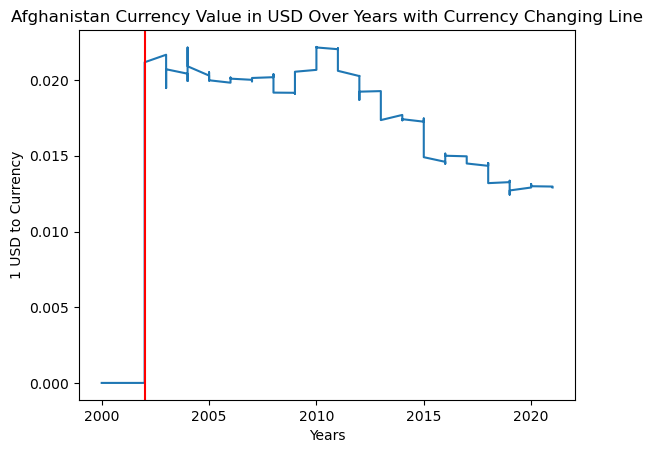

In [523]:
plt.title("Afghanistan Currency Value in USD Over Years with Currency Changing Line")
plt.xlabel("Years")
plt.ylabel("1 USD to Currency")
plt.plot(x,y)
plt.axvline(x=currency_change_year, color='red')
plt.show()

As it can be seen above, after the currency was changed, there is a drastically change in graph. Because of that, using this dataset won't give a good result.

# **6. Fertilizers Use**

In [524]:
df=pd.read_csv(folder_path+"/"+"Fertilizers use - FAOSTAT_data_en_2-27-2024.csv")
df.head()

Domain Code                  Domain  Area Code (M49)         Area  \
0         RFB  Fertilizers by Product                4  Afghanistan   
1         RFB  Fertilizers by Product                4  Afghanistan   
2         RFB  Fertilizers by Product                4  Afghanistan   
3         RFB  Fertilizers by Product                4  Afghanistan   
4         RFB  Fertilizers by Product                4  Afghanistan   

   Element Code           Element  Item Code             Item  Year Code  \
0          5157  Agricultural Use       4021  NPK fertilizers       2002   
1          5157  Agricultural Use       4021  NPK fertilizers       2003   
2          5157  Agricultural Use       4021  NPK fertilizers       2004   
3          5157  Agricultural Use       4001             Urea       2004   
4          5157  Agricultural Use       4001             Urea       2005   

   Year Unit    Value Flag Flag Description  
0  2002    t  17900.0    I    Imputed value  
1  2003    t  33200.0    I    Imputed value  
2  2004    t  47700.0    I    Imputed value  
3  2004    t  42300.0    I    Imputed value  
4  2005    t  20577.0    I    Imputed value

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17807 entries, 0 to 17806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       17807 non-null  object 
 1   Domain            17807 non-null  object 
 2   Area Code (M49)   17807 non-null  int64  
 3   Area              17807 non-null  object 
 4   Element Code      17807 non-null  int64  
 5   Element           17807 non-null  object 
 6   Item Code         17807 non-null  int64  
 7   Item              17807 non-null  object 
 8   Year Code         17807 non-null  int64  
 9   Year              17807 non-null  int64  
 10  Unit              17807 non-null  object 
 11  Value             17807 non-null  float64
 12  Flag              17807 non-null  object 
 13  Flag Description  17807 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.9+ MB


In [526]:
df.Unit.unique()

array(['t'], dtype=object)

In [527]:
df["Unit"]="kg"

In [528]:
#convert tonnes into kg
df['Value']=df.Value.apply(lambda x: x*1000)
#change column name as value_kg
#df=df.rename(columns={'Value': 'value_kg'})

In [529]:
df=df[['Domain','Area','Item','Year',"Unit",'Value']]

In [ ]:
df.Item.unique()

In [530]:
df['Domain']='fertilizers'
df = df.reset_index(drop=True)
df

Domain         Area                                       Item  \
0      fertilizers  Afghanistan                            NPK fertilizers   
1      fertilizers  Afghanistan                            NPK fertilizers   
2      fertilizers  Afghanistan                            NPK fertilizers   
3      fertilizers  Afghanistan                                       Urea   
4      fertilizers  Afghanistan                                       Urea   
...            ...          ...                                        ...   
17802  fertilizers     Zimbabwe  Urea and ammonium nitrate solutions (UAN)   
17803  fertilizers     Zimbabwe  Urea and ammonium nitrate solutions (UAN)   
17804  fertilizers     Zimbabwe  Urea and ammonium nitrate solutions (UAN)   
17805  fertilizers     Zimbabwe  Urea and ammonium nitrate solutions (UAN)   
17806  fertilizers     Zimbabwe  Urea and ammonium nitrate solutions (UAN)   

       Year Unit       Value  
0      2002   kg  17900000.0  
1      2003   kg  33200000.0  
2      2004   kg  47700000.0  
3      2004   kg  42300000.0  
4      2005   kg  20577000.0  
...     ...  ...         ...  
17802  2004   kg      5000.0  
17803  2008   kg      2130.0  
17804  2009   kg      9000.0  
17805  2010   kg   4971000.0  
17806  2011   kg      7000.0  

[17807 rows x 6 columns]

In [531]:
min_max_years=check_min_max_uniques(df)

min: [2002 2006 2005 2004 2003 2013 2010 2011 2009 2008 2015 2017 2021 2007
 2012 2016] max: [2018 2020 2016 2011 2017 2021 2019 2015 2014 2013 2007 2005 2010]


In [532]:
different_min=find_different_min(min_max_years)

{'Afghanistan': 2002, 'Albania': 2002, 'Algeria': 2006, 'Angola': 2005, 'Antigua and Barbuda': 2005, 'Argentina': 2004, 'Armenia': 2002, 'Australia': 2002, 'Austria': 2004, 'Azerbaijan': 2002, 'Bahrain': 2002, 'Bangladesh': 2002, 'Barbados': 2002, 'Belarus': 2002, 'Belize': 2003, 'Benin': 2002, 'Bermuda': 2013, 'Bhutan': 2002, 'Bolivia (Plurinational State of)': 2002, 'Bosnia and Herzegovina': 2003, 'Botswana': 2010, 'Brazil': 2002, 'Brunei Darussalam': 2003, 'Bulgaria': 2003, 'Burkina Faso': 2002, 'Burundi': 2002, 'Cambodia': 2002, 'Cameroon': 2003, 'Canada': 2006, 'Central African Republic': 2011, 'Chile': 2004, 'China, Hong Kong SAR': 2009, 'China, Macao SAR': 2009, 'China, Taiwan Province of': 2006, 'Colombia': 2002, 'Congo': 2004, 'Cook Islands': 2006, 'Costa Rica': 2002, 'Croatia': 2003, 'Cuba': 2002, 'Cyprus': 2002, 'Czechia': 2008, "Côte d'Ivoire": 2002, "Democratic People's Republic of Korea": 2015, 'Democratic Republic of the Congo': 2004, 'Denmark': 2004, 'Dominica': 2002, '

In [533]:
different_max=find_different_max(min_max_years)

{'Afghanistan': 2018, 'Albania': 2020, 'Algeria': 2016, 'Angola': 2011, 'Antigua and Barbuda': 2011, 'Argentina': 2020, 'Armenia': 2020, 'Australia': 2017, 'Austria': 2021, 'Azerbaijan': 2011, 'Bahrain': 2021, 'Bangladesh': 2021, 'Barbados': 2011, 'Belarus': 2011, 'Belize': 2011, 'Benin': 2011, 'Bermuda': 2021, 'Bhutan': 2019, 'Bolivia (Plurinational State of)': 2015, 'Bosnia and Herzegovina': 2014, 'Botswana': 2014, 'Brazil': 2013, 'Brunei Darussalam': 2015, 'Bulgaria': 2011, 'Burkina Faso': 2011, 'Burundi': 2016, 'Cambodia': 2011, 'Cameroon': 2011, 'Canada': 2021, 'Central African Republic': 2011, 'Chile': 2016, 'China, Hong Kong SAR': 2011, 'China, Macao SAR': 2018, 'China, Taiwan Province of': 2021, 'Colombia': 2021, 'Congo': 2011, 'Cook Islands': 2011, 'Costa Rica': 2011, 'Croatia': 2021, 'Cuba': 2011, 'Cyprus': 2021, 'Czechia': 2021, "Côte d'Ivoire": 2020, "Democratic People's Republic of Korea": 2018, 'Democratic Republic of the Congo': 2011, 'Denmark': 2021, 'Dominica': 2011, '

In [534]:
df=df.groupby(["Domain","Area","Year","Unit"])["Value"].sum().reset_index()
df=df.rename(columns={"Value":"value_kg"})
df

Domain         Area  Year Unit     value_kg
0     fertilizers  Afghanistan  2002   kg   17900000.0
1     fertilizers  Afghanistan  2003   kg   33200000.0
2     fertilizers  Afghanistan  2004   kg   90000000.0
3     fertilizers  Afghanistan  2005   kg   20577000.0
4     fertilizers  Afghanistan  2006   kg   68253000.0
...           ...          ...   ...  ...          ...
1928  fertilizers     Zimbabwe  2009   kg  129036000.0
1929  fertilizers     Zimbabwe  2010   kg  164237000.0
1930  fertilizers     Zimbabwe  2011   kg  134098000.0
1931  fertilizers     Zimbabwe  2017   kg   10817000.0
1932  fertilizers     Zimbabwe  2018   kg   13372690.0

[1933 rows x 5 columns]

In [535]:
check_null(df)

There is no null value in dataframe


In [536]:
df.to_csv('new_datasets/Fertilizers_use.csv', index=False)

In [537]:
df_fertilizers=df

# **7. Food Balances Indicators**

In [538]:
df=pd.read_csv(folder_path+"/"+"Food balances indicators - FAOSTAT_data_en_2-22-2024.csv")
df.head()

Domain Code                 Domain  Area Code (M49)         Area  \
0         FBS  Food Balances (2010-)                4  Afghanistan   
1         FBS  Food Balances (2010-)                4  Afghanistan   
2         FBS  Food Balances (2010-)                4  Afghanistan   
3         FBS  Food Balances (2010-)                4  Afghanistan   
4         FBS  Food Balances (2010-)                4  Afghanistan   

   Element Code          Element Item Code (FBS)                      Item  \
0          5611  Import Quantity           S2905  Cereals - Excluding Beer   
1          5611  Import Quantity           S2905  Cereals - Excluding Beer   
2          5611  Import Quantity           S2905  Cereals - Excluding Beer   
3          5611  Import Quantity           S2905  Cereals - Excluding Beer   
4          5611  Import Quantity           S2905  Cereals - Excluding Beer   

   Year Code  Year    Unit   Value Flag Flag Description  
0       2010  2010  1000 t  2000.0    E  Estimated value  
1       2011  2011  1000 t  2448.0    E  Estimated value  
2       2012  2012  1000 t  2001.0    E  Estimated value  
3       2013  2013  1000 t  2155.0    E  Estimated value  
4       2014  2014  1000 t  1840.0    E  Estimated value

In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148041 entries, 0 to 148040
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       148041 non-null  object 
 1   Domain            148041 non-null  object 
 2   Area Code (M49)   148041 non-null  int64  
 3   Area              148041 non-null  object 
 4   Element Code      148041 non-null  int64  
 5   Element           148041 non-null  object 
 6   Item Code (FBS)   148041 non-null  object 
 7   Item              148041 non-null  object 
 8   Year Code         148041 non-null  int64  
 9   Year              148041 non-null  int64  
 10  Unit              148041 non-null  object 
 11  Value             148041 non-null  float64
 12  Flag              148041 non-null  object 
 13  Flag Description  148041 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 15.8+ MB


In [540]:
df.Unit.unique()

array(['1000 t'], dtype=object)

In [541]:
#convert 1000 tonnes into kg
df.Value=df.Value.apply(lambda x: x*1000000)

In [542]:
df["Unit"].unique()

array(['1000 t'], dtype=object)

In [543]:
df["Unit"]="kg"

In [544]:
#change column name as value_kg
#df=df.rename(columns={'Value': 'value_kg'}) 

In [545]:
df.Domain.unique()

array(['Food Balances (2010-)'], dtype=object)

In [546]:
min_max_years=check_min_max_uniques(df)

min: [2010 2019 2012] max: [2021 2010]


In [547]:
different_max=find_different_max(min_max_years)

{'Afghanistan': 2021, 'Albania': 2021, 'Algeria': 2021, 'Angola': 2021, 'Antigua and Barbuda': 2021, 'Argentina': 2021, 'Armenia': 2021, 'Australia': 2021, 'Austria': 2021, 'Azerbaijan': 2021, 'Bahamas': 2021, 'Bahrain': 2021, 'Bangladesh': 2021, 'Barbados': 2021, 'Belarus': 2021, 'Belgium': 2021, 'Belize': 2021, 'Benin': 2021, 'Bhutan': 2021, 'Bolivia (Plurinational State of)': 2021, 'Bosnia and Herzegovina': 2021, 'Botswana': 2021, 'Brazil': 2021, 'Bulgaria': 2021, 'Burkina Faso': 2021, 'Burundi': 2021, 'Cabo Verde': 2021, 'Cambodia': 2021, 'Cameroon': 2021, 'Canada': 2021, 'Central African Republic': 2021, 'Chad': 2021, 'Chile': 2021, 'China': 2021, 'China, Hong Kong SAR': 2021, 'China, Macao SAR': 2021, 'China, Taiwan Province of': 2021, 'China, mainland': 2021, 'Colombia': 2021, 'Comoros': 2021, 'Congo': 2021, 'Costa Rica': 2021, 'Croatia': 2021, 'Cuba': 2021, 'Cyprus': 2021, 'Czechia': 2021, "Côte d'Ivoire": 2021, "Democratic People's Republic of Korea": 2021, 'Democratic Republi

In [548]:
df.Element.unique()

array(['Import Quantity', 'Export Quantity', 'Losses',
       'Other uses (non-food)', 'Food'], dtype=object)

In [549]:
df.Item.unique()

array(['Cereals - Excluding Beer', 'Starchy Roots', 'Sugar Crops',
       'Sugar & Sweeteners', 'Pulses', 'Treenuts', 'Oilcrops',
       'Vegetable Oils', 'Vegetables', 'Fruits - Excluding Wine',
       'Stimulants', 'Spices', 'Alcoholic Beverages', 'Meat', 'Eggs',
       'Milk - Excluding Butter', 'Fish, Seafood'], dtype=object)

In [550]:
#finding the number of countries which contain relevant element
element_country_counts = df.groupby('Element')['Area'].nunique().reset_index()
element_country_counts.columns = ['Element', 'Number of Countries']
element_country_counts

Element  Number of Countries
0        Export Quantity                  187
1                   Food                  187
2        Import Quantity                  187
3                 Losses                  186
4  Other uses (non-food)                  187

In [551]:
print("Total country number in the dataframe: {}".format(len(df.groupby("Area").first())))

Total country number in the dataframe: 187


There is only 1 country which doesn't have losses. It can be excluded.

In [552]:
all_countries = df["Area"].unique()
countries_with_losses = df[df["Element"] == "Losses"]["Area"].unique()
countries_without_losses = set(all_countries) - set(countries_with_losses)
countries_without_losses

{'Netherlands Antilles (former)'}

In [553]:
#excluding this country
df=df[df["Area"]!='Netherlands Antilles (former)']

In [554]:
#finding the number of countries which contain relevant element
element_country_counts = df.groupby('Element')['Area'].nunique().reset_index()
element_country_counts.columns = ['Element', 'Number of Countries']
element_country_counts

Element  Number of Countries
0        Export Quantity                  186
1                   Food                  186
2        Import Quantity                  186
3                 Losses                  186
4  Other uses (non-food)                  186

In [555]:
#finding the number of countries which contain relevant item
item_country_counts = df.groupby('Item')['Area'].nunique().reset_index()
item_country_counts.columns = ['Item', 'Number of Countries']

In [556]:
item_country_counts

Item  Number of Countries
0        Alcoholic Beverages                  186
1   Cereals - Excluding Beer                  186
2                       Eggs                  186
3              Fish, Seafood                  186
4    Fruits - Excluding Wine                  186
5                       Meat                  186
6    Milk - Excluding Butter                  186
7                   Oilcrops                  186
8                     Pulses                  186
9                     Spices                  186
10             Starchy Roots                  186
11                Stimulants                  186
12        Sugar & Sweeteners                  186
13               Sugar Crops                  182
14                  Treenuts                  186
15            Vegetable Oils                  186
16                Vegetables                  186

It would be better to get only 1 total value for all items in each country.

In [557]:
df=df[['Domain','Area','Element','Item','Year','Unit','Value']]
df = df.reset_index(drop=True)
df

Domain         Area          Element  \
0       Food Balances (2010-)  Afghanistan  Import Quantity   
1       Food Balances (2010-)  Afghanistan  Import Quantity   
2       Food Balances (2010-)  Afghanistan  Import Quantity   
3       Food Balances (2010-)  Afghanistan  Import Quantity   
4       Food Balances (2010-)  Afghanistan  Import Quantity   
...                       ...          ...              ...   
148032  Food Balances (2010-)     Zimbabwe             Food   
148033  Food Balances (2010-)     Zimbabwe             Food   
148034  Food Balances (2010-)     Zimbabwe             Food   
148035  Food Balances (2010-)     Zimbabwe             Food   
148036  Food Balances (2010-)     Zimbabwe             Food   

                            Item  Year Unit         Value  
0       Cereals - Excluding Beer  2010   kg  2.000000e+09  
1       Cereals - Excluding Beer  2011   kg  2.448000e+09  
2       Cereals - Excluding Beer  2012   kg  2.001000e+09  
3       Cereals - Excluding Beer  2013   kg  2.155000e+09  
4       Cereals - Excluding Beer  2014   kg  1.840000e+09  
...                          ...   ...  ...           ...  
148032             Fish, Seafood  2017   kg  5.796000e+07  
148033             Fish, Seafood  2018   kg  4.691000e+07  
148034             Fish, Seafood  2019   kg  3.108000e+07  
148035             Fish, Seafood  2020   kg  3.108000e+07  
148036             Fish, Seafood  2021   kg  3.108000e+07  

[148037 rows x 7 columns]

In [558]:
item_list=list(df.Item.unique())
item_list

['Cereals - Excluding Beer',
 'Starchy Roots',
 'Sugar Crops',
 'Sugar & Sweeteners',
 'Pulses',
 'Treenuts',
 'Oilcrops',
 'Vegetable Oils',
 'Vegetables',
 'Fruits - Excluding Wine',
 'Stimulants',
 'Spices',
 'Alcoholic Beverages',
 'Meat',
 'Eggs',
 'Milk - Excluding Butter',
 'Fish, Seafood']

In [559]:
crop_product_names=item_list[:-4]
crop_product_names

['Cereals - Excluding Beer',
 'Starchy Roots',
 'Sugar Crops',
 'Sugar & Sweeteners',
 'Pulses',
 'Treenuts',
 'Oilcrops',
 'Vegetable Oils',
 'Vegetables',
 'Fruits - Excluding Wine',
 'Stimulants',
 'Spices',
 'Alcoholic Beverages']

In [560]:
animal_product_names=item_list[-4:]
animal_product_names

['Meat', 'Eggs', 'Milk - Excluding Butter', 'Fish, Seafood']

In [561]:
def product_type(item):
    if item in crop_product_names: return "crop_product"
    elif item in animal_product_names: return "animal_product"
    else: return "other"

In [562]:
df2=df.copy(deep=True)

In [563]:
df2["Item"]=df["Item"].apply(lambda x: product_type(x))

In [564]:
df2

Domain         Area          Element            Item  \
0       Food Balances (2010-)  Afghanistan  Import Quantity    crop_product   
1       Food Balances (2010-)  Afghanistan  Import Quantity    crop_product   
2       Food Balances (2010-)  Afghanistan  Import Quantity    crop_product   
3       Food Balances (2010-)  Afghanistan  Import Quantity    crop_product   
4       Food Balances (2010-)  Afghanistan  Import Quantity    crop_product   
...                       ...          ...              ...             ...   
148032  Food Balances (2010-)     Zimbabwe             Food  animal_product   
148033  Food Balances (2010-)     Zimbabwe             Food  animal_product   
148034  Food Balances (2010-)     Zimbabwe             Food  animal_product   
148035  Food Balances (2010-)     Zimbabwe             Food  animal_product   
148036  Food Balances (2010-)     Zimbabwe             Food  animal_product   

        Year Unit         Value  
0       2010   kg  2.000000e+09  
1       2011   kg  2.448000e+09  
2       2012   kg  2.001000e+09  
3       2013   kg  2.155000e+09  
4       2014   kg  1.840000e+09  
...      ...  ...           ...  
148032  2017   kg  5.796000e+07  
148033  2018   kg  4.691000e+07  
148034  2019   kg  3.108000e+07  
148035  2020   kg  3.108000e+07  
148036  2021   kg  3.108000e+07  

[148037 rows x 7 columns]

In [565]:
df.Element.unique()

array(['Import Quantity', 'Export Quantity', 'Losses',
       'Other uses (non-food)', 'Food'], dtype=object)

In [566]:
def element_type(element):
    if element!="Import Quantity" and element!="Export Quantity":
        return "Others"
    else: return element

In [567]:
df2["Element"]=df2["Element"].apply(lambda x: element_type(x))
df2

Domain         Area          Element            Item  \
0       Food Balances (2010-)  Afghanistan  Import Quantity    crop_product   
1       Food Balances (2010-)  Afghanistan  Import Quantity    crop_product   
2       Food Balances (2010-)  Afghanistan  Import Quantity    crop_product   
3       Food Balances (2010-)  Afghanistan  Import Quantity    crop_product   
4       Food Balances (2010-)  Afghanistan  Import Quantity    crop_product   
...                       ...          ...              ...             ...   
148032  Food Balances (2010-)     Zimbabwe           Others  animal_product   
148033  Food Balances (2010-)     Zimbabwe           Others  animal_product   
148034  Food Balances (2010-)     Zimbabwe           Others  animal_product   
148035  Food Balances (2010-)     Zimbabwe           Others  animal_product   
148036  Food Balances (2010-)     Zimbabwe           Others  animal_product   

        Year Unit         Value  
0       2010   kg  2.000000e+09  
1       2011   kg  2.448000e+09  
2       2012   kg  2.001000e+09  
3       2013   kg  2.155000e+09  
4       2014   kg  1.840000e+09  
...      ...  ...           ...  
148032  2017   kg  5.796000e+07  
148033  2018   kg  4.691000e+07  
148034  2019   kg  3.108000e+07  
148035  2020   kg  3.108000e+07  
148036  2021   kg  3.108000e+07  

[148037 rows x 7 columns]

In [568]:
df3=df2.copy(deep=True)

In [569]:
a=df2[df2["Element"]=="Import Quantity"]
a["Item"]=a.Item.apply(lambda x: x+"_import")
pd.DataFrame(a)

Domain         Area          Element  \
0       Food Balances (2010-)  Afghanistan  Import Quantity   
1       Food Balances (2010-)  Afghanistan  Import Quantity   
2       Food Balances (2010-)  Afghanistan  Import Quantity   
3       Food Balances (2010-)  Afghanistan  Import Quantity   
4       Food Balances (2010-)  Afghanistan  Import Quantity   
...                       ...          ...              ...   
147996  Food Balances (2010-)     Zimbabwe  Import Quantity   
147997  Food Balances (2010-)     Zimbabwe  Import Quantity   
147998  Food Balances (2010-)     Zimbabwe  Import Quantity   
147999  Food Balances (2010-)     Zimbabwe  Import Quantity   
148000  Food Balances (2010-)     Zimbabwe  Import Quantity   

                         Item  Year Unit         Value  
0         crop_product_import  2010   kg  2.000000e+09  
1         crop_product_import  2011   kg  2.448000e+09  
2         crop_product_import  2012   kg  2.001000e+09  
3         crop_product_import  2013   kg  2.155000e+09  
4         crop_product_import  2014   kg  1.840000e+09  
...                       ...   ...  ...           ...  
147996  animal_product_import  2017   kg  2.787000e+07  
147997  animal_product_import  2018   kg  1.996000e+07  
147998  animal_product_import  2019   kg  7.750000e+06  
147999  animal_product_import  2020   kg  7.750000e+06  
148000  animal_product_import  2021   kg  7.750000e+06  

[36180 rows x 7 columns]

In [570]:
a=df2[df2["Element"]=="Import Quantity"]
b=df2[df2["Element"]=="Export Quantity"]
c=df2[df2["Element"]=="Others"]

In [571]:
a["Item"]=a.Item.apply(lambda x: x+"_import")
b["Item"]=b.Item.apply(lambda x: x+"_export")
c["Item"]=c.Item.apply(lambda x: x+"_other")
a

Domain         Area          Element  \
0       Food Balances (2010-)  Afghanistan  Import Quantity   
1       Food Balances (2010-)  Afghanistan  Import Quantity   
2       Food Balances (2010-)  Afghanistan  Import Quantity   
3       Food Balances (2010-)  Afghanistan  Import Quantity   
4       Food Balances (2010-)  Afghanistan  Import Quantity   
...                       ...          ...              ...   
147996  Food Balances (2010-)     Zimbabwe  Import Quantity   
147997  Food Balances (2010-)     Zimbabwe  Import Quantity   
147998  Food Balances (2010-)     Zimbabwe  Import Quantity   
147999  Food Balances (2010-)     Zimbabwe  Import Quantity   
148000  Food Balances (2010-)     Zimbabwe  Import Quantity   

                         Item  Year Unit         Value  
0         crop_product_import  2010   kg  2.000000e+09  
1         crop_product_import  2011   kg  2.448000e+09  
2         crop_product_import  2012   kg  2.001000e+09  
3         crop_product_import  2013   kg  2.155000e+09  
4         crop_product_import  2014   kg  1.840000e+09  
...                       ...   ...  ...           ...  
147996  animal_product_import  2017   kg  2.787000e+07  
147997  animal_product_import  2018   kg  1.996000e+07  
147998  animal_product_import  2019   kg  7.750000e+06  
147999  animal_product_import  2020   kg  7.750000e+06  
148000  animal_product_import  2021   kg  7.750000e+06  

[36180 rows x 7 columns]

In [572]:
merged_df=pd.concat([a,b,c],axis=0)
merged_df=merged_df.drop(columns="Element")

In [573]:
merged_df

Domain         Area                  Item  Year Unit  \
0       Food Balances (2010-)  Afghanistan   crop_product_import  2010   kg   
1       Food Balances (2010-)  Afghanistan   crop_product_import  2011   kg   
2       Food Balances (2010-)  Afghanistan   crop_product_import  2012   kg   
3       Food Balances (2010-)  Afghanistan   crop_product_import  2013   kg   
4       Food Balances (2010-)  Afghanistan   crop_product_import  2014   kg   
...                       ...          ...                   ...   ...  ...   
148032  Food Balances (2010-)     Zimbabwe  animal_product_other  2017   kg   
148033  Food Balances (2010-)     Zimbabwe  animal_product_other  2018   kg   
148034  Food Balances (2010-)     Zimbabwe  animal_product_other  2019   kg   
148035  Food Balances (2010-)     Zimbabwe  animal_product_other  2020   kg   
148036  Food Balances (2010-)     Zimbabwe  animal_product_other  2021   kg   

               Value  
0       2.000000e+09  
1       2.448000e+09  
2       2.001000e+09  
3       2.155000e+09  
4       1.840000e+09  
...              ...  
148032  5.796000e+07  
148033  4.691000e+07  
148034  3.108000e+07  
148035  3.108000e+07  
148036  3.108000e+07  

[148037 rows x 6 columns]

In [574]:
merged_df=merged_df.pivot_table(index=["Domain",'Area', 'Year',"Unit"], columns=["Item"], values='Value', aggfunc='sum').reset_index()
merged_df

Item                 Domain         Area  Year Unit  animal_product_export  \
0     Food Balances (2010-)  Afghanistan  2010   kg                    0.0   
1     Food Balances (2010-)  Afghanistan  2011   kg                    0.0   
2     Food Balances (2010-)  Afghanistan  2012   kg                    0.0   
3     Food Balances (2010-)  Afghanistan  2013   kg                    0.0   
4     Food Balances (2010-)  Afghanistan  2014   kg                    0.0   
...                     ...          ...   ...  ...                    ...   
2171  Food Balances (2010-)     Zimbabwe  2017   kg              4850000.0   
2172  Food Balances (2010-)     Zimbabwe  2018   kg              4940000.0   
2173  Food Balances (2010-)     Zimbabwe  2019   kg             12530000.0   
2174  Food Balances (2010-)     Zimbabwe  2020   kg              9530000.0   
2175  Food Balances (2010-)     Zimbabwe  2021   kg              8530000.0   

Item  animal_product_import  animal_product_other  crop_product_export  \
0              1.860100e+08          1.652260e+09          360000000.0   
1              1.760000e+08          1.682000e+09          277000000.0   
2              2.750000e+08          1.843780e+09          198000000.0   
3              3.280000e+08          1.830560e+09          281000000.0   
4              1.425000e+09          3.360360e+09          412000000.0   
...                     ...                   ...                  ...   
2171           6.787000e+07          1.193960e+09          208000000.0   
2172           7.096000e+07          1.182910e+09          210000000.0   
2173           5.775000e+07          1.214080e+09          281000000.0   
2174           5.975000e+07          1.242080e+09          304000000.0   
2175           1.367500e+08          1.387080e+09          206000000.0   

Item  crop_product_import  crop_product_other  
0            2.931000e+09        9.880000e+09  
1            3.571000e+09        9.820000e+09  
2            3.464000e+09        1.076700e+10  
3            3.617000e+09        1.123700e+10  
4            3.756000e+09        1.186800e+10  
...                   ...                 ...  
2171         1.242000e+09        4.057000e+09  
2172         1.057000e+09        4.155000e+09  
2173         8.460000e+08        3.985000e+09  
2174         2.076000e+09        4.271000e+09  
2175         1.702000e+09        4.347000e+09  

[2176 rows x 10 columns]

In [575]:
check_null(merged_df)

There is no null value in dataframe


In [576]:
#removing unit from index
if 'Item' in merged_df.columns.names:
    merged_df.columns.names = [None]

In [577]:
for column_name in merged_df.columns[4:]:
    merged_df=merged_df.rename(columns={column_name:column_name+"_kg"})

In [578]:
merged_df

Domain         Area  Year Unit  animal_product_export_kg  \
0     Food Balances (2010-)  Afghanistan  2010   kg                       0.0   
1     Food Balances (2010-)  Afghanistan  2011   kg                       0.0   
2     Food Balances (2010-)  Afghanistan  2012   kg                       0.0   
3     Food Balances (2010-)  Afghanistan  2013   kg                       0.0   
4     Food Balances (2010-)  Afghanistan  2014   kg                       0.0   
...                     ...          ...   ...  ...                       ...   
2171  Food Balances (2010-)     Zimbabwe  2017   kg                 4850000.0   
2172  Food Balances (2010-)     Zimbabwe  2018   kg                 4940000.0   
2173  Food Balances (2010-)     Zimbabwe  2019   kg                12530000.0   
2174  Food Balances (2010-)     Zimbabwe  2020   kg                 9530000.0   
2175  Food Balances (2010-)     Zimbabwe  2021   kg                 8530000.0   

      animal_product_import_kg  animal_product_other_kg  \
0                 1.860100e+08             1.652260e+09   
1                 1.760000e+08             1.682000e+09   
2                 2.750000e+08             1.843780e+09   
3                 3.280000e+08             1.830560e+09   
4                 1.425000e+09             3.360360e+09   
...                        ...                      ...   
2171              6.787000e+07             1.193960e+09   
2172              7.096000e+07             1.182910e+09   
2173              5.775000e+07             1.214080e+09   
2174              5.975000e+07             1.242080e+09   
2175              1.367500e+08             1.387080e+09   

      crop_product_export_kg  crop_product_import_kg  crop_product_other_kg  
0                360000000.0            2.931000e+09           9.880000e+09  
1                277000000.0            3.571000e+09           9.820000e+09  
2                198000000.0            3.464000e+09           1.076700e+10  
3                281000000.0            3.617000e+09           1.123700e+10  
4                412000000.0            3.756000e+09           1.186800e+10  
...                      ...                     ...                    ...  
2171             208000000.0            1.242000e+09           4.057000e+09  
2172             210000000.0            1.057000e+09           4.155000e+09  
2173             281000000.0            8.460000e+08           3.985000e+09  
2174             304000000.0            2.076000e+09           4.271000e+09  
2175             206000000.0            1.702000e+09           4.347000e+09  

[2176 rows x 10 columns]

In [579]:
df=merged_df

In [580]:
df.to_csv('new_datasets/Food_balance.csv', index=False)

In [581]:
df_food_balances=df

# **8. Food Security Indicators**

In [582]:
df=pd.read_csv(folder_path+"/"+"Food security indicators  - FAOSTAT_data_en_2-22-2024.csv")
df.head()

Domain Code                             Domain  Area Code (M49)  \
0          FS  Suite of Food Security Indicators                4   
1          FS  Suite of Food Security Indicators                4   
2          FS  Suite of Food Security Indicators                4   
3          FS  Suite of Food Security Indicators                4   
4          FS  Suite of Food Security Indicators                4   

          Area  Element Code Element  Item Code  \
0  Afghanistan          6121   Value      21010   
1  Afghanistan          6121   Value      21010   
2  Afghanistan          6121   Value      21010   
3  Afghanistan          6121   Value      21010   
4  Afghanistan          6121   Value      21010   

                                                Item  Year Code       Year  \
0  Average dietary energy supply adequacy (percen...   20002002  2000-2002   
1  Average dietary energy supply adequacy (percen...   20012003  2001-2003   
2  Average dietary energy supply adequacy (percen...   20022004  2002-2004   
3  Average dietary energy supply adequacy (percen...   20032005  2003-2005   
4  Average dietary energy supply adequacy (percen...   20042006  2004-2006   

  Unit  Value Flag Flag Description Note  
0    %   88.0    E  Estimated value  NaN  
1    %   89.0    E  Estimated value  NaN  
2    %   92.0    E  Estimated value  NaN  
3    %   93.0    E  Estimated value  NaN  
4    %   94.0    E  Estimated value  NaN

As it can be seen above, some item's years were indicated with 3-year period. They must be converted into years by taking the average values.

In [583]:
main_dict={}
for item in list(df.Item.unique()):
    
    if "3-year average" in item:
        years=list(df[df.Item==item].Year)
        values=list(df[df.Item==item].Value)
        countries=list(df[df.Item==item].Area)

        adict={}
        
        for year,value,country in zip(years,values,countries):
            start_year=year[:4]
            end_year=year[-4:]
            middle_year=str(int(start_year)+1)
            
            adict[start_year]=adict.get(start_year,[])+[value,country]
            adict[middle_year]=adict.get(middle_year,[])+[value,country]
            adict[end_year]=adict.get(end_year,[])+[value,country]
            

        
        main_dict[item]=adict
main_dict

{'Average dietary energy supply adequacy (percent) (3-year average)': {'2000': [88.0,
   'Afghanistan',
   122.0,
   'Albania',
   127.0,
   'Algeria',
   74.0,
   'Angola',
   132.0,
   'Argentina',
   95.0,
   'Armenia',
   124.0,
   'Australia',
   146.0,
   'Austria',
   100.0,
   'Azerbaijan',
   108.0,
   'Bangladesh',
   114.0,
   'Barbados',
   122.0,
   'Belarus',
   147.0,
   'Belgium',
   121.0,
   'Belize',
   109.0,
   'Benin',
   97.0,
   'Bolivia (Plurinational State of)',
   118.0,
   'Bosnia and Herzegovina',
   99.0,
   'Botswana',
   122.0,
   'Brazil',
   111.0,
   'Bulgaria',
   109.0,
   'Burkina Faso',
   108.0,
   'Cabo Verde',
   101.0,
   'Cambodia',
   101.0,
   'Cameroon',
   140.0,
   'Canada',
   92.0,
   'Central African Republic',
   92.0,
   'Chad',
   121.0,
   'Chile',
   115.0,
   'China',
   129.0,
   'China, Hong Kong SAR',
   103.0,
   'China, Macao SAR',
   115.0,
   'China, mainland',
   125.0,
   'China, Taiwan Province of',
   123.0,
   'Colom

In [584]:
#create a dataframe
a = pd.DataFrame()

rows = []
#iterate over items collected in the dictionary
for item in main_dict.keys():
    for year in main_dict[item].keys():
        for i,j in enumerate(main_dict[item][year]):
            #even values are value
            if i % 2 == 0:
                value = j
            #odd values are area
            elif i%2 !=0:
                area = j
                #create row data by adding into a list
                rows.append({"Area": area,
                             "Year": year, 
                             "Item": item, 
                             "Value": value})

#convert list into dataframe
a = pd.DataFrame(rows)

a

Area  Year  \
0                             Afghanistan  2000   
1                                 Albania  2000   
2                                 Algeria  2000   
3                                  Angola  2000   
4                               Argentina  2000   
...                                   ...   ...   
52813  Venezuela (Bolivarian Republic of)  2021   
52814                            Viet Nam  2021   
52815                               Yemen  2021   
52816                              Zambia  2021   
52817                            Zimbabwe  2021   

                                                    Item  Value  
0      Average dietary energy supply adequacy (percen...   88.0  
1      Average dietary energy supply adequacy (percen...  122.0  
2      Average dietary energy supply adequacy (percen...  127.0  
3      Average dietary energy supply adequacy (percen...   74.0  
4      Average dietary energy supply adequacy (percen...  132.0  
...                                                  ...    ...  
52813  Value of food imports in total merchandise exp...   27.0  
52814  Value of food imports in total merchandise exp...    6.0  
52815  Value of food imports in total merchandise exp...  259.0  
52816  Value of food imports in total merchandise exp...    5.0  
52817  Value of food imports in total merchandise exp...   15.0  

[52818 rows x 4 columns]

In [585]:
#group them by Area, Year, Item taking the average value
df_3years=a.groupby(["Area","Year","Item"])["Value"].mean().reset_index()
df_3years

Area  Year                                               Item  \
0      Afghanistan  2000  Average dietary energy supply adequacy (percen...   
1      Afghanistan  2000  Average protein supply (g/cap/day) (3-year ave...   
2      Afghanistan  2000  Cereal import dependency ratio (percent) (3-ye...   
3      Afghanistan  2000  Percent of arable land equipped for irrigation...   
4      Afghanistan  2000  Value of food imports in total merchandise exp...   
...            ...   ...                                                ...   
19463     Zimbabwe  2020  Value of food imports in total merchandise exp...   
19464     Zimbabwe  2021  Average dietary energy supply adequacy (percen...   
19465     Zimbabwe  2021  Percent of arable land equipped for irrigation...   
19466     Zimbabwe  2021  Value of food imports in total merchandise exp...   
19467     Zimbabwe  2022  Average dietary energy supply adequacy (percen...   

       Value  
0       88.0  
1       51.4  
2       34.1  
3        4.9  
4      240.0  
...      ...  
19463   14.5  
19464   91.0  
19465    0.5  
19466   15.0  
19467   91.0  

[19468 rows x 4 columns]

In [586]:
#creating a dictionary for item and unique units to add them into the created dataframe above
item_unit_dict={}
for item in df.Item.unique():
    unique_items=df[df["Item"]==item].Unit.unique()[0]
    item_unit_dict[item]=unique_items
item_unit_dict

{'Average dietary energy supply adequacy (percent) (3-year average)': '%',
 'Average protein supply (g/cap/day) (3-year average)': 'g/pc/d',
 'Cereal import dependency ratio (percent) (3-year average)': '%',
 'Percent of arable land equipped for irrigation (percent) (3-year average)': '%',
 'Value of food imports in total merchandise exports (percent) (3-year average)': '%',
 'Political stability and absence of violence/terrorism (index)': 'Index',
 'Per capita food production variability (constant 2014-2016 thousand int$ per capita)': '1000 I$',
 'Per capita food supply variability (kcal/cap/day)': 'kcal/pc/d',
 'Prevalence of anemia among women of reproductive age (15-49 years)': '%',
 'Prevalence of low birthweight (percent)': '%'}

In [587]:
#matching each item with it's unit
df_3years["Unit"]=df_3years["Item"].apply(lambda x: item_unit_dict[x])
df_3years

Area  Year                                               Item  \
0      Afghanistan  2000  Average dietary energy supply adequacy (percen...   
1      Afghanistan  2000  Average protein supply (g/cap/day) (3-year ave...   
2      Afghanistan  2000  Cereal import dependency ratio (percent) (3-ye...   
3      Afghanistan  2000  Percent of arable land equipped for irrigation...   
4      Afghanistan  2000  Value of food imports in total merchandise exp...   
...            ...   ...                                                ...   
19463     Zimbabwe  2020  Value of food imports in total merchandise exp...   
19464     Zimbabwe  2021  Average dietary energy supply adequacy (percen...   
19465     Zimbabwe  2021  Percent of arable land equipped for irrigation...   
19466     Zimbabwe  2021  Value of food imports in total merchandise exp...   
19467     Zimbabwe  2022  Average dietary energy supply adequacy (percen...   

       Value    Unit  
0       88.0       %  
1       51.4  g/pc/d  
2       34.1       %  
3        4.9       %  
4      240.0       %  
...      ...     ...  
19463   14.5       %  
19464   91.0       %  
19465    0.5       %  
19466   15.0       %  
19467   91.0       %  

[19468 rows x 5 columns]

In [588]:
#copying dataframe to keep the original one in safe
df2=df.copy(deep=True)

In [589]:
#removing the records related to 3-year average from the main dataframe
for i in main_dict.keys():
    df2=df2[df2["Item"]!=i]

In [590]:
df2.Element.unique()

array(['Value'], dtype=object)

In [591]:
#taking only useful columns
df2=df2[["Domain","Area","Item","Year","Unit","Value"]]
df2

Domain         Area  \
99     Suite of Food Security Indicators  Afghanistan   
100    Suite of Food Security Indicators  Afghanistan   
101    Suite of Food Security Indicators  Afghanistan   
102    Suite of Food Security Indicators  Afghanistan   
103    Suite of Food Security Indicators  Afghanistan   
...                                  ...          ...   
36507  Suite of Food Security Indicators     Zimbabwe   
36508  Suite of Food Security Indicators     Zimbabwe   
36509  Suite of Food Security Indicators     Zimbabwe   
36510  Suite of Food Security Indicators     Zimbabwe   
36511  Suite of Food Security Indicators     Zimbabwe   

                                                    Item  Year   Unit  Value  
99     Political stability and absence of violence/te...  2000  Index  -2.44  
100    Political stability and absence of violence/te...  2002  Index  -2.04  
101    Political stability and absence of violence/te...  2003  Index  -2.20  
102    Political stability and absence of violence/te...  2004  Index  -2.30  
103    Political stability and absence of violence/te...  2005  Index  -2.07  
...                                                  ...   ...    ...    ...  
36507            Prevalence of low birthweight (percent)  2016      %  12.10  
36508            Prevalence of low birthweight (percent)  2017      %  12.00  
36509            Prevalence of low birthweight (percent)  2018      %  12.00  
36510            Prevalence of low birthweight (percent)  2019      %  11.90  
36511            Prevalence of low birthweight (percent)  2020      %  11.80  

[18906 rows x 6 columns]

In [592]:
df3=pd.concat([df_3years,df2],axis=0)
df3["Domain"]="food security"
df4=df3.groupby(["Area","Year","Item","Unit","Domain"])["Value"].sum().reset_index()
df4

Area  Year                                               Item  \
0      Afghanistan  2000  Average dietary energy supply adequacy (percen...   
1      Afghanistan  2000  Average protein supply (g/cap/day) (3-year ave...   
2      Afghanistan  2000  Cereal import dependency ratio (percent) (3-ye...   
3      Afghanistan  2000  Per capita food supply variability (kcal/cap/day)   
4      Afghanistan  2000  Percent of arable land equipped for irrigation...   
...            ...   ...                                                ...   
38369     Zimbabwe  2021  Per capita food supply variability (kcal/cap/day)   
38370     Zimbabwe  2021  Percent of arable land equipped for irrigation...   
38371     Zimbabwe  2021  Political stability and absence of violence/te...   
38372     Zimbabwe  2021  Value of food imports in total merchandise exp...   
38373     Zimbabwe  2022  Average dietary energy supply adequacy (percen...   

            Unit         Domain  Value  
0              %  food security  88.00  
1         g/pc/d  food security  51.40  
2              %  food security  34.10  
3      kcal/pc/d  food security  58.00  
4              %  food security   4.90  
...          ...            ...    ...  
38369  kcal/pc/d  food security  21.00  
38370          %  food security   0.50  
38371      Index  food security  -1.03  
38372          %  food security  15.00  
38373          %  food security  91.00  

[38374 rows x 6 columns]

In [593]:
check_null(df4)

There is no null value in dataframe


In [594]:
df4.Unit.unique()

array(['%', 'g/pc/d', 'kcal/pc/d', 'Index', '1000 I$'], dtype=object)

In [595]:
def unit_value_converter(unit):
    
    if unit=="g/pc/d":
        return (1/365000)
    
    elif unit=='kcal/pc/d':
        return (1000/365)
    
    elif unit=='1000 I$':
        return 1000
    
    else: return 1

In [596]:
def unit_symbol_converter(unit):
    
    #"g/pc/day" => "kg/p/year"
    if unit=="g/pc/d": return "kg/pc/year"
    
    #'kcal/pc/d' => "cal/pc/year"
    elif unit=='kcal/pc/d': return "cal/pc/year"
    
    #'1000 I$' => "usd"
    elif unit=='1000 I$': return "usd"
    
    else: return unit

In [597]:
df4["Unit_multiple"]=df4["Unit"].apply(lambda x: unit_value_converter(x))
df4

Area  Year                                               Item  \
0      Afghanistan  2000  Average dietary energy supply adequacy (percen...   
1      Afghanistan  2000  Average protein supply (g/cap/day) (3-year ave...   
2      Afghanistan  2000  Cereal import dependency ratio (percent) (3-ye...   
3      Afghanistan  2000  Per capita food supply variability (kcal/cap/day)   
4      Afghanistan  2000  Percent of arable land equipped for irrigation...   
...            ...   ...                                                ...   
38369     Zimbabwe  2021  Per capita food supply variability (kcal/cap/day)   
38370     Zimbabwe  2021  Percent of arable land equipped for irrigation...   
38371     Zimbabwe  2021  Political stability and absence of violence/te...   
38372     Zimbabwe  2021  Value of food imports in total merchandise exp...   
38373     Zimbabwe  2022  Average dietary energy supply adequacy (percen...   

            Unit         Domain  Value  Unit_multiple  
0              %  food security  88.00       1.000000  
1         g/pc/d  food security  51.40       0.000003  
2              %  food security  34.10       1.000000  
3      kcal/pc/d  food security  58.00       2.739726  
4              %  food security   4.90       1.000000  
...          ...            ...    ...            ...  
38369  kcal/pc/d  food security  21.00       2.739726  
38370          %  food security   0.50       1.000000  
38371      Index  food security  -1.03       1.000000  
38372          %  food security  15.00       1.000000  
38373          %  food security  91.00       1.000000  

[38374 rows x 7 columns]

In [598]:
df4["new_value"]=df4["Unit_multiple"]*df4["Value"]
df4

Area  Year                                               Item  \
0      Afghanistan  2000  Average dietary energy supply adequacy (percen...   
1      Afghanistan  2000  Average protein supply (g/cap/day) (3-year ave...   
2      Afghanistan  2000  Cereal import dependency ratio (percent) (3-ye...   
3      Afghanistan  2000  Per capita food supply variability (kcal/cap/day)   
4      Afghanistan  2000  Percent of arable land equipped for irrigation...   
...            ...   ...                                                ...   
38369     Zimbabwe  2021  Per capita food supply variability (kcal/cap/day)   
38370     Zimbabwe  2021  Percent of arable land equipped for irrigation...   
38371     Zimbabwe  2021  Political stability and absence of violence/te...   
38372     Zimbabwe  2021  Value of food imports in total merchandise exp...   
38373     Zimbabwe  2022  Average dietary energy supply adequacy (percen...   

            Unit         Domain  Value  Unit_multiple   new_value  
0              %  food security  88.00       1.000000   88.000000  
1         g/pc/d  food security  51.40       0.000003    0.000141  
2              %  food security  34.10       1.000000   34.100000  
3      kcal/pc/d  food security  58.00       2.739726  158.904110  
4              %  food security   4.90       1.000000    4.900000  
...          ...            ...    ...            ...         ...  
38369  kcal/pc/d  food security  21.00       2.739726   57.534247  
38370          %  food security   0.50       1.000000    0.500000  
38371      Index  food security  -1.03       1.000000   -1.030000  
38372          %  food security  15.00       1.000000   15.000000  
38373          %  food security  91.00       1.000000   91.000000  

[38374 rows x 8 columns]

In [599]:
df4["new_unit"]=df4["Unit"].apply(lambda x: unit_symbol_converter(x))
df4

Area  Year                                               Item  \
0      Afghanistan  2000  Average dietary energy supply adequacy (percen...   
1      Afghanistan  2000  Average protein supply (g/cap/day) (3-year ave...   
2      Afghanistan  2000  Cereal import dependency ratio (percent) (3-ye...   
3      Afghanistan  2000  Per capita food supply variability (kcal/cap/day)   
4      Afghanistan  2000  Percent of arable land equipped for irrigation...   
...            ...   ...                                                ...   
38369     Zimbabwe  2021  Per capita food supply variability (kcal/cap/day)   
38370     Zimbabwe  2021  Percent of arable land equipped for irrigation...   
38371     Zimbabwe  2021  Political stability and absence of violence/te...   
38372     Zimbabwe  2021  Value of food imports in total merchandise exp...   
38373     Zimbabwe  2022  Average dietary energy supply adequacy (percen...   

            Unit         Domain  Value  Unit_multiple   new_value     new_unit  
0              %  food security  88.00       1.000000   88.000000            %  
1         g/pc/d  food security  51.40       0.000003    0.000141   kg/pc/year  
2              %  food security  34.10       1.000000   34.100000            %  
3      kcal/pc/d  food security  58.00       2.739726  158.904110  cal/pc/year  
4              %  food security   4.90       1.000000    4.900000            %  
...          ...            ...    ...            ...         ...          ...  
38369  kcal/pc/d  food security  21.00       2.739726   57.534247  cal/pc/year  
38370          %  food security   0.50       1.000000    0.500000            %  
38371      Index  food security  -1.03       1.000000   -1.030000        Index  
38372          %  food security  15.00       1.000000   15.000000            %  
38373          %  food security  91.00       1.000000   91.000000            %  

[38374 rows x 9 columns]

In [600]:
df4=df4.drop(columns=["Unit","Value","Unit_multiple"])
df4

Area  Year                                               Item  \
0      Afghanistan  2000  Average dietary energy supply adequacy (percen...   
1      Afghanistan  2000  Average protein supply (g/cap/day) (3-year ave...   
2      Afghanistan  2000  Cereal import dependency ratio (percent) (3-ye...   
3      Afghanistan  2000  Per capita food supply variability (kcal/cap/day)   
4      Afghanistan  2000  Percent of arable land equipped for irrigation...   
...            ...   ...                                                ...   
38369     Zimbabwe  2021  Per capita food supply variability (kcal/cap/day)   
38370     Zimbabwe  2021  Percent of arable land equipped for irrigation...   
38371     Zimbabwe  2021  Political stability and absence of violence/te...   
38372     Zimbabwe  2021  Value of food imports in total merchandise exp...   
38373     Zimbabwe  2022  Average dietary energy supply adequacy (percen...   

              Domain   new_value     new_unit  
0      food security   88.000000            %  
1      food security    0.000141   kg/pc/year  
2      food security   34.100000            %  
3      food security  158.904110  cal/pc/year  
4      food security    4.900000            %  
...              ...         ...          ...  
38369  food security   57.534247  cal/pc/year  
38370  food security    0.500000            %  
38371  food security   -1.030000        Index  
38372  food security   15.000000            %  
38373  food security   91.000000            %  

[38374 rows x 6 columns]

In [601]:
df4=df4.rename(columns={"new_value": "Value",
                    "new_unit": "Unit"})
df4

Area  Year                                               Item  \
0      Afghanistan  2000  Average dietary energy supply adequacy (percen...   
1      Afghanistan  2000  Average protein supply (g/cap/day) (3-year ave...   
2      Afghanistan  2000  Cereal import dependency ratio (percent) (3-ye...   
3      Afghanistan  2000  Per capita food supply variability (kcal/cap/day)   
4      Afghanistan  2000  Percent of arable land equipped for irrigation...   
...            ...   ...                                                ...   
38369     Zimbabwe  2021  Per capita food supply variability (kcal/cap/day)   
38370     Zimbabwe  2021  Percent of arable land equipped for irrigation...   
38371     Zimbabwe  2021  Political stability and absence of violence/te...   
38372     Zimbabwe  2021  Value of food imports in total merchandise exp...   
38373     Zimbabwe  2022  Average dietary energy supply adequacy (percen...   

              Domain       Value         Unit  
0      food security   88.000000            %  
1      food security    0.000141   kg/pc/year  
2      food security   34.100000            %  
3      food security  158.904110  cal/pc/year  
4      food security    4.900000            %  
...              ...         ...          ...  
38369  food security   57.534247  cal/pc/year  
38370  food security    0.500000            %  
38371  food security   -1.030000        Index  
38372  food security   15.000000            %  
38373  food security   91.000000            %  

[38374 rows x 6 columns]

In [602]:
len(df4.Area.unique())

204

In [603]:
#finding how many times each item occurs in unique countries
unique_areas_count = df4.groupby("Item")["Area"].nunique().reset_index()
unique_areas_count

Item  Area
0  Average dietary energy supply adequacy (percen...   175
1  Average protein supply (g/cap/day) (3-year ave...   188
2  Cereal import dependency ratio (percent) (3-ye...   181
3  Per capita food production variability (consta...   199
4  Per capita food supply variability (kcal/cap/day)   182
5  Percent of arable land equipped for irrigation...   181
6  Political stability and absence of violence/te...   196
7  Prevalence of anemia among women of reproducti...   193
8            Prevalence of low birthweight (percent)   156
9  Value of food imports in total merchandise exp...   195

In [604]:
df5=df4.groupby( ["Area","Year","Domain","Unit"])["Value"].mean().reset_index()
df5

Area  Year         Domain         Unit        Value
0      Afghanistan  2000  food security            %    80.540000
1      Afghanistan  2000  food security        Index    -2.440000
2      Afghanistan  2000  food security  cal/pc/year   158.904110
3      Afghanistan  2000  food security   kg/pc/year     0.000141
4      Afghanistan  2001  food security            %    84.240000
...            ...   ...            ...          ...          ...
20085     Zimbabwe  2020  food security          usd  5600.000000
20086     Zimbabwe  2021  food security            %    35.500000
20087     Zimbabwe  2021  food security        Index    -1.030000
20088     Zimbabwe  2021  food security  cal/pc/year    57.534247
20089     Zimbabwe  2022  food security            %    91.000000

[20090 rows x 5 columns]

In [605]:
#which unit how many times occurs in each unique area
df5.groupby("Unit")["Area"].nunique().reset_index()

Unit  Area
0            %   200
1        Index   196
2  cal/pc/year   182
3   kg/pc/year   188
4          usd   199

In [606]:
pivot_table=df5.pivot_table(values='Value', index=['Area', 'Year',"Domain"], columns='Unit', aggfunc='mean').reset_index()
pivot_table

Unit         Area  Year         Domain          %  Index  cal/pc/year  \
0     Afghanistan  2000  food security  80.540000  -2.44   158.904110   
1     Afghanistan  2001  food security  84.240000    NaN   128.767123   
2     Afghanistan  2002  food security  79.626667  -2.04   194.520548   
3     Afghanistan  2003  food security  75.386667  -2.20   197.260274   
4     Afghanistan  2004  food security  68.000000  -2.30   136.986301   
...           ...   ...            ...        ...    ...          ...   
4643     Zimbabwe  2018  food security  33.355556  -0.72   145.205479   
4644     Zimbabwe  2019  food security  34.205556  -0.96    60.273973   
4645     Zimbabwe  2020  food security  35.620000  -1.07    54.794521   
4646     Zimbabwe  2021  food security  35.500000  -1.03    57.534247   
4647     Zimbabwe  2022  food security  91.000000    NaN          NaN   

Unit  kg/pc/year      usd  
0       0.000141      NaN  
1       0.000142  16300.0  
2       0.000144  21000.0  
3       0.000146  20800.0  
4       0.000148  17300.0  
...          ...      ...  
4643    0.000153  19700.0  
4644    0.000151   5600.0  
4645    0.000150   5600.0  
4646         NaN      NaN  
4647         NaN      NaN  

[4648 rows x 8 columns]

As it can be seen above, there are NaN values, they must be filled.

In [607]:
check_null(pivot_table)

Total number of null rows: 1532
The total percentage of null values in dataframe: 32.96%
Null-valued Columns:
--------------
Unit
Area           False
Year           False
Domain         False
%               True
Index           True
cal/pc/year     True
kg/pc/year      True
usd             True
dtype: bool


In [608]:
def interpolation(x_data, y_data, x_predictions, par="forward"):
    #data conversion
    x_data = np.array(x_data, dtype=float)
    y_data = np.array(y_data, dtype=float)
    x_predictions = np.array(x_predictions, dtype=float)
    
    #forward interpolation part
    if par == "forward":
        
        f_linear = interp1d(x_data, y_data, kind='linear', fill_value="extrapolate")
        y_predictions = list(f_linear(x_predictions))
    
    #backward interpolation part
    elif par == "backward":
        #reversing data for backward
        x_data = x_data[::-1]
        y_data = y_data[::-1]
        
        f_linear = interp1d(x_data, y_data, kind='linear', fill_value="extrapolate")
        y_predictions = list(f_linear(x_predictions))
        
        #reordering prediction list because of being reverse
        y_predictions = y_predictions[::-1]
        
    return x_predictions, y_predictions

In [609]:
columns = list(pivot_table.columns[3:])
areas = list(pivot_table.Area.unique())

# Calculating total number of instances for progress bar
total_numbers = len(columns) * len(areas)
with tqdm(total=total_numbers) as pbar:
    for area in areas:
        for column in columns:
            result = pivot_table[(pivot_table["Area"] == area)][["Year", column]]
            x_data = result.iloc[:, 0]
            y_data = result.iloc[:, 1]
            
            # Finding NaN values
            nan_mask = y_data.isna()
            # The years that must be filled
            x_predictions = x_data[nan_mask]
            
            # Interpolate only NaN values if there are any
            if len(x_predictions) > 0:
                x_predictions = x_predictions.tolist()
                x_data = x_data[~nan_mask].tolist()
                y_data = y_data[~nan_mask].tolist()
                
                if len(x_data) > 0 and len(y_data) > 0:  # Ensure data is not empty
                    _, y_predictions = interpolation(x_data, y_data, x_predictions, par="forward")
                    
                    for year, value in zip(x_predictions, y_predictions):
                        pivot_table.loc[(pivot_table['Area'] == area) & (pivot_table['Year'] == year), column] = value
            pbar.update(1)

100%|█████████████████████████████████████████████████████████████████████████████| 1020/1020 [00:02<00:00, 384.22it/s]


In [610]:
check_null(pivot_table)

Total number of null rows: 777
The total percentage of null values in dataframe: 16.72%
Null-valued Columns:
--------------
Unit
Area           False
Year           False
Domain         False
%               True
Index           True
cal/pc/year     True
kg/pc/year      True
usd             True
dtype: bool


In [611]:
pivot_table

Unit         Area  Year         Domain          %  Index  cal/pc/year  \
0     Afghanistan  2000  food security  80.540000  -2.44   158.904110   
1     Afghanistan  2001  food security  84.240000  -2.24   128.767123   
2     Afghanistan  2002  food security  79.626667  -2.04   194.520548   
3     Afghanistan  2003  food security  75.386667  -2.20   197.260274   
4     Afghanistan  2004  food security  68.000000  -2.30   136.986301   
...           ...   ...            ...        ...    ...          ...   
4643     Zimbabwe  2018  food security  33.355556  -0.72   145.205479   
4644     Zimbabwe  2019  food security  34.205556  -0.96    60.273973   
4645     Zimbabwe  2020  food security  35.620000  -1.07    54.794521   
4646     Zimbabwe  2021  food security  35.500000  -1.03    57.534247   
4647     Zimbabwe  2022  food security  91.000000  -0.99    60.273973   

Unit  kg/pc/year      usd  
0       0.000141  11600.0  
1       0.000142  16300.0  
2       0.000144  21000.0  
3       0.000146  20800.0  
4       0.000148  17300.0  
...          ...      ...  
4643    0.000153  19700.0  
4644    0.000151   5600.0  
4645    0.000150   5600.0  
4646    0.000149   5600.0  
4647    0.000147   5600.0  

[4648 rows x 8 columns]

In [612]:
df=pivot_table

In [613]:
df.to_csv('new_datasets/Food_security.csv', index=False)

In [614]:
df_food_security=df

# **9. Food Trade Indicators**

In [615]:
df=pd.read_csv(folder_path+"/"+"Food trade indicators - FAOSTAT_data_en_2-22-2024.csv")
df.head()

Domain Code                        Domain  Area Code (M49)         Area  \
0         TCL  Crops and livestock products                4  Afghanistan   
1         TCL  Crops and livestock products                4  Afghanistan   
2         TCL  Crops and livestock products                4  Afghanistan   
3         TCL  Crops and livestock products                4  Afghanistan   
4         TCL  Crops and livestock products                4  Afghanistan   

   Element Code       Element Item Code (CPC)                      Item  \
0          5622  Import Value           F1888  Cereals and Preparations   
1          5622  Import Value           F1888  Cereals and Preparations   
2          5622  Import Value           F1888  Cereals and Preparations   
3          5622  Import Value           F1888  Cereals and Preparations   
4          5622  Import Value           F1888  Cereals and Preparations   

   Year Code  Year      Unit    Value Flag Flag Description  Note  
0       1991  1991  1000 USD  41600.0    A  Official figure   NaN  
1       1992  1992  1000 USD  25600.0    E  Estimated value   NaN  
2       1993  1993  1000 USD  40000.0    E  Estimated value   NaN  
3       1994  1994  1000 USD  25700.0    E  Estimated value   NaN  
4       1995  1995  1000 USD  37720.0    E  Estimated value   NaN

In [616]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141738 entries, 0 to 141737
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       141738 non-null  object 
 1   Domain            141738 non-null  object 
 2   Area Code (M49)   141738 non-null  int64  
 3   Area              141738 non-null  object 
 4   Element Code      141738 non-null  int64  
 5   Element           141738 non-null  object 
 6   Item Code (CPC)   141738 non-null  object 
 7   Item              141738 non-null  object 
 8   Year Code         141738 non-null  int64  
 9   Year              141738 non-null  int64  
 10  Unit              141738 non-null  object 
 11  Value             141738 non-null  float64
 12  Flag              141738 non-null  object 
 13  Flag Description  141738 non-null  object 
 14  Note              0 non-null       float64
dtypes: float64(2), int64(4), object(9)
memory usage: 16.2+ MB


In [617]:
df.Domain.unique()

array(['Crops and livestock products'], dtype=object)

In [618]:
df.Unit.unique()

array(['1000 USD'], dtype=object)

In [619]:
#converting units into dollars
df['Value']=df.Value.apply(lambda x: x*1000)

In [620]:
df["Unit"]="usd"

In [621]:
#change the value names to see better
df['Element']=df['Element'].apply(lambda x: x.split()[0])
df.Domain='product'

In [622]:
df.Year.unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [623]:
df=df[df["Year"]>1999]

In [624]:
df[df["Element"]=="Export"]["Item"].unique()

array(['Cereals and Preparations', 'Fats and Oils (excluding Butter)',
       'Meat and Meat Preparations', 'Sugar and Honey',
       'Fruit and Vegetables', 'Dairy Products and Eggs',
       'Alcoholic Beverages', 'Non-alcoholic Beverages', 'Other food',
       'Non-food', 'Non-edible Fats and Oils', 'Tobacco'], dtype=object)

In [625]:
df=df[['Domain', 'Area', 'Element','Item','Year','Unit','Value']]
df = df.reset_index(drop=True)
df

Domain         Area Element                      Item  Year Unit  \
0       product  Afghanistan  Import  Cereals and Preparations  2000  usd   
1       product  Afghanistan  Import  Cereals and Preparations  2001  usd   
2       product  Afghanistan  Import  Cereals and Preparations  2002  usd   
3       product  Afghanistan  Import  Cereals and Preparations  2003  usd   
4       product  Afghanistan  Import  Cereals and Preparations  2004  usd   
...         ...          ...     ...                       ...   ...  ...   
103393  product     Zimbabwe  Export                   Tobacco  2020  usd   
103394  product     Zimbabwe  Import                   Tobacco  2021  usd   
103395  product     Zimbabwe  Export                   Tobacco  2021  usd   
103396  product     Zimbabwe  Import                   Tobacco  2022  usd   
103397  product     Zimbabwe  Export                   Tobacco  2022  usd   

              Value  
0       115970000.0  
1       152200000.0  
2       143284000.0  
3       145501000.0  
4       127751000.0  
...             ...  
103393  794956990.0  
103394   18265040.0  
103395  836533690.0  
103396   27138090.0  
103397  998057600.0  

[103398 rows x 7 columns]

In [626]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)

In [627]:
min_max_years=check_min_max_uniques(df)

min: [2000 2006 2012] max: [2022 2005 2011]


In [628]:
different_min=find_different_min(min_max_years)

{'Montenegro': 2006, 'Serbia': 2006, 'South Sudan': 2012, 'Sudan': 2012}


In [629]:
different_max=find_different_max(min_max_years)

{'Serbia and Montenegro': 2005, 'Sudan (former)': 2011}


In [630]:
#Serbia and Montenegro
a1=df[df["Area"]=='Serbia and Montenegro']
#divide value into 2 parts to add 2 different countries equal
a1["Value"]=a1["Value"].apply(lambda x: x/2)

df_serbia=a1.copy(deep=True)
df_montenegro=a1.copy(deep=True)


df_serbia["Area"]="Serbia"
df_montenegro["Area"]="Montenegro"


#adding created dataframes into the main dataframe
df=pd.concat([df,df_serbia,df_montenegro], ignore_index=True)

#excluding Serbia and Montenegro from the main dataframe
df=df[~(df["Area"]=="Serbia and Montenegro")]

In [631]:
sudan=df[df["Area"]=="Sudan"]
south_sudan=df[df["Area"]=="South Sudan"]
former_sudan=df[df["Area"]=="Sudan (former)"]

In [632]:
combined=pd.concat([sudan,south_sudan,former_sudan],axis=0)
combined["Area"]="Sudan"
combined=combined.groupby(["Domain","Area","Element","Item","Year","Unit"])["Value"].sum().reset_index()
combined

Domain   Area Element                 Item  Year Unit       Value
0    product  Sudan  Export  Alcoholic Beverages  2009  usd     14000.0
1    product  Sudan  Export  Alcoholic Beverages  2010  usd         0.0
2    product  Sudan  Export  Alcoholic Beverages  2011  usd         0.0
3    product  Sudan  Export  Alcoholic Beverages  2012  usd      6000.0
4    product  Sudan  Export  Alcoholic Beverages  2013  usd     37000.0
..       ...    ...     ...                  ...   ...  ...         ...
536  product  Sudan  Import              Tobacco  2018  usd  17713460.0
537  product  Sudan  Import              Tobacco  2019  usd  46002960.0
538  product  Sudan  Import              Tobacco  2020  usd  30949040.0
539  product  Sudan  Import              Tobacco  2021  usd  65364600.0
540  product  Sudan  Import              Tobacco  2022  usd  72413340.0

[541 rows x 7 columns]

In [633]:
df=df[(df["Area"]!="Sudan") & (df["Area"]!="South Sudan") & (df["Area"]!="Sudan (former)")]

In [634]:
df=pd.concat([df,combined],axis=0)
df=df.groupby(["Domain","Area","Element","Item","Year","Unit"])["Value"].sum().reset_index()
df

Domain         Area Element                 Item  Year Unit  \
0       product  Afghanistan  Export  Alcoholic Beverages  2014  usd   
1       product  Afghanistan  Export  Alcoholic Beverages  2015  usd   
2       product  Afghanistan  Export  Alcoholic Beverages  2016  usd   
3       product  Afghanistan  Export  Alcoholic Beverages  2018  usd   
4       product  Afghanistan  Export  Alcoholic Beverages  2020  usd   
...         ...          ...     ...                  ...   ...  ...   
103308  product     Zimbabwe  Import              Tobacco  2018  usd   
103309  product     Zimbabwe  Import              Tobacco  2019  usd   
103310  product     Zimbabwe  Import              Tobacco  2020  usd   
103311  product     Zimbabwe  Import              Tobacco  2021  usd   
103312  product     Zimbabwe  Import              Tobacco  2022  usd   

             Value  
0          39040.0  
1          66620.0  
2           8250.0  
3          30940.0  
4           8780.0  
...            ...  
103308  24977840.0  
103309   7215500.0  
103310  18370850.0  
103311  18265040.0  
103312  27138090.0  

[103313 rows x 7 columns]

In [635]:
min_max_years=check_min_max_uniques(df)

min: [2000] max: [2022]


In [636]:
different_min=find_different_min(min_max_years)

{}


In [637]:
different_max=find_different_max(min_max_years)

{}


In [638]:
df.Element.unique()

array(['Export', 'Import'], dtype=object)

In [639]:
check_null(df)

There is no null value in dataframe


In [640]:
def check_number_of_country_for_feature(df,column_name):
    #finding the number of countries which contain relevant element
    element_country_counts = df.groupby(column_name)['Area'].nunique().reset_index()
    element_country_counts.columns = [column_name, 'Number of Countries']
    return element_country_counts

In [641]:
check_number_of_country_for_feature(df,'Element')

Element  Number of Countries
0  Export                  195
1  Import                  195

In [642]:
check_number_of_country_for_feature(df,'Item')

Item  Number of Countries
0                Alcoholic Beverages                  195
1           Cereals and Preparations                  195
2            Dairy Products and Eggs                  195
3   Fats and Oils (excluding Butter)                  195
4               Fruit and Vegetables                  195
5         Meat and Meat Preparations                  195
6            Non-alcoholic Beverages                  195
7           Non-edible Fats and Oils                  195
8                           Non-food                  195
9                         Other food                  195
10                   Sugar and Honey                  195
11                           Tobacco                  195

In [643]:
df.Item.unique()

array(['Alcoholic Beverages', 'Cereals and Preparations',
       'Dairy Products and Eggs', 'Fats and Oils (excluding Butter)',
       'Fruit and Vegetables', 'Meat and Meat Preparations',
       'Non-alcoholic Beverages', 'Non-edible Fats and Oils', 'Non-food',
       'Other food', 'Sugar and Honey', 'Tobacco'], dtype=object)

In [644]:
non_crop_products_list=['Meat and Meat Preparations',
                        'Dairy Products and Eggs',
                        'Other food',
                        'Non-food']

In [645]:
crop_products_list=list(set(df.Item.unique())-set(non_crop_products_list))
crop_products_list

['Cereals and Preparations',
 'Sugar and Honey',
 'Tobacco',
 'Fruit and Vegetables',
 'Non-alcoholic Beverages',
 'Fats and Oils (excluding Butter)',
 'Alcoholic Beverages',
 'Non-edible Fats and Oils']

In [646]:
def type_products(item):
    if item in crop_products_list: return "crop_products"
    elif item in non_crop_products_list: return "other_products"
    else: return "item"

In [647]:
df2=df.copy(deep=True)

In [648]:
df2['Item']=df2['Item'].apply(lambda x: type_products(x))
df2

Domain         Area Element           Item  Year Unit       Value
0       product  Afghanistan  Export  crop_products  2014  usd     39040.0
1       product  Afghanistan  Export  crop_products  2015  usd     66620.0
2       product  Afghanistan  Export  crop_products  2016  usd      8250.0
3       product  Afghanistan  Export  crop_products  2018  usd     30940.0
4       product  Afghanistan  Export  crop_products  2020  usd      8780.0
...         ...          ...     ...            ...   ...  ...         ...
103308  product     Zimbabwe  Import  crop_products  2018  usd  24977840.0
103309  product     Zimbabwe  Import  crop_products  2019  usd   7215500.0
103310  product     Zimbabwe  Import  crop_products  2020  usd  18370850.0
103311  product     Zimbabwe  Import  crop_products  2021  usd  18265040.0
103312  product     Zimbabwe  Import  crop_products  2022  usd  27138090.0

[103313 rows x 7 columns]

In [649]:
a=df2[df2["Element"]=="Import"]
b=df2[df2["Element"]=="Export"]

In [650]:
a["Item"]=a["Item"].apply(lambda x: x+"_import")
b["Item"]=b["Item"].apply(lambda x: x+"_export")

In [651]:
b

Domain         Area Element                  Item  Year Unit  \
0       product  Afghanistan  Export  crop_products_export  2014  usd   
1       product  Afghanistan  Export  crop_products_export  2015  usd   
2       product  Afghanistan  Export  crop_products_export  2016  usd   
3       product  Afghanistan  Export  crop_products_export  2018  usd   
4       product  Afghanistan  Export  crop_products_export  2020  usd   
...         ...          ...     ...                   ...   ...  ...   
103032  product     Zimbabwe  Export  crop_products_export  2018  usd   
103033  product     Zimbabwe  Export  crop_products_export  2019  usd   
103034  product     Zimbabwe  Export  crop_products_export  2020  usd   
103035  product     Zimbabwe  Export  crop_products_export  2021  usd   
103036  product     Zimbabwe  Export  crop_products_export  2022  usd   

              Value  
0           39040.0  
1           66620.0  
2            8250.0  
3           30940.0  
4            8780.0  
...             ...  
103032  893113050.0  
103033  828488440.0  
103034  794956990.0  
103035  836533690.0  
103036  998057600.0  

[49739 rows x 7 columns]

In [652]:
merged_df=pd.concat([a,b],axis=0)
merged_df=merged_df.drop(columns="Element")

In [653]:
merged_df

Domain         Area                  Item  Year Unit        Value
177     product  Afghanistan  crop_products_import  2000  usd          0.0
178     product  Afghanistan  crop_products_import  2001  usd          0.0
179     product  Afghanistan  crop_products_import  2002  usd    1140000.0
180     product  Afghanistan  crop_products_import  2003  usd    2669000.0
181     product  Afghanistan  crop_products_import  2004  usd    5878000.0
...         ...          ...                   ...   ...  ...          ...
103032  product     Zimbabwe  crop_products_export  2018  usd  893113050.0
103033  product     Zimbabwe  crop_products_export  2019  usd  828488440.0
103034  product     Zimbabwe  crop_products_export  2020  usd  794956990.0
103035  product     Zimbabwe  crop_products_export  2021  usd  836533690.0
103036  product     Zimbabwe  crop_products_export  2022  usd  998057600.0

[103313 rows x 6 columns]

In [654]:
merged_df=merged_df.pivot_table(index=["Domain",'Area', 'Year',"Unit"], columns=["Item"], values='Value', aggfunc='sum').reset_index()
merged_df

Item   Domain         Area  Year Unit  crop_products_export  \
0     product  Afghanistan  2000  usd          3.108000e+07   
1     product  Afghanistan  2001  usd          2.711000e+07   
2     product  Afghanistan  2002  usd          3.115300e+07   
3     product  Afghanistan  2003  usd          4.761200e+07   
4     product  Afghanistan  2004  usd          4.863300e+07   
...       ...          ...   ...  ...                   ...   
4480  product     Zimbabwe  2018  usd          9.953758e+08   
4481  product     Zimbabwe  2019  usd          9.537533e+08   
4482  product     Zimbabwe  2020  usd          9.369103e+08   
4483  product     Zimbabwe  2021  usd          9.223096e+08   
4484  product     Zimbabwe  2022  usd          1.095273e+09   

Item  crop_products_import  other_products_export  other_products_import  
0              169195000.0           1.201500e+07            101965000.0  
1              211190000.0           8.330000e+06             66321000.0  
2              264124000.0           4.811000e+06             97202000.0  
3              318102000.0           1.117000e+07            194681000.0  
4              411640000.0           1.628600e+07            109528000.0  
...                    ...                    ...                    ...  
4480           556139980.0           1.041234e+09            206750650.0  
4481           277324880.0           9.429226e+08            118963300.0  
4482           845807340.0           8.908556e+08            164809860.0  
4483           809448240.0           9.849460e+08            286773550.0  
4484           882674110.0           1.111638e+09            294098300.0  

[4485 rows x 8 columns]

In [655]:
merged_df.Unit.unique()

array(['usd'], dtype=object)

In [656]:
for column_name in merged_df.columns[4:]:
    merged_df=merged_df.rename(columns={column_name:column_name+"_usd"})

In [657]:
merged_df

Item   Domain         Area  Year Unit  crop_products_export_usd  \
0     product  Afghanistan  2000  usd              3.108000e+07   
1     product  Afghanistan  2001  usd              2.711000e+07   
2     product  Afghanistan  2002  usd              3.115300e+07   
3     product  Afghanistan  2003  usd              4.761200e+07   
4     product  Afghanistan  2004  usd              4.863300e+07   
...       ...          ...   ...  ...                       ...   
4480  product     Zimbabwe  2018  usd              9.953758e+08   
4481  product     Zimbabwe  2019  usd              9.537533e+08   
4482  product     Zimbabwe  2020  usd              9.369103e+08   
4483  product     Zimbabwe  2021  usd              9.223096e+08   
4484  product     Zimbabwe  2022  usd              1.095273e+09   

Item  crop_products_import_usd  other_products_export_usd  \
0                  169195000.0               1.201500e+07   
1                  211190000.0               8.330000e+06   
2                  264124000.0               4.811000e+06   
3                  318102000.0               1.117000e+07   
4                  411640000.0               1.628600e+07   
...                        ...                        ...   
4480               556139980.0               1.041234e+09   
4481               277324880.0               9.429226e+08   
4482               845807340.0               8.908556e+08   
4483               809448240.0               9.849460e+08   
4484               882674110.0               1.111638e+09   

Item  other_products_import_usd  
0                   101965000.0  
1                    66321000.0  
2                    97202000.0  
3                   194681000.0  
4                   109528000.0  
...                         ...  
4480                206750650.0  
4481                118963300.0  
4482                164809860.0  
4483                286773550.0  
4484                294098300.0  

[4485 rows x 8 columns]

In [658]:
#Saving y values
y_values=merged_df[["Area","Year","crop_products_export_usd"]]
y_values

Item         Area  Year  crop_products_export_usd
0     Afghanistan  2000              3.108000e+07
1     Afghanistan  2001              2.711000e+07
2     Afghanistan  2002              3.115300e+07
3     Afghanistan  2003              4.761200e+07
4     Afghanistan  2004              4.863300e+07
...           ...   ...                       ...
4480     Zimbabwe  2018              9.953758e+08
4481     Zimbabwe  2019              9.537533e+08
4482     Zimbabwe  2020              9.369103e+08
4483     Zimbabwe  2021              9.223096e+08
4484     Zimbabwe  2022              1.095273e+09

[4485 rows x 3 columns]

In [659]:
a=y_values.copy(deep=True)
all_countries=list(a.Area.unique())
for area in all_countries:
    
    area_df=a[a["Area"] == area]
    
    for i in range(len(area_df)):
        #the values for the last 3 year cannot be added
        if i + 3 < len(area_df):
            
            year=a[a["Area"]==area].iloc[i].Year
            
            p_value = area_df.iloc[i + 3].crop_products_export_usd
            a.loc[(a["Area"] == area) & 
                  (a["Year"] == year), 'export_value_prediction'] = p_value


In [660]:
a

Item         Area  Year  crop_products_export_usd  export_value_prediction
0     Afghanistan  2000              3.108000e+07             4.761200e+07
1     Afghanistan  2001              2.711000e+07             4.863300e+07
2     Afghanistan  2002              3.115300e+07             6.151000e+07
3     Afghanistan  2003              4.761200e+07             5.633500e+07
4     Afghanistan  2004              4.863300e+07             1.244670e+08
...           ...   ...                       ...                      ...
4480     Zimbabwe  2018              9.953758e+08             9.223096e+08
4481     Zimbabwe  2019              9.537533e+08             1.095273e+09
4482     Zimbabwe  2020              9.369103e+08                      NaN
4483     Zimbabwe  2021              9.223096e+08                      NaN
4484     Zimbabwe  2022              1.095273e+09                      NaN

[4485 rows x 4 columns]

In [661]:
min_max_years=check_min_max_uniques(a)

min: [2000] max: [2022]


In [662]:
different_min=find_different_min(min_max_years)

{}


In [663]:
different_max=find_different_max(min_max_years)

{}


In [664]:
#the null percentage of each country

#groupping by area and count NaNs
nan_counts = y_values.groupby('Area').apply(lambda x: x.isnull().sum(axis=0))

#the areas with at least one NaN value
areas_with_nan = nan_counts[nan_counts.gt(0).any(axis=1)]
nan_countries=areas_with_nan.gt(0).sum(axis=1)
number=list(nan_countries)
name=list(nan_countries.index)

total_column_number=len(y_values.columns)-2

null_countries=[]
print("The countries have NaN values:")
print("------------------------------")
for i,j in zip(name,number):
    
    null_percentage=j*100/total_column_number
    if null_percentage>50:
        print(i,":",null_percentage)
        null_countries.append(i)

The countries have NaN values:
------------------------------
Kiribati : 100.0
Maldives : 100.0
Nauru : 100.0
Tuvalu : 100.0


In [665]:
y_values[y_values["Area"]=="Kiribati "]

Empty DataFrame
Columns: [Area, Year, crop_products_export_usd]
Index: []

In [666]:
#removind these countries from both y_values and the merged dataframe
for removed_country in null_countries:
    y_values=y_values[y_values["Area"]!=removed_country]

In [667]:
check_null(y_values)

There is no null value in dataframe


In [668]:
y_values=a

In [669]:
y_values.to_csv('y_values.csv', index=False)

In [670]:
df=merged_df

In [671]:
df.to_csv('new_datasets/Food_trade.csv', index=False)

In [672]:
df_food_trade=df

# **10. Foreign Direct Investment**

In [673]:
df=pd.read_csv(folder_path+"/"+"Foreign direct investment - FAOSTAT_data_en_2-27-2024.csv")
df.head()

Domain Code                           Domain  Area Code (M49)         Area  \
0         FDI  Foreign Direct Investment (FDI)                4  Afghanistan   
1         FDI  Foreign Direct Investment (FDI)                4  Afghanistan   
2         FDI  Foreign Direct Investment (FDI)                4  Afghanistan   
3         FDI  Foreign Direct Investment (FDI)                4  Afghanistan   
4         FDI  Foreign Direct Investment (FDI)                4  Afghanistan   

   Element Code    Element  Item Code               Item  Year Code  Year  \
0          6110  Value US$      23082  Total FDI inflows       2000  2000   
1          6110  Value US$      23082  Total FDI inflows       2001  2001   
2          6110  Value US$      23082  Total FDI inflows       2002  2002   
3          6110  Value US$      23082  Total FDI inflows       2003  2003   
4          6110  Value US$      23082  Total FDI inflows       2004  2004   

          Unit   Value Flag                         Flag Description    Note  
0  million USD    0.17    X  Figure from international organizations  UNCTAD  
1  million USD    0.68    X  Figure from international organizations  UNCTAD  
2  million USD   50.00    X  Figure from international organizations  UNCTAD  
3  million USD   57.80    X  Figure from international organizations  UNCTAD  
4  million USD  186.90    X  Figure from international organizations  UNCTAD

In [674]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12276 entries, 0 to 12275
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       12276 non-null  object 
 1   Domain            12276 non-null  object 
 2   Area Code (M49)   12276 non-null  int64  
 3   Area              12276 non-null  object 
 4   Element Code      12276 non-null  int64  
 5   Element           12276 non-null  object 
 6   Item Code         12276 non-null  int64  
 7   Item              12276 non-null  object 
 8   Year Code         12276 non-null  int64  
 9   Year              12276 non-null  int64  
 10  Unit              12276 non-null  object 
 11  Value             12276 non-null  float64
 12  Flag              12276 non-null  object 
 13  Flag Description  12276 non-null  object 
 14  Note              12276 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 1.4+ MB


In [675]:
df['Domain Code'].unique()

array(['FDI'], dtype=object)

In [676]:
df['Domain'].unique()

array(['Foreign Direct Investment (FDI)'], dtype=object)

In [677]:
df['Element'].unique()

array(['Value US$'], dtype=object)

In [678]:
df.Item.unique()

array(['Total FDI inflows', 'Total FDI outflows',
       'FDI inflows to Agriculture, Forestry and Fishing',
       'FDI inflows to Food, Beverages and Tobacco',
       'FDI outflows to Agriculture, Forestry and Fishing',
       'FDI outflows to Food, Beverages and Tobacco'], dtype=object)

In [679]:
check_number_of_country_for_feature(df,'Item')

Item  Number of Countries
0   FDI inflows to Agriculture, Forestry and Fishing                  110
1         FDI inflows to Food, Beverages and Tobacco                   74
2  FDI outflows to Agriculture, Forestry and Fishing                   53
3        FDI outflows to Food, Beverages and Tobacco                   46
4                                  Total FDI inflows                  209
5                                 Total FDI outflows                  180

In [680]:
inflows={}
outflows={}
for i in df['Item'].unique():
    if "inflows" in i:
        inflows[i]=len(df[df['Item']==i])
    if "outflows" in i:
        outflows[i]=len(df[df['Item']==i])

print("INFLOWS")
print("--------------")
for i in inflows.keys():
    print(i,":", inflows[i])
print("")
print("OUTFLOWS")
print("--------------")
for i in outflows.keys():
    print(i,":", outflows[i])

INFLOWS
--------------
Total FDI inflows : 4566
FDI inflows to Agriculture, Forestry and Fishing : 1616
FDI inflows to Food, Beverages and Tobacco : 1105

OUTFLOWS
--------------
Total FDI outflows : 3579
FDI outflows to Agriculture, Forestry and Fishing : 713
FDI outflows to Food, Beverages and Tobacco : 697


As it can be seen above, there are high number of values missing from specific group of inflows and outflows. Because of that, I will change the items as inflows and outflows.

In [681]:
def convert_flows(text):
    if "inflows" in text: return "inflows"
    elif "outflows" in text: return "outflows"

In [682]:
df["Item"]=df["Item"].apply(lambda x: convert_flows(x))

Changing them as ratio would be better to find a common indicator for all countries.

In [683]:
groupped_df=df.groupby(['Domain', 'Area', "Item",'Year', 'Unit'])['Value'].sum().reset_index()
groupped_df

Domain         Area      Item  Year  \
0     Foreign Direct Investment (FDI)  Afghanistan   inflows  2000   
1     Foreign Direct Investment (FDI)  Afghanistan   inflows  2001   
2     Foreign Direct Investment (FDI)  Afghanistan   inflows  2002   
3     Foreign Direct Investment (FDI)  Afghanistan   inflows  2003   
4     Foreign Direct Investment (FDI)  Afghanistan   inflows  2004   
...                               ...          ...       ...   ...   
8144  Foreign Direct Investment (FDI)     Zimbabwe  outflows  2018   
8145  Foreign Direct Investment (FDI)     Zimbabwe  outflows  2019   
8146  Foreign Direct Investment (FDI)     Zimbabwe  outflows  2020   
8147  Foreign Direct Investment (FDI)     Zimbabwe  outflows  2021   
8148  Foreign Direct Investment (FDI)     Zimbabwe  outflows  2022   

             Unit       Value  
0     million USD    0.170000  
1     million USD    0.680000  
2     million USD   50.000000  
3     million USD   57.800000  
4     million USD  186.900000  
...           ...         ...  
8144  million USD   26.771877  
8145  million USD   32.000000  
8146  million USD   33.000000  
8147  million USD   32.000000  
8148  million USD   17.000000  

[8149 rows x 6 columns]

In [684]:
check_number_of_country_for_feature(groupped_df,'Item')

Item  Number of Countries
0   inflows                  210
1  outflows                  181

In [685]:
min_max_years=check_min_max_uniques(groupped_df)

min: [2000 2002 2015 2007 2001 2014 2012] max: [2021 2022 2001 2000 2006 2014 2002 2007 2016 2011 2019]


In [686]:
different_min=find_different_min(min_max_years)

{'Belgium': 2002, 'Bhutan': 2002, 'Cook Islands': 2015, 'Curaçao': 2007, 'French Guiana': 2001, 'Luxembourg': 2002, 'Micronesia (Federated States of)': 2014, 'Montenegro': 2002, 'Réunion': 2001, 'Serbia and Montenegro': 2015, 'Sint Maarten (Dutch part)': 2007, 'South Sudan': 2012, 'Timor-Leste': 2002, 'Turks and Caicos Islands': 2015, 'Tuvalu': 2001}


In [687]:
different_max=find_different_max(min_max_years)

{'Afghanistan': 2021, 'French Guiana': 2001, 'Guadeloupe': 2000, 'Mayotte': 2006, 'Micronesia (Federated States of)': 2014, 'Netherlands Antilles (former)': 2006, 'Réunion': 2002, 'Saint Helena, Ascension and Tristan da Cunha': 2007, 'Serbia and Montenegro': 2016, 'Syrian Arab Republic': 2011, 'Tuvalu': 2021, 'Yemen': 2019}


As it can be seen above there is a country named as Serbia and Montenegro in the past. The values of them should be divided equally and shared seperately between 2 countries.

In [688]:
#Serbia and Montenegro
a1=groupped_df[groupped_df["Area"]=='Serbia and Montenegro']
#divide value into 2 parts to add 2 different countries equal
a1["Value"]=a1["Value"].apply(lambda x: x/2)

df_serbia=a1.copy(deep=True)
df_montenegro=a1.copy(deep=True)


df_serbia["Area"]="Serbia"
df_montenegro["Area"]="Montenegro"


#adding created dataframes into the main dataframe
groupped_df=pd.concat([groupped_df,df_serbia,df_montenegro], ignore_index=True)
#reset indexes
groupped_df=groupped_df.groupby(['Domain', 'Area', 'Item', 'Year', 'Unit'])['Value'].sum().reset_index()

#excluding Serbia and Montenegro from the main dataframe
groupped_df=groupped_df[~(groupped_df["Area"]=="Serbia and Montenegro")]

In [689]:
groupped_df

Domain         Area      Item  Year  \
0     Foreign Direct Investment (FDI)  Afghanistan   inflows  2000   
1     Foreign Direct Investment (FDI)  Afghanistan   inflows  2001   
2     Foreign Direct Investment (FDI)  Afghanistan   inflows  2002   
3     Foreign Direct Investment (FDI)  Afghanistan   inflows  2003   
4     Foreign Direct Investment (FDI)  Afghanistan   inflows  2004   
...                               ...          ...       ...   ...   
8144  Foreign Direct Investment (FDI)     Zimbabwe  outflows  2018   
8145  Foreign Direct Investment (FDI)     Zimbabwe  outflows  2019   
8146  Foreign Direct Investment (FDI)     Zimbabwe  outflows  2020   
8147  Foreign Direct Investment (FDI)     Zimbabwe  outflows  2021   
8148  Foreign Direct Investment (FDI)     Zimbabwe  outflows  2022   

             Unit       Value  
0     million USD    0.170000  
1     million USD    0.680000  
2     million USD   50.000000  
3     million USD   57.800000  
4     million USD  186.900000  
...           ...         ...  
8144  million USD   26.771877  
8145  million USD   32.000000  
8146  million USD   33.000000  
8147  million USD   32.000000  
8148  million USD   17.000000  

[8145 rows x 6 columns]

In [690]:
#finding values in dollars
groupped_df.Value=groupped_df.Value.apply(lambda x: x*10**6)

In [691]:
groupped_df["Unit"]="usd"

In [692]:
#change value to see better
groupped_df['Domain']="investment"

In [693]:
grouped_data=groupped_df.pivot(index=['Area',"Year"], columns='Item', values='Value').reset_index()
grouped_data

Item         Area  Year      inflows    outflows
0     Afghanistan  2000     170000.0         NaN
1     Afghanistan  2001     680000.0         NaN
2     Afghanistan  2002   50000000.0         NaN
3     Afghanistan  2003   57800000.0   1000000.0
4     Afghanistan  2004  186900000.0   -700000.0
...           ...   ...          ...         ...
4573     Zimbabwe  2018  745007943.0  26771877.0
4574     Zimbabwe  2019  280000000.0  32000000.0
4575     Zimbabwe  2020  194000000.0  33000000.0
4576     Zimbabwe  2021  250000000.0  32000000.0
4577     Zimbabwe  2022  341500000.0  17000000.0

[4578 rows x 4 columns]

In [694]:
df2=grouped_data.copy(deep=True)

In [695]:
def interpolation(x_data, y_data, x_predictions, par="forward"):
    
    #to eliminite 0 problem
    if len(x_data) == 0 or len(y_data) == 0:
        return x_predictions, [np.nan] * len(x_predictions)
    
    #forward interpolation
    if par == "forward":
        # linear interpolation to predict the other values
        f_linear = interp1d(x_data, y_data, kind='linear', fill_value="extrapolate")
        #predictions
        y_predictions = list(f_linear(x_predictions))
    
    #backward interpolation
    elif par == "backward":
        #reverse data for backward
        x_data = x_data[::-1]
        y_data = y_data[::-1]
        #linear interpolation to predict the other values
        f_linear = interp1d(x_data, y_data, kind='linear', fill_value="extrapolate")
        #predictions
        y_predictions = list(f_linear(x_predictions))
        x_predictions = x_predictions[::-1]
        y_predictions = y_predictions[::-1]
    return x_predictions, y_predictions

#find nan yeard only
def find_nan_years(x_values, y_values):
    nan_mask = y_values.isna()
    return x_values[nan_mask].tolist()

#interpolating and filling NaN values for a specific column
def fill_nan_values(df, column_name):
    for area in df['Area'].unique():
        df_area = df[df['Area'] == area]
        
        x_data = df_area['Year'][df_area[column_name].notna()]
        y_data = df_area[column_name].dropna()
        x_nans = find_nan_years(df_area['Year'], df_area[column_name])
        
        if x_nans:
            _, y_predictions = interpolation(x_data, y_data, x_nans)
            df.loc[(df['Area'] == area) & (df['Year'].isin(x_nans)), column_name] = y_predictions

In [696]:
#fill inflows by interpolate method
fill_nan_values(df2, 'inflows')

In [697]:
#fill outflows by interpolate method
fill_nan_values(df2, 'outflows')

In [698]:
df2[df2.outflows.isnull()]

Item    Area  Year     inflows  outflows
480   Bhutan  2002   2425412.0       NaN
481   Bhutan  2003   3370307.0       NaN
482   Bhutan  2004   8859908.0       NaN
483   Bhutan  2005   6210884.0       NaN
484   Bhutan  2006  70968239.0       NaN
...      ...   ...         ...       ...
4231  Tuvalu  2017    300000.0       NaN
4232  Tuvalu  2018    298862.0       NaN
4233  Tuvalu  2019    298862.0       NaN
4234  Tuvalu  2020    100000.0       NaN
4235  Tuvalu  2021    199431.0       NaN

[611 rows x 4 columns]

In [699]:
#nan numbers for each column by each country
a=df2.groupby(['Area']).count().reset_index()
a

Item                                Area  Year  inflows  outflows
0                            Afghanistan    22       22        22
1                                Albania    23       23        23
2                                Algeria    23       23        23
3                                 Angola    23       23        23
4                               Anguilla    23       23        23
..                                   ...   ...      ...       ...
204   Venezuela (Bolivarian Republic of)    23       23        23
205                             Viet Nam    23       23        23
206                                Yemen    20       20        20
207                               Zambia    23       23        23
208                             Zimbabwe    23       23        23

[209 rows x 4 columns]

In [700]:
#removing the countries less than 10 record for any columns
for area in a[a.Year<10].Area:
    print(area)
    df2=df2[df2["Area"]!=area]

Cook Islands
French Guiana
Guadeloupe
Mayotte
Micronesia (Federated States of)
Netherlands Antilles (former)
Réunion
Saint Helena, Ascension and Tristan da Cunha
Turks and Caicos Islands


In [701]:
#the countries less than 10 record for outflows and inflows
a=df2.groupby(['Area']).count().reset_index()
print()
print("for outflows:")
print("----------")
for area in a[a.outflows<10].Area:
    print(area)
    
print()
print("for inflows:")
print("----------")
for area in a[a.inflows<10].Area:
    print(area)
    



for outflows:
----------
Bhutan
Brunei Darussalam
Central African Republic
Chad
Comoros
Democratic People's Republic of Korea
Djibouti
Ecuador
Equatorial Guinea
Eritrea
Ethiopia
Haiti
Lesotho
Maldives
Marshall Islands
Montserrat
Myanmar
Nepal
Palau
Paraguay
Sierra Leone
Somalia
South Sudan
Sudan
Syrian Arab Republic
Turkmenistan
Tuvalu

for inflows:
----------


The values of the countries above can be 0, since most of them are island or poor countries. Because of that, I will accept their values as 0.

In [702]:
df2[df2["Area"]=="Maldives"]

Item      Area  Year      inflows  outflows
2544  Maldives  2000   22264838.0       NaN
2545  Maldives  2001   20498205.0       NaN
2546  Maldives  2002   24671180.0       NaN
2547  Maldives  2003   31768986.0       NaN
2548  Maldives  2004   52933702.0       NaN
2549  Maldives  2005   73230985.0       NaN
2550  Maldives  2006   95229413.0       NaN
2551  Maldives  2007  132432081.0       NaN
2552  Maldives  2008  181255432.0       NaN
2553  Maldives  2009  157963587.0       NaN
2554  Maldives  2010  216468946.0       NaN
2555  Maldives  2011  423530664.0       NaN
2556  Maldives  2012  227976867.0       NaN
2557  Maldives  2013  360816336.0       NaN
2558  Maldives  2014  333375218.0       NaN
2559  Maldives  2015  297975993.0       NaN
2560  Maldives  2016  456639057.0       NaN
2561  Maldives  2017  457808314.0       NaN
2562  Maldives  2018  575658028.0       NaN
2563  Maldives  2019  961037566.0       NaN
2564  Maldives  2020  440711709.0       NaN
2565  Maldives  2021  642830714.0       NaN
2566  Maldives  2022  721895590.0       NaN

In [703]:
df2=df2.fillna(0)

In [704]:
check_null(df2)

There is no null value in dataframe


In [705]:
df=df2

In [706]:
df["Domain"]="investment"
df["Unit"]="usd"
df=df.rename(columns={"inflows":"inflow_usd",
                   "outflows":"outflows_usd"})
df

Item         Area  Year   inflow_usd  outflows_usd      Domain Unit
0     Afghanistan  2000     170000.0     6100000.0  investment  usd
1     Afghanistan  2001     680000.0     4400000.0  investment  usd
2     Afghanistan  2002   50000000.0     2700000.0  investment  usd
3     Afghanistan  2003   57800000.0     1000000.0  investment  usd
4     Afghanistan  2004  186900000.0     -700000.0  investment  usd
...           ...   ...          ...           ...         ...  ...
4573     Zimbabwe  2018  745007943.0    26771877.0  investment  usd
4574     Zimbabwe  2019  280000000.0    32000000.0  investment  usd
4575     Zimbabwe  2020  194000000.0    33000000.0  investment  usd
4576     Zimbabwe  2021  250000000.0    32000000.0  investment  usd
4577     Zimbabwe  2022  341500000.0    17000000.0  investment  usd

[4541 rows x 6 columns]

In [707]:
df.to_csv('new_datasets/Foreign_investment.csv', index=False)

In [708]:
df_investment=df

# **11. Land Temperature Change**

In [709]:
df=pd.read_csv(folder_path+"/"+"Land temperature change - FAOSTAT_data_en_2-27-2024.csv")
df.head()

Domain Code                      Domain  Area Code (M49)         Area  \
0          ET  Temperature change on land                4  Afghanistan   
1          ET  Temperature change on land                4  Afghanistan   
2          ET  Temperature change on land                4  Afghanistan   
3          ET  Temperature change on land                4  Afghanistan   
4          ET  Temperature change on land                4  Afghanistan   

   Element Code             Element  Months Code       Months  Year Code  \
0          7271  Temperature change         7016  Dec–Jan–Feb       2000   
1          7271  Temperature change         7016  Dec–Jan–Feb       2001   
2          7271  Temperature change         7016  Dec–Jan–Feb       2002   
3          7271  Temperature change         7016  Dec–Jan–Feb       2003   
4          7271  Temperature change         7016  Dec–Jan–Feb       2004   

   Year Unit  Value Flag Flag Description  
0  2000   °c  0.618    E  Estimated value  
1  2001   °c  0.365    E  Estimated value  
2  2002   °c  1.655    E  Estimated value  
3  2003   °c  0.997    E  Estimated value  
4  2004   °c  1.883    E  Estimated value

In [710]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54810 entries, 0 to 54809
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       54810 non-null  object 
 1   Domain            54810 non-null  object 
 2   Area Code (M49)   54810 non-null  int64  
 3   Area              54810 non-null  object 
 4   Element Code      54810 non-null  int64  
 5   Element           54810 non-null  object 
 6   Months Code       54810 non-null  int64  
 7   Months            54810 non-null  object 
 8   Year Code         54810 non-null  int64  
 9   Year              54810 non-null  int64  
 10  Unit              54810 non-null  object 
 11  Value             48255 non-null  float64
 12  Flag              54810 non-null  object 
 13  Flag Description  54810 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 5.9+ MB


In some data, there are 3 months in Months column, which indicate seasons. It's better to change them with the season name to make the calling relevant data easier.

Months indicate seasons. Because of that, all of them should be named as season name to make the calling relevant values easier.

In [711]:
#change months into seasons
def months2seasons(x):
    if x=="Dec–Jan–Feb":
        return "season_1"
    elif x=="Mar–Apr–May":
        return "season_2"
    elif x=="Jun–Jul–Aug":
        return "season_3"
    elif x=="Sep–Oct–Nov":
        return "season_4"
    else: return x

In [712]:
df.Months=df.Months.apply(lambda x: months2seasons(x))

In [713]:
df.Element.unique()

array(['Temperature change', 'Standard Deviation'], dtype=object)

In [714]:
df[(df.Element=="Temperature change")&(df.Area=="American Samoa")&(df.Year==2010)]

Domain Code                      Domain  Area Code (M49)            Area  \
700          ET  Temperature change on land               16  American Samoa   
746          ET  Temperature change on land               16  American Samoa   
792          ET  Temperature change on land               16  American Samoa   
838          ET  Temperature change on land               16  American Samoa   
884          ET  Temperature change on land               16  American Samoa   

     Element Code             Element  Months Code               Months  \
700          7271  Temperature change         7016             season_1   
746          7271  Temperature change         7017             season_2   
792          7271  Temperature change         7018             season_3   
838          7271  Temperature change         7019             season_4   
884          7271  Temperature change         7020  Meteorological year   

     Year Code  Year Unit  Value Flag Flag Description  
700       2010  2010   °c    NaN    O    Missing value  
746       2010  2010   °c  1.706    E  Estimated value  
792       2010  2010   °c  1.268    E  Estimated value  
838       2010  2010   °c  0.958    E  Estimated value  
884       2010  2010   °c  1.311    E  Estimated value

As it can be seen above, there are some countries where some seasons are empty, while meteorological year value exists. These kinds of values can be filled easily by subtracting the sum of all seasons value from meteorological year value.

In [715]:
check_null(df[df.Element=="Temperature change"]) 

Total number of null rows: 1285
The total percentage of null values in dataframe: 4.69%
Null-valued Columns:
--------------
Domain Code         False
Domain              False
Area Code (M49)     False
Area                False
Element Code        False
Element             False
Months Code         False
Months              False
Year Code           False
Year                False
Unit                False
Value                True
Flag                False
Flag Description    False
dtype: bool


Before applying the method, the number of null data can be seen above.

In [716]:
def filling_missing_months(country,year):
    #--------MONTH PART-----------
    #month values from dataframe
    month_values=df[(df.Element=="Temperature change")&
                    (df.Area==country)&
                    (df.Year==year)& 
                    (df.Months!="Meteorological year")].Value
    
    #the number of not null value in months
    number_notnull_month=sum(month_values.notnull())
    #month values
    month_values=list(month_values)
    
    #--------YEAR PART------------
    #year values from dataframe
    year_values=df[(df.Element=="Temperature change")&
                   (df.Area==country)&
                   (df.Year==year)& 
                   (df.Months=="Meteorological year")].Value
    if year_values.empty:
        return None
    
    #the number of not null value in year
    number_nutnull_year=sum(year_values.notnull())
    #year value
    year_value=list(year_values)[0]

    
    if number_nutnull_year==1 and number_notnull_month==3:
        total=year_value*4
        for i in month_values:
            if math.isnan(i)==False:
                total-=i
        missing_value=total
        return missing_value
    return None

In [717]:
print("The missing value: {}".format(filling_missing_months("American Samoa", 2010)))

The missing value: 1.3119999999999996


The expected value for American Samoa in 2010 is 1.319 according to the function result above.

In [718]:
#finding missing season
def find_month(country,year):
    #calling relevant dataframe
    month_df=df[(df.Element=="Temperature change")&
                (df.Area==country)&
                (df.Year==year)& 
                (df.Months!="Meteorological year")]
    for month in df.Months.unique()[:4]:
        #if there is no record in the relevant month, the function gives True
        if month_df[month_df.Months==month].Value.isna().iloc[0]==True:
            return month

In [719]:
years=df.Year.unique()

In [720]:
countries=df.Area.unique()

In [721]:
total_numbers=len(years)*len(countries)
a=0
with tqdm(total=total_numbers) as pbar:
    for year in years:
        for country in countries:
            
            filled_value=filling_missing_months(country, year)
            if filled_value is not None:
                a=a+1
                month=find_month(country,year)
                df.loc[(df.Element == "Temperature change") & 
                       (df.Area == country) & 
                       (df.Year == year) & 
                       (df.Months == month), 'Value'] = filled_value
            pbar.update(1)
print("The number of cells filled: {}".format(a))

100%|██████████████████████████████████████████████████████████████████████████████| 5543/5543 [01:23<00:00, 66.59it/s]

The number of cells filled: 51


In [722]:
df[(df.Element=="Temperature change")&(df.Area=="American Samoa")&(df.Year==2010)]

Domain Code                      Domain  Area Code (M49)            Area  \
700          ET  Temperature change on land               16  American Samoa   
746          ET  Temperature change on land               16  American Samoa   
792          ET  Temperature change on land               16  American Samoa   
838          ET  Temperature change on land               16  American Samoa   
884          ET  Temperature change on land               16  American Samoa   

     Element Code             Element  Months Code               Months  \
700          7271  Temperature change         7016             season_1   
746          7271  Temperature change         7017             season_2   
792          7271  Temperature change         7018             season_3   
838          7271  Temperature change         7019             season_4   
884          7271  Temperature change         7020  Meteorological year   

     Year Code  Year Unit  Value Flag Flag Description  
700       2010  2010   °c  1.312    O    Missing value  
746       2010  2010   °c  1.706    E  Estimated value  
792       2010  2010   °c  1.268    E  Estimated value  
838       2010  2010   °c  0.958    E  Estimated value  
884       2010  2010   °c  1.311    E  Estimated value

From the table above, it can be seen that the missing value can be found successfully.

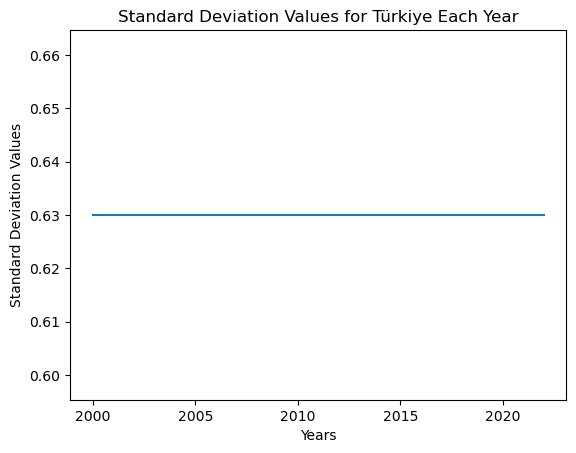

In [723]:
plt.title("Standard Deviation Values for Türkiye Each Year")
plt.xlabel("Years")
plt.ylabel("Standard Deviation Values")
plt.plot(df[(df["Element"]=="Standard Deviation")&(df["Area"]=="Türkiye")&(df["Months"]=="Meteorological year")].Year,df[(df["Element"]=="Standard Deviation")&(df["Area"]=="Türkiye")&(df["Months"]=="Meteorological year")].Value)
plt.show()

As it can be seen in the graph above, the standard deviation value for each year is the same.

In [724]:
#unique standard deviation values according to meteorological year variable for each country
for i in df.Area.unique():
    values=df[(df.Months=="Meteorological year")&(df.Element=="Standard Deviation")&(df.Area==i)].Value.unique()
    print(i,values)

Afghanistan [0.55]
Albania [0.438]
Algeria [0.383]
American Samoa [0.243   nan]
Andorra [0.413]
Angola [0.205]
Anguilla [0.259]
Antarctica [0.474]
Antigua and Barbuda [0.266   nan]
Argentina [0.314]
Armenia [nan]
Aruba [  nan 0.319]
Australia [0.35]
Austria [0.53]
Azerbaijan [nan]
Bahamas [0.253]
Bahrain [0.4]
Bangladesh [0.239]
Barbados [0.262   nan]
Belarus [nan]
Belgium [nan]
Belize [0.278]
Benin [0.262]
Bhutan [0.247]
Bolivia (Plurinational State of) [0.3]
Bosnia and Herzegovina [nan]
Botswana [0.378]
Brazil [0.223]
British Virgin Islands [0.26]
Brunei Darussalam [0.185]
Bulgaria [0.57]
Burkina Faso [0.332]
Burundi [  nan 0.267]
Cabo Verde [0.402   nan]
Cambodia [0.294]
Cameroon [0.213]
Canada [0.642]
Cayman Islands [ nan 0.35]
Central African Republic [0.223]
Chad [0.276]
Channel Islands [0.487]
Chile [0.275]
China [0.251]
China, Hong Kong SAR [0.36]
China, Macao SAR [0.36]
China, mainland [0.283]
China, Taiwan Province of [0.329]
Christmas Island [nan]
Cocos (Keeling) Islands [0.

In [725]:
#only taking not nan values for meteorological year
std_meteorological_year={}
for country in df.Area.unique():
    for value in df[(df.Months=="Meteorological year")&(df.Element=="Standard Deviation")&(df.Area==country)].Value.unique():
        if math.isnan(value) != True:
            std_meteorological_year[country]=value

In [726]:
std_meteorological_year

{'Afghanistan': 0.55,
 'Albania': 0.438,
 'Algeria': 0.383,
 'American Samoa': 0.243,
 'Andorra': 0.413,
 'Angola': 0.205,
 'Anguilla': 0.259,
 'Antarctica': 0.474,
 'Antigua and Barbuda': 0.266,
 'Argentina': 0.314,
 'Aruba': 0.319,
 'Australia': 0.35,
 'Austria': 0.53,
 'Bahamas': 0.253,
 'Bahrain': 0.4,
 'Bangladesh': 0.239,
 'Barbados': 0.262,
 'Belize': 0.278,
 'Benin': 0.262,
 'Bhutan': 0.247,
 'Bolivia (Plurinational State of)': 0.3,
 'Botswana': 0.378,
 'Brazil': 0.223,
 'British Virgin Islands': 0.26,
 'Brunei Darussalam': 0.185,
 'Bulgaria': 0.57,
 'Burkina Faso': 0.332,
 'Burundi': 0.267,
 'Cabo Verde': 0.402,
 'Cambodia': 0.294,
 'Cameroon': 0.213,
 'Canada': 0.642,
 'Cayman Islands': 0.35,
 'Central African Republic': 0.223,
 'Chad': 0.276,
 'Channel Islands': 0.487,
 'Chile': 0.275,
 'China': 0.251,
 'China, Hong Kong SAR': 0.36,
 'China, Macao SAR': 0.36,
 'China, mainland': 0.283,
 'China, Taiwan Province of': 0.329,
 'Cocos (Keeling) Islands': 0.268,
 'Colombia': 0.265

In [727]:
#add all values into the relevant cells
for country in std_meteorological_year.keys():
    value=std_meteorological_year[country]
    df.loc[(df.Months=="Meteorological year")&
           (df.Element=="Standard Deviation")&
           (df.Area==country), 'Value']=value

In [728]:
#unique standard deviation values according to meteorological year variable for each country
for i in df.Area.unique():
    values=df[(df.Months=="Meteorological year")&(df.Element=="Standard Deviation")&(df.Area==i)].Value.unique()
    print(i,values)

Afghanistan [0.55]
Albania [0.438]
Algeria [0.383]
American Samoa [0.243]
Andorra [0.413]
Angola [0.205]
Anguilla [0.259]
Antarctica [0.474]
Antigua and Barbuda [0.266]
Argentina [0.314]
Armenia [nan]
Aruba [0.319]
Australia [0.35]
Austria [0.53]
Azerbaijan [nan]
Bahamas [0.253]
Bahrain [0.4]
Bangladesh [0.239]
Barbados [0.262]
Belarus [nan]
Belgium [nan]
Belize [0.278]
Benin [0.262]
Bhutan [0.247]
Bolivia (Plurinational State of) [0.3]
Bosnia and Herzegovina [nan]
Botswana [0.378]
Brazil [0.223]
British Virgin Islands [0.26]
Brunei Darussalam [0.185]
Bulgaria [0.57]
Burkina Faso [0.332]
Burundi [0.267]
Cabo Verde [0.402]
Cambodia [0.294]
Cameroon [0.213]
Canada [0.642]
Cayman Islands [0.35]
Central African Republic [0.223]
Chad [0.276]
Channel Islands [0.487]
Chile [0.275]
China [0.251]
China, Hong Kong SAR [0.36]
China, Macao SAR [0.36]
China, mainland [0.283]
China, Taiwan Province of [0.329]
Christmas Island [nan]
Cocos (Keeling) Islands [0.268]
Colombia [0.265]
Comoros [0.262]
Con

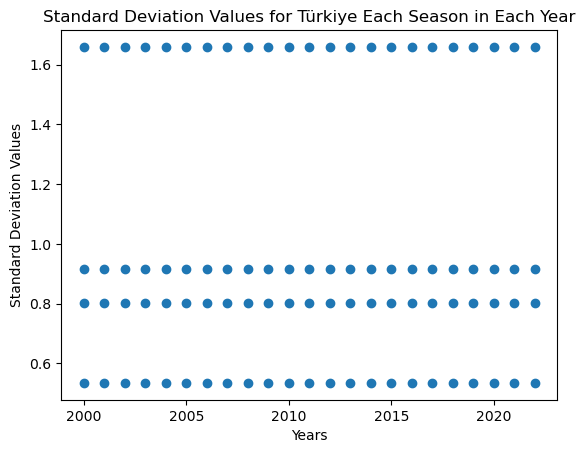

In [729]:
plt.title("Standard Deviation Values for Türkiye Each Season in Each Year")
plt.xlabel("Years")
plt.ylabel("Standard Deviation Values")
plt.scatter(df[(df["Element"]=="Standard Deviation")&(df["Area"]=="Türkiye")&(df["Months"]!="Meteorological year")].Year,df[(df["Element"]=="Standard Deviation")&(df["Area"]=="Türkiye")&(df["Months"]!="Meteorological year")].Value)
plt.show()

According to the graph above, the standard deviation value for each season is the same as each other.

In [730]:
#standard deviation values according to season variable for each country
for i in df.Area.unique():
    print(i,":",df[(df.Months!="Meteorological year")&(df.Element=="Standard Deviation")&(df.Area==i)].Value.unique())

Afghanistan : [1.347 0.922 0.56  0.784]
Albania : [1.031 0.679 0.683 0.846]
Algeria : [0.887 0.552 0.456 0.491]
American Samoa : [0.435   nan 0.378 0.254 0.263]
Andorra : [1.035 0.773 0.798 0.73 ]
Angola : [0.304 0.314 0.344 0.213]
Anguilla : [0.379 0.431 0.262 0.266]
Antarctica : [0.924 1.065 1.37  0.959]
Antigua and Barbuda : [0.422   nan 0.446 0.257 0.236]
Argentina : [0.503 0.699 0.687 0.468]
Armenia : [nan]
Aruba : [  nan 0.511 0.47  0.362 0.345]
Australia : [0.43  0.463 0.469 0.545]
Austria : [1.524 0.862 0.551 0.837]
Azerbaijan : [nan]
Bahamas : [0.702 0.379 0.219 0.286]
Bahrain : [0.986 0.686 0.392 0.616]
Bangladesh : [0.423 0.501 0.294 0.356]
Barbados : [0.421   nan 0.482 0.216 0.292]
Belarus : [nan]
Belgium : [nan]
Belize : [0.586 0.593 0.368 0.357]
Benin : [0.43  0.384 0.363 0.228]
Bhutan : [0.477 0.453 0.266 0.389]
Bolivia (Plurinational State of) : [0.343 0.506 0.491 0.453]
Bosnia and Herzegovina : [nan]
Botswana : [0.692 0.617 0.623 0.501]
Brazil : [0.253 0.342 0.303 0.27

United Kingdom of Great Britain and Northern Ireland : [1.034 0.738 0.702 0.658]
United Republic of Tanzania : [0.358 0.311 0.286 0.287]
United States of America : [0.713 0.446 0.284 0.504]
United States Virgin Islands : [0.366 0.433 0.275 0.305]
Uruguay : [0.526 0.977 0.77  0.668]
Uzbekistan : [nan]
Vanuatu : [0.228 0.245 0.386 0.358]
Venezuela (Bolivarian Republic of) : [0.415 0.439 0.245 0.283]
Viet Nam : [0.749 0.448 0.216 0.328]
Wake Island : [nan]
Wallis and Futuna Islands : [0.292 0.271 0.309 0.323]
Western Sahara : [0.883 1.021 0.613 0.563]
Yemen : [nan]
Zambia : [0.373 0.378 0.422 0.38 ]
Zimbabwe : [0.487 0.543 0.518 0.5  ]


As it can be seen above, there are null values

In [731]:
def season_std_values(season,country):
    values=df[(df.Months!="Meteorological year")&
              (df.Element=="Standard Deviation")&
              (df.Area==country)&
              (df.Months==season)].Value.unique()
    if len(values) > 0 and not math.isnan(values[0]):
        return values
    return []


In [732]:
#standard deviation values according to season variable for each country
std_season = {}
for country in df.Area.unique():
    std_season[country]={"season_1":0, "season_2":0,"season_3":0, "season_4":0}
    for season in ["season_1","season_2","season_3","season_4"]:
        value= season_std_values(season,country)
        if len(value)>0:
            std_season[country][season]=value[0]
    #if there is no value for a country, it is removed from the dictionary, otherwise it gets 0        
    if len(value)==0:
        del std_season[country]

In [733]:
std_season

{'Afghanistan': {'season_1': 1.347,
  'season_2': 0.922,
  'season_3': 0.56,
  'season_4': 0.784},
 'Albania': {'season_1': 1.031,
  'season_2': 0.679,
  'season_3': 0.683,
  'season_4': 0.846},
 'Algeria': {'season_1': 0.887,
  'season_2': 0.552,
  'season_3': 0.456,
  'season_4': 0.491},
 'American Samoa': {'season_1': 0.435,
  'season_2': 0.378,
  'season_3': 0.254,
  'season_4': 0.263},
 'Andorra': {'season_1': 1.035,
  'season_2': 0.773,
  'season_3': 0.798,
  'season_4': 0.73},
 'Angola': {'season_1': 0.304,
  'season_2': 0.314,
  'season_3': 0.344,
  'season_4': 0.213},
 'Anguilla': {'season_1': 0.379,
  'season_2': 0.431,
  'season_3': 0.262,
  'season_4': 0.266},
 'Antarctica': {'season_1': 0.924,
  'season_2': 1.065,
  'season_3': 1.37,
  'season_4': 0.959},
 'Antigua and Barbuda': {'season_1': 0.422,
  'season_2': 0.446,
  'season_3': 0.257,
  'season_4': 0.236},
 'Argentina': {'season_1': 0.503,
  'season_2': 0.699,
  'season_3': 0.687,
  'season_4': 0.468},
 'Australia': {

In [734]:
#adding null values their own values
for country in std_season.keys():
    for season in std_season[i].keys():
        value=std_season[country][season]
        df.loc[(df.Months!="Meteorological year")&
           (df.Element=="Standard Deviation")&
           (df.Area==country)&
           (df.Months==season), 'Value']=value

In [735]:
#standard deviation values according to season variable for each country
for i in df.Area.unique():
    print(i,":",df[(df.Months!="Meteorological year")&(df.Element=="Standard Deviation")&(df.Area==i)].Value.unique())

Afghanistan : [1.347 0.922 0.56  0.784]
Albania : [1.031 0.679 0.683 0.846]
Algeria : [0.887 0.552 0.456 0.491]
American Samoa : [0.435 0.378 0.254 0.263]
Andorra : [1.035 0.773 0.798 0.73 ]
Angola : [0.304 0.314 0.344 0.213]
Anguilla : [0.379 0.431 0.262 0.266]
Antarctica : [0.924 1.065 1.37  0.959]
Antigua and Barbuda : [0.422 0.446 0.257 0.236]
Argentina : [0.503 0.699 0.687 0.468]
Armenia : [nan]
Aruba : [  nan 0.511 0.47  0.362 0.345]
Australia : [0.43  0.463 0.469 0.545]
Austria : [1.524 0.862 0.551 0.837]
Azerbaijan : [nan]
Bahamas : [0.702 0.379 0.219 0.286]
Bahrain : [0.986 0.686 0.392 0.616]
Bangladesh : [0.423 0.501 0.294 0.356]
Barbados : [0.421 0.482 0.216 0.292]
Belarus : [nan]
Belgium : [nan]
Belize : [0.586 0.593 0.368 0.357]
Benin : [0.43  0.384 0.363 0.228]
Bhutan : [0.477 0.453 0.266 0.389]
Bolivia (Plurinational State of) : [0.343 0.506 0.491 0.453]
Bosnia and Herzegovina : [nan]
Botswana : [0.692 0.617 0.623 0.501]
Brazil : [0.253 0.342 0.303 0.275]
British Virgin 

As it can be seen above, there are only 4 values for each country, and there is no null value for the ones which have standard deviation value in relevant season at least one.

In [736]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54810 entries, 0 to 54809
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       54810 non-null  object 
 1   Domain            54810 non-null  object 
 2   Area Code (M49)   54810 non-null  int64  
 3   Area              54810 non-null  object 
 4   Element Code      54810 non-null  int64  
 5   Element           54810 non-null  object 
 6   Months Code       54810 non-null  int64  
 7   Months            54810 non-null  object 
 8   Year Code         54810 non-null  int64  
 9   Year              54810 non-null  int64  
 10  Unit              54810 non-null  object 
 11  Value             48741 non-null  float64
 12  Flag              54810 non-null  object 
 13  Flag Description  54810 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 5.9+ MB


In [737]:
df.Unit.unique()

array(['°c'], dtype=object)

In [738]:
df=df[["Domain","Area","Element","Months","Year","Unit","Value"]]
df["Domain"]="temperature change"
df = df.reset_index(drop=True)
df

Domain         Area             Element  \
0      temperature change  Afghanistan  Temperature change   
1      temperature change  Afghanistan  Temperature change   
2      temperature change  Afghanistan  Temperature change   
3      temperature change  Afghanistan  Temperature change   
4      temperature change  Afghanistan  Temperature change   
...                   ...          ...                 ...   
54805  temperature change     Zimbabwe  Standard Deviation   
54806  temperature change     Zimbabwe  Standard Deviation   
54807  temperature change     Zimbabwe  Standard Deviation   
54808  temperature change     Zimbabwe  Standard Deviation   
54809  temperature change     Zimbabwe  Standard Deviation   

                    Months  Year Unit  Value  
0                 season_1  2000   °c  0.618  
1                 season_1  2001   °c  0.365  
2                 season_1  2002   °c  1.655  
3                 season_1  2003   °c  0.997  
4                 season_1  2004   °c  1.883  
...                    ...   ...  ...    ...  
54805  Meteorological year  2018   °c  0.311  
54806  Meteorological year  2019   °c  0.311  
54807  Meteorological year  2020   °c  0.311  
54808  Meteorological year  2021   °c  0.311  
54809  Meteorological year  2022   °c  0.311  

[54810 rows x 7 columns]

In [739]:
#finding the ratio of null record numbers by each country according to standard deviation with seasons
null_STD_seasons={}
for country in df.Area.unique():
    number=sum(df[(df["Area"]==country)&
                  (df["Element"]=="Standard Deviation")&
                  (df["Months"]!="Meteorological year")].Value.isnull())
    total=len(df[(df["Area"]==country)&
                  (df["Element"]=="Standard Deviation")&
                 (df["Months"]!="Meteorological year")].Value.isnull())
    ratio=number/total
    if ratio > 0.5:
        null_STD_seasons[country]=ratio

In [740]:
#finding the ratio of null record numbers by each country according to standard deviation with Meteorological years
null_STD_years={}
for country in df.Area.unique():
    number=sum(df[(df["Area"]==country)&
                  (df["Element"]=="Standard Deviation")&
                  (df["Months"]=="Meteorological year")].Value.isnull())
    total=len(df[(df["Area"]==country)&
                  (df["Element"]=="Standard Deviation")&
                  (df["Months"]=="Meteorological year")].Value.isnull())
    ratio=number/total
    if ratio > 0.5:
        null_STD_years[country]=ratio

In [741]:
#finding the ratio of null record numbers by each country according to Temperture Change with seasons
null_TC_seasons={}
for country in df.Area.unique():
    number=sum(df[(df["Area"]==country)&
                  (df["Element"]=="Temperature change")&
                  (df["Months"]!="Meteorological year")].Value.isnull())
    total=len(df[(df["Area"]==country)&
                  (df["Element"]=="Temperature change")&
                 (df["Months"]!="Meteorological year")].Value.isnull())
    ratio=number/total
    if ratio > 0.5:
        null_TC_seasons[country]=ratio

In [742]:
#finding the ratio of null record numbers by each country according to Temperature Change with Meteorological years
null_TC_years={}
for country in df.Area.unique():
    number=sum(df[(df["Area"]==country)&
                  (df["Element"]=="Temperature change")&
                  (df["Months"]=="Meteorological year")].Value.isnull())
    total=len(df[(df["Area"]==country)&
                  (df["Element"]=="Temperature change")&
                 (df["Months"]=="Meteorological year")].Value.isnull())
    ratio=number/total
    if ratio > 0.5:
        null_TC_years[country]=ratio

In [743]:
print("Standard deviation more than 50% null country numbers:")
print("----------------------------------------")
print("Seasons: {}  -  Years: {}".format(len(null_STD_seasons),len(null_STD_years)))
print("----------------------------------------")
print("----------------------------------------")
print("Temperature change more than 50% null country numbers:")
print("----------------------------------------")
print("Seasons: {}  -  Years: {}".format(len(null_TC_seasons),len(null_TC_years)))

Standard deviation more than 50% null country numbers:
----------------------------------------
Seasons: 44  -  Years: 43
----------------------------------------
----------------------------------------
Temperature change more than 50% null country numbers:
----------------------------------------
Seasons: 9  -  Years: 9


From above, it can be seen that standard deviation values must be excluded from dataframe, otherwise the model doesn't work properly.

In [744]:
df=df[df["Element"]=="Temperature change"]

In [745]:
df = df.reset_index(drop=True)

In [746]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27405 entries, 0 to 27404
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   27405 non-null  object 
 1   Area     27405 non-null  object 
 2   Element  27405 non-null  object 
 3   Months   27405 non-null  object 
 4   Year     27405 non-null  int64  
 5   Unit     27405 non-null  object 
 6   Value    26171 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.5+ MB


In [747]:
null_TC_seasons

{'Burundi': 0.6847826086956522,
 'Falkland Islands (Malvinas)': 1.0,
 'Midway Island': 0.7282608695652174,
 'Nauru': 1.0,
 'Niue': 1.0,
 'Pitcairn': 0.5108695652173914,
 'Rwanda': 0.6847826086956522,
 'Tokelau': 1.0,
 'Yemen': 1.0}

In [748]:
null_TC_years

{'Burundi': 0.782608695652174,
 'Falkland Islands (Malvinas)': 1.0,
 'Midway Island': 0.782608695652174,
 'Nauru': 1.0,
 'Niue': 1.0,
 'Pitcairn': 0.5217391304347826,
 'Rwanda': 0.782608695652174,
 'Tokelau': 1.0,
 'Yemen': 1.0}

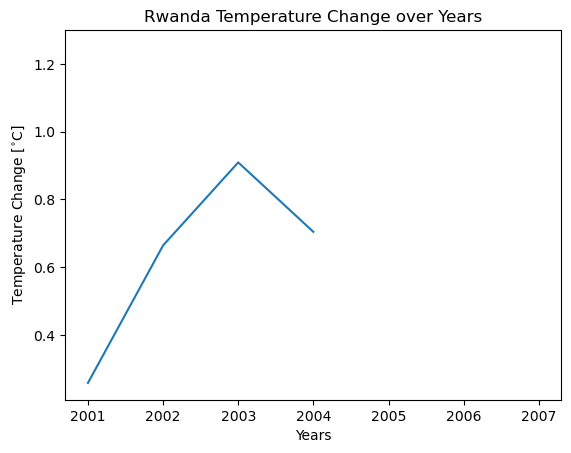

In [749]:
Area="Rwanda"
plt.title("Rwanda Temperature Change over Years")
plt.xlabel("Years")
plt.ylabel("Temperature Change [$^{\circ}$C]")
plt.plot(df[(df["Element"]=="Temperature change")&
            (df["Area"]==Area)&
            (df["Months"]=="Meteorological year")].Year,
         df[(df["Element"]=="Temperature change")&
            (df["Area"]==Area)&
            (df["Months"]=="Meteorological year")].Value)
plt.show()

As it can be seen above, keeping this country doesn't make sense. Because of that, they must be excluded.

In [750]:
null_TC_years_keys=list(null_TC_years.keys())

In [751]:
df=df[~df["Area"].isin(null_TC_years_keys)]
df = df.reset_index(drop=True)

In [752]:
df

Domain         Area             Element  \
0      temperature change  Afghanistan  Temperature change   
1      temperature change  Afghanistan  Temperature change   
2      temperature change  Afghanistan  Temperature change   
3      temperature change  Afghanistan  Temperature change   
4      temperature change  Afghanistan  Temperature change   
...                   ...          ...                 ...   
26365  temperature change     Zimbabwe  Temperature change   
26366  temperature change     Zimbabwe  Temperature change   
26367  temperature change     Zimbabwe  Temperature change   
26368  temperature change     Zimbabwe  Temperature change   
26369  temperature change     Zimbabwe  Temperature change   

                    Months  Year Unit  Value  
0                 season_1  2000   °c  0.618  
1                 season_1  2001   °c  0.365  
2                 season_1  2002   °c  1.655  
3                 season_1  2003   °c  0.997  
4                 season_1  2004   °c  1.883  
...                    ...   ...  ...    ...  
26365  Meteorological year  2018   °c  0.453  
26366  Meteorological year  2019   °c  0.925  
26367  Meteorological year  2020   °c  0.389  
26368  Meteorological year  2021   °c -0.125  
26369  Meteorological year  2022   °c -0.490  

[26370 rows x 7 columns]

In [753]:
check_null(df)

Total number of null rows: 353
The total percentage of null values in dataframe: 1.34%
Null-valued Columns:
--------------
Domain     False
Area       False
Element    False
Months     False
Year       False
Unit       False
Value       True
dtype: bool


In [754]:
#gives new values after interpolation
#def YearsAndValues(interpolated):
#    new_years = interpolated.index.year
#    new_values = interpolated.values
#    return new_years, new_values

# time_interpolation function
def time_interpolation(df, par="forward"):
    df_new = df.copy(deep=True)
    total_numbers = len(df["Area"].unique())
    
    with tqdm(total=total_numbers) as pbar:   
        for area in df["Area"].unique():
            #groupping by area, month, year
            a = df[df["Area"] == area].groupby(["Area", "Months", "Year"]).first()
            #reset indexes
            a_reset = a.reset_index()
            result = a_reset[['Year', 'Value']]
            #taking relevant parts
            x_data = result['Year']
            y_data = result['Value']
            
            #finding NaN values
            nan_mask = y_data.isna()
            x_predictions = x_data[nan_mask]
            
            #interpolate only NaN values
            if not x_predictions.empty:
                x_predictions = x_predictions.tolist()
                x_data = x_data[~nan_mask].tolist()
                y_data = y_data[~nan_mask].tolist()
                
                _, y_predictions = interpolation(x_data, y_data, x_predictions, par)
                
                for year, value in zip(x_predictions, y_predictions):
                    df_new.loc[(df_new['Area'] == area) & (df_new['Year'] == year), 'Value'] = value
            
            pbar.update(1)
                
    return df_new

In [755]:
df2=time_interpolation(df,par="forward")

100%|███████████████████████████████████████████████████████████████████████████████| 232/232 [00:01<00:00, 161.56it/s]


In [756]:
#the function which gives interpolated years and values subsequentially
def YearsAndValues(interpolated):
    interpolated_years=[]
    dates=interpolated.index
    for i in dates:
        interpolated_years.append(str(i)[:4])
    interpolated_values=list(interpolated)
    return interpolated_years,interpolated_values

In [757]:
check_null(df2)

Total number of null rows: 5
The total percentage of null values in dataframe: 0.02%
Null-valued Columns:
--------------
Domain     False
Area       False
Element    False
Months     False
Year       False
Unit       False
Value       True
dtype: bool


In [758]:
df3=time_interpolation(df2,par="backward")

100%|███████████████████████████████████████████████████████████████████████████████| 232/232 [00:00<00:00, 254.29it/s]


In [759]:
check_null(df3)

Total number of null rows: 5
The total percentage of null values in dataframe: 0.02%
Null-valued Columns:
--------------
Domain     False
Area       False
Element    False
Months     False
Year       False
Unit       False
Value       True
dtype: bool


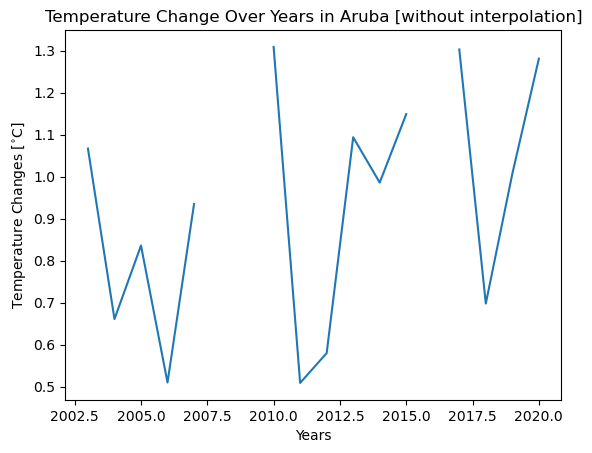

In [760]:
plt.title("Temperature Change Over Years in Aruba [without interpolation]")
plt.xlabel("Years")
plt.ylabel("Temperature Changes [$^{\circ}$C]")
plt.plot(df[(df["Area"]=="Aruba")&
            (df["Months"]=="Meteorological year")].Year,
         df[(df["Area"]=="Aruba")&
            (df["Months"]=="Meteorological year")].Value)
plt.show()

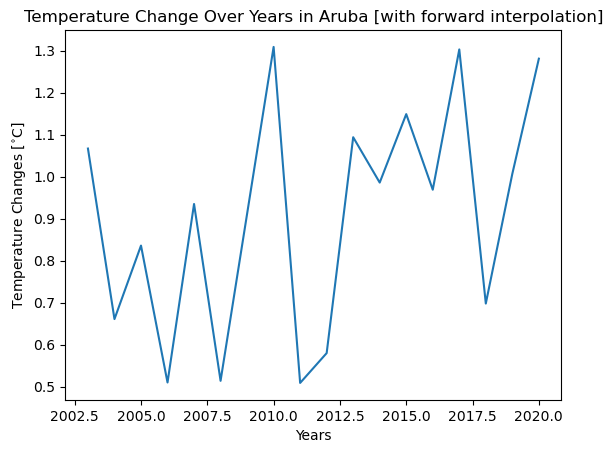

In [761]:
plt.title("Temperature Change Over Years in Aruba [with forward interpolation]")
plt.xlabel("Years")
plt.ylabel("Temperature Changes [$^{\circ}$C]")
plt.plot(df2[(df2["Area"]=="Aruba")&
             (df2["Months"]=="Meteorological year")].Year,
         df2[(df2["Area"]=="Aruba")&
             (df2["Months"]=="Meteorological year")].Value)
plt.show()

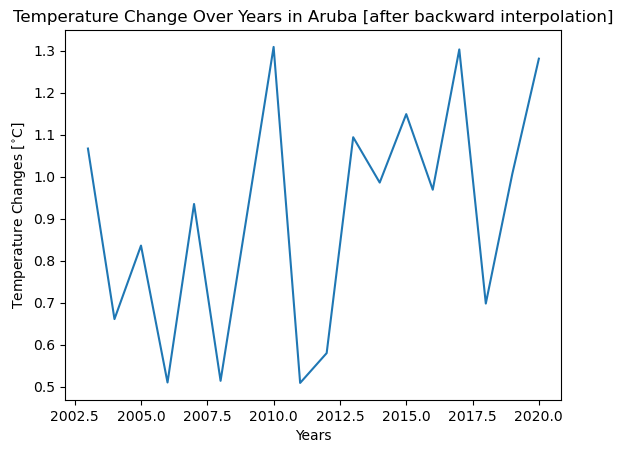

In [762]:
plt.title("Temperature Change Over Years in Aruba [after backward interpolation]")
plt.xlabel("Years")
plt.ylabel("Temperature Changes [$^{\circ}$C]")
plt.plot(df3[(df3["Area"]=="Aruba")&
             (df3["Months"]=="Meteorological year")].Year,
         df3[(df3["Area"]=="Aruba")&
             (df3["Months"]=="Meteorological year")].Value)
plt.show()

In [763]:
df3

Domain         Area             Element  \
0      temperature change  Afghanistan  Temperature change   
1      temperature change  Afghanistan  Temperature change   
2      temperature change  Afghanistan  Temperature change   
3      temperature change  Afghanistan  Temperature change   
4      temperature change  Afghanistan  Temperature change   
...                   ...          ...                 ...   
26365  temperature change     Zimbabwe  Temperature change   
26366  temperature change     Zimbabwe  Temperature change   
26367  temperature change     Zimbabwe  Temperature change   
26368  temperature change     Zimbabwe  Temperature change   
26369  temperature change     Zimbabwe  Temperature change   

                    Months  Year Unit  Value  
0                 season_1  2000   °c  0.618  
1                 season_1  2001   °c  0.365  
2                 season_1  2002   °c  1.655  
3                 season_1  2003   °c  0.997  
4                 season_1  2004   °c  1.883  
...                    ...   ...  ...    ...  
26365  Meteorological year  2018   °c  0.453  
26366  Meteorological year  2019   °c  0.925  
26367  Meteorological year  2020   °c  0.389  
26368  Meteorological year  2021   °c -0.125  
26369  Meteorological year  2022   °c -0.490  

[26370 rows x 7 columns]

In [764]:
df3[(df3["Area"]=="Afghanistan") & (df3["Year"]==2000)]

Domain         Area             Element               Months  \
0   temperature change  Afghanistan  Temperature change             season_1   
23  temperature change  Afghanistan  Temperature change             season_2   
46  temperature change  Afghanistan  Temperature change             season_3   
69  temperature change  Afghanistan  Temperature change             season_4   
92  temperature change  Afghanistan  Temperature change  Meteorological year   

    Year Unit  Value  
0   2000   °c  0.618  
23  2000   °c  2.407  
46  2000   °c  0.330  
69  2000   °c  0.617  
92  2000   °c  0.993

In [765]:
pivot_df = df3.pivot_table(index=['Domain', 'Area', 'Year', 'Unit'], 
                          columns='Months', 
                          values='Value').reset_index()


In [766]:
pivot_df.columns.name = None  #remove the name for columns
pivot_df = pivot_df.rename_axis(None, axis=1)  #remove the name for index

#reorder the columns
columns_order = ['Domain', 'Area', 'Year', 'Unit', 'season_1', 'season_2', 'season_3', 'season_4', 'Meteorological year']
pivot_df = pivot_df.reindex(columns=columns_order)


In [767]:
check_null(pivot_df)

There is no null value in dataframe


In [768]:
df=pivot_df

In [769]:
df

Domain         Area  Year Unit  season_1  season_2  \
0     temperature change  Afghanistan  2000   °c     0.618     2.407   
1     temperature change  Afghanistan  2001   °c     0.365     2.692   
2     temperature change  Afghanistan  2002   °c     1.655     1.425   
3     temperature change  Afghanistan  2003   °c     0.997    -0.159   
4     temperature change  Afghanistan  2004   °c     1.883     1.901   
...                  ...          ...   ...  ...       ...       ...   
5268  temperature change     Zimbabwe  2018   °c     0.094     0.136   
5269  temperature change     Zimbabwe  2019   °c     0.645     0.966   
5270  temperature change     Zimbabwe  2020   °c     0.784     0.176   
5271  temperature change     Zimbabwe  2021   °c    -0.508    -0.500   
5272  temperature change     Zimbabwe  2022   °c    -0.511    -0.777   

      season_3  season_4  Meteorological year  
0        0.330     0.617                0.993  
1        1.065     1.122                1.311  
2        0.881     1.499                1.365  
3        0.821     0.689                0.587  
4        0.650     1.059                1.373  
...        ...       ...                  ...  
5268     1.043     0.540                0.453  
5269     0.999     1.089                0.925  
5270     0.192     0.406                0.389  
5271     0.196     0.314               -0.125  
5272    -0.453    -0.219               -0.490  

[5273 rows x 9 columns]

In [770]:
df.to_csv('new_datasets/Land_temperature_change.csv', index=False)

In [771]:
df_land_temperature=df

# **12. Land Use**

In [772]:
df=pd.read_csv(folder_path+"/"+"Land use - FAOSTAT_data_en_2-22-2024.csv",low_memory=False)
df.head()

Domain Code    Domain  Area Code (M49)         Area  Element Code Element  \
0          RL  Land Use                4  Afghanistan          5110    Area   
1          RL  Land Use                4  Afghanistan          5110    Area   
2          RL  Land Use                4  Afghanistan          5110    Area   
3          RL  Land Use                4  Afghanistan          5110    Area   
4          RL  Land Use                4  Afghanistan          5110    Area   

   Item Code          Item  Year Code  Year     Unit    Value Flag  \
0       6600  Country area       1980  1980  1000 ha  65286.0    A   
1       6600  Country area       1981  1981  1000 ha  65286.0    A   
2       6600  Country area       1982  1982  1000 ha  65286.0    A   
3       6600  Country area       1983  1983  1000 ha  65286.0    A   
4       6600  Country area       1984  1984  1000 ha  65286.0    A   

  Flag Description Note  
0  Official figure  NaN  
1  Official figure  NaN  
2  Official figure  NaN  
3  Official figure  NaN  
4  Official figure  NaN

In [773]:
#check the records where agriculture and agricultural land are not equal
c=0
alist=[]
dif={}
for a,al in zip(list(df[df.Item=="Agriculture"].Value),list(df[df.Item=="Agricultural land"].Value)):
    c+=1
    if a!=al:
        diff=a-al
        dif[c]={"a":a,"al":al,"diff":diff}

        alist.append(c)
print("The number of records which the agriculture and agricultural land are not equal: {}".format(len(alist)))
print("The percentage of it over total dataframe: {:.2f}%".format(len(alist)*100/len(df)))

The number of records which the agriculture and agricultural land are not equal: 235
The percentage of it over total dataframe: 0.24%


In [774]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97995 entries, 0 to 97994
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       97995 non-null  object 
 1   Domain            97995 non-null  object 
 2   Area Code (M49)   97995 non-null  int64  
 3   Area              97995 non-null  object 
 4   Element Code      97995 non-null  int64  
 5   Element           97995 non-null  object 
 6   Item Code         97995 non-null  int64  
 7   Item              97995 non-null  object 
 8   Year Code         97995 non-null  int64  
 9   Year              97995 non-null  int64  
 10  Unit              97995 non-null  object 
 11  Value             97995 non-null  float64
 12  Flag              97995 non-null  object 
 13  Flag Description  97995 non-null  object 
 14  Note              1 non-null      object 
dtypes: float64(1), int64(5), object(9)
memory usage: 11.2+ MB


In [775]:
df["Item"].unique()

array(['Country area', 'Land area', 'Agriculture', 'Agricultural land',
       'Cropland', 'Arable land', 'Temporary crops',
       'Temporary meadows and pastures', 'Temporary fallow',
       'Permanent crops', 'Permanent meadows and pastures',
       'Perm. meadows & pastures - Nat. growing',
       'Land area equipped for irrigation',
       'Land area actually irrigated',
       'Agriculture area actually irrigated',
       'Farm buildings and Farmyards', 'Cropland area actually irrigated',
       'Perm. meadows & pastures - Cultivated',
       'Perm. meadows & pastures area actually irrig.',
       'Forestry area actually irrigated'], dtype=object)

In [776]:
#to check which types are more common and whether all are equal
for i in df["Item"].unique():
    length=len(df[df["Item"]==i])
    percentage=len(df[df["Item"]==i])
    print(i,":",length)

Country area : 9519
Land area : 9519
Agriculture : 9212
Agricultural land : 9212
Cropland : 9086
Arable land : 8960
Temporary crops : 4635
Temporary meadows and pastures : 4635
Temporary fallow : 4635
Permanent crops : 8424
Permanent meadows and pastures : 8478
Perm. meadows & pastures - Nat. growing : 1056
Land area equipped for irrigation : 7424
Land area actually irrigated : 172
Agriculture area actually irrigated : 1083
Farm buildings and Farmyards : 182
Cropland area actually irrigated : 598
Perm. meadows & pastures - Cultivated : 961
Perm. meadows & pastures area actually irrig. : 163
Forestry area actually irrigated : 41


According to above, it is expected that **Country area** and **Land area** are the types which common in all. However, it is better to check it in a better way to be sure.

In [777]:
#finding common item types in each country

#creating pivot table for each item
pivot_table = df.pivot_table(index='Area', columns='Item', aggfunc='size', fill_value=0)

#gettin unique item values
unique_items_per_country = pivot_table.apply(lambda x: x[x > 0].index.tolist(), axis=1)

#converting lists to set to take only intersection
unique_items_per_country = unique_items_per_country.apply(set)

#finding common item values in all
common_items = set.intersection(*unique_items_per_country)

print("The common item values in all countries:")
print("----------------------------------------")
common_items

The common item values in all countries:
----------------------------------------


{'Country area', 'Land area'}

As it can be seen above, the previous findings are correct. Because of that, other types of values must be exlcuded from the dataset.

In [778]:
#taking only country area and land area
df=df[(df['Item']=="Country area") | (df["Item"]=='Land area')]

In [779]:
land_area = df[df["Item"] == "Land area"].set_index(['Area', 'Year'])
country_area = df[df["Item"] == "Country area"].set_index(['Area', 'Year'])

In [780]:
ratio=land_area.Value/country_area.Value

In [781]:
ratios=ratio.reset_index(name='ratio_cover')

In [782]:
df = pd.merge(df, ratios, on=['Area', 'Year'])

In [783]:
#convert units into m2
df.Value=df.Value.apply(lambda x: x*1e7)

In [784]:
df["Unit"].unique()

array(['1000 ha'], dtype=object)

In [785]:
df["Unit"]="m2"

In [786]:
#change the column name to understand the unit of the value
#df=df.rename(columns={'Value': 'value_m2'})

In [787]:
df2=df.copy(deep=True)

In [788]:
#df=df[['Domain','Area','Item','Year','Value','ratio_cover']]
df2=df2[['Domain','Area','Item','Year','Unit','Value','ratio_cover']]
df2 = df2.reset_index(drop=True)
df2

Domain         Area          Item  Year Unit         Value  \
0      Land Use  Afghanistan  Country area  1980   m2  6.528600e+11   
1      Land Use  Afghanistan     Land area  1980   m2  6.522300e+11   
2      Land Use  Afghanistan  Country area  1981   m2  6.528600e+11   
3      Land Use  Afghanistan     Land area  1981   m2  6.522300e+11   
4      Land Use  Afghanistan  Country area  1982   m2  6.528600e+11   
...         ...          ...           ...   ...  ...           ...   
19033  Land Use     Zimbabwe     Land area  2019   m2  3.868500e+11   
19034  Land Use     Zimbabwe  Country area  2020   m2  3.907600e+11   
19035  Land Use     Zimbabwe     Land area  2020   m2  3.868500e+11   
19036  Land Use     Zimbabwe  Country area  2021   m2  3.907600e+11   
19037  Land Use     Zimbabwe     Land area  2021   m2  3.868500e+11   

       ratio_cover  
0         0.999035  
1         0.999035  
2         0.999035  
3         0.999035  
4         0.999035  
...            ...  
19033     0.989994  
19034     0.989994  
19035     0.989994  
19036     0.989994  
19037     0.989994  

[19038 rows x 7 columns]

The land area can be removed since there is another term called ratio_cover is added.

In [789]:
df2=df2[df2["Item"]=="Country area"]

In [790]:
df2=df2[df2["Year"]>=2000]

In [791]:
df2=df2.drop(columns="Item")

In [792]:
df=df2

In [793]:
check_null(df)

There is no null value in dataframe


In [794]:
df=df.rename(columns={"Value":"value_m2",
                   "ratio_cover":"ratio_m2"})
df

Domain         Area  Year Unit      value_m2  ratio_m2
40     Land Use  Afghanistan  2000   m2  6.528600e+11  0.999035
42     Land Use  Afghanistan  2001   m2  6.528600e+11  0.999035
44     Land Use  Afghanistan  2002   m2  6.528600e+11  0.999035
46     Land Use  Afghanistan  2003   m2  6.528600e+11  0.999035
48     Land Use  Afghanistan  2004   m2  6.528600e+11  0.999035
...         ...          ...   ...  ...           ...       ...
19028  Land Use     Zimbabwe  2017   m2  3.907600e+11  0.989994
19030  Land Use     Zimbabwe  2018   m2  3.907600e+11  0.989994
19032  Land Use     Zimbabwe  2019   m2  3.907600e+11  0.989994
19034  Land Use     Zimbabwe  2020   m2  3.907600e+11  0.989994
19036  Land Use     Zimbabwe  2021   m2  3.907600e+11  0.989994

[5174 rows x 6 columns]

In [795]:
df.to_csv('new_datasets/Land_use.csv', index=False)

In [796]:
df_land_use=df

# **13. Pecticides Uses**

In [797]:
df=pd.read_csv(folder_path+"/"+"Pesticides use - FAOSTAT_data_en_2-27-2024.csv")
df.head()

Domain Code          Domain  Area Code (M49)     Area  Element Code  \
0          RP  Pesticides Use                8  Albania          5157   
1          RP  Pesticides Use                8  Albania          5159   
2          RP  Pesticides Use                8  Albania          5173   
3          RP  Pesticides Use                8  Albania          5157   
4          RP  Pesticides Use                8  Albania          5159   

                                    Element  Item Code                Item  \
0                          Agricultural Use       1357  Pesticides (total)   
1                  Use per area of cropland       1357  Pesticides (total)   
2  Use per value of agricultural production       1357  Pesticides (total)   
3                          Agricultural Use       1357  Pesticides (total)   
4                  Use per area of cropland       1357  Pesticides (total)   

   Year Code  Year    Unit   Value Flag Flag Description Note  
0       2000  2000       t  307.98    E  Estimated value  NaN  
1       2000  2000   kg/ha    0.44    E  Estimated value  NaN  
2       2000  2000  g/Int$    0.23    E  Estimated value  NaN  
3       2001  2001       t  319.38    E  Estimated value  NaN  
4       2001  2001   kg/ha    0.46    E  Estimated value  NaN

In [798]:
df["Domain Code"].unique()

array(['RP'], dtype=object)

In [799]:
df["Domain"].unique()

array(['Pesticides Use'], dtype=object)

In [800]:
df["Element"].unique()

array(['Agricultural Use', 'Use per area of cropland',
       'Use per value of agricultural production'], dtype=object)

In [801]:
df["Item"].unique()

array(['Pesticides (total)', 'Insecticides', 'Herbicides',
       'Fungicides and Bactericides', 'Fungicides – Seed treatments',
       'Insecticides – Seed Treatments', 'Rodenticides'], dtype=object)

In [802]:
df=df[['Domain','Area','Element','Item','Year','Unit','Value']]

In [803]:
df.Unit.unique()

array(['t', 'kg/ha', 'g/Int$'], dtype=object)

In [804]:
df.head()

Domain     Area                                   Element  \
0  Pesticides Use  Albania                          Agricultural Use   
1  Pesticides Use  Albania                  Use per area of cropland   
2  Pesticides Use  Albania  Use per value of agricultural production   
3  Pesticides Use  Albania                          Agricultural Use   
4  Pesticides Use  Albania                  Use per area of cropland   

                 Item  Year    Unit   Value  
0  Pesticides (total)  2000       t  307.98  
1  Pesticides (total)  2000   kg/ha    0.44  
2  Pesticides (total)  2000  g/Int$    0.23  
3  Pesticides (total)  2001       t  319.38  
4  Pesticides (total)  2001   kg/ha    0.46

In [805]:
#converting values
def conVals(unit,value):
    if unit=='t':
        return value*1000 #convert from tonnes to kg
    elif unit=='kg/ha':
        return value/(10**4) #convert from kg/ha to kg/m^2
    elif unit=='g/Int$':
        return value*(10**(-3)) #convert from g/$ to kg/$

In [806]:
#convert unit texts
def convUnits(unit):
    if unit== 't': return "kg"
    elif unit== 'kg/ha': return "kg/m2"
    elif unit== 'g/Int$': return "kg/usd"

In [807]:
df.Value=df.apply(lambda x: conVals(x['Unit'],x['Value']), axis=1)
df['Unit']=df['Unit'].apply(lambda x:convUnits(x))
df

Domain      Area                                   Element  \
0      Pesticides Use   Albania                          Agricultural Use   
1      Pesticides Use   Albania                  Use per area of cropland   
2      Pesticides Use   Albania  Use per value of agricultural production   
3      Pesticides Use   Albania                          Agricultural Use   
4      Pesticides Use   Albania                  Use per area of cropland   
...               ...       ...                                       ...   
35197  Pesticides Use  Zimbabwe                          Agricultural Use   
35198  Pesticides Use  Zimbabwe                          Agricultural Use   
35199  Pesticides Use  Zimbabwe                          Agricultural Use   
35200  Pesticides Use  Zimbabwe                          Agricultural Use   
35201  Pesticides Use  Zimbabwe                          Agricultural Use   

                     Item  Year    Unit          Value  
0      Pesticides (total)  2000      kg  307980.000000  
1      Pesticides (total)  2000   kg/m2       0.000044  
2      Pesticides (total)  2000  kg/usd       0.000230  
3      Pesticides (total)  2001      kg  319380.000000  
4      Pesticides (total)  2001   kg/m2       0.000046  
...                   ...   ...     ...            ...  
35197        Rodenticides  2017      kg       0.000000  
35198        Rodenticides  2018      kg       0.000000  
35199        Rodenticides  2019      kg       0.000000  
35200        Rodenticides  2020      kg       0.000000  
35201        Rodenticides  2021      kg       0.000000  

[35202 rows x 7 columns]

In [808]:
#finding total value for all items according to area, element, year
groupped_df=df.groupby(["Domain","Area","Element","Year","Unit"])["Value"].sum().reset_index()
groupped_df

Domain      Area                                   Element  \
0      Pesticides Use   Albania                          Agricultural Use   
1      Pesticides Use   Albania                          Agricultural Use   
2      Pesticides Use   Albania                          Agricultural Use   
3      Pesticides Use   Albania                          Agricultural Use   
4      Pesticides Use   Albania                          Agricultural Use   
...               ...       ...                                       ...   
12550  Pesticides Use  Zimbabwe  Use per value of agricultural production   
12551  Pesticides Use  Zimbabwe  Use per value of agricultural production   
12552  Pesticides Use  Zimbabwe  Use per value of agricultural production   
12553  Pesticides Use  Zimbabwe  Use per value of agricultural production   
12554  Pesticides Use  Zimbabwe  Use per value of agricultural production   

       Year    Unit         Value  
0      2000      kg  607900.00000  
1      2001      kg  629090.00000  
2      2002      kg  650270.00000  
3      2003      kg  671440.00000  
4      2004      kg  692620.00000  
...     ...     ...           ...  
12550  2017  kg/usd       0.00047  
12551  2018  kg/usd       0.00043  
12552  2019  kg/usd       0.00046  
12553  2020  kg/usd       0.00043  
12554  2021  kg/usd       0.00037  

[12555 rows x 6 columns]

In [809]:
#Serbia and Montenegro
a1=groupped_df[groupped_df["Area"]=='Serbia and Montenegro']
#divide value into 2 parts to add 2 different countries equal
a1["Value"]=a1["Value"].apply(lambda x: x/2)

df_serbia=a1.copy(deep=True)
df_montenegro=a1.copy(deep=True)


df_serbia["Area"]="Serbia"
df_montenegro["Area"]="Montenegro"


#adding created dataframes into the main dataframe
groupped_df=pd.concat([groupped_df,df_serbia,df_montenegro], ignore_index=True)
#reset indexes
groupped_df=groupped_df.groupby(['Domain', 'Area', 'Element', 'Year', 'Unit'])['Value'].sum().reset_index()

#excluding Serbia and Montenegro from the main dataframe
groupped_df=groupped_df[~(groupped_df["Area"]=="Serbia and Montenegro")].reset_index()
groupped_df=groupped_df.drop(columns="index")

In [810]:
groupped_df.loc[groupped_df["Area"]=="Sudan (former)","Area"]="Sudan"

In [811]:
groupped_df=groupped_df.groupby(["Domain","Area","Element","Year","Unit"])["Value"].sum().reset_index()

In [812]:
groupped_pivot=groupped_df.pivot_table(index=['Domain', 'Area', 'Year'], columns='Unit', values='Value', aggfunc='sum').reset_index()
groupped_pivot

Unit          Domain      Area  Year         kg     kg/m2   kg/usd
0     Pesticides Use   Albania  2000   607900.0  0.000044  0.00023
1     Pesticides Use   Albania  2001   629090.0  0.000046  0.00023
2     Pesticides Use   Albania  2002   650270.0  0.000047  0.00024
3     Pesticides Use   Albania  2003   671440.0  0.000049  0.00024
4     Pesticides Use   Albania  2004   692620.0  0.000051  0.00023
...              ...       ...   ...        ...       ...      ...
4637  Pesticides Use  Zimbabwe  2017  4193970.0  0.000053  0.00047
4638  Pesticides Use  Zimbabwe  2018  4193970.0  0.000053  0.00043
4639  Pesticides Use  Zimbabwe  2019  4193970.0  0.000053  0.00046
4640  Pesticides Use  Zimbabwe  2020  4193970.0  0.000053  0.00043
4641  Pesticides Use  Zimbabwe  2021  4193970.0  0.000053  0.00037

[4642 rows x 6 columns]

In [813]:
df=groupped_pivot

In [814]:
df=df.rename(columns={"kg":"value_kg_pec",
                   "kg/m2":"value_kg/m2_pec",
                   "kg/usd":"value_kg/usd_pec"})
df

Unit          Domain      Area  Year  value_kg_pec  value_kg/m2_pec  \
0     Pesticides Use   Albania  2000      607900.0         0.000044   
1     Pesticides Use   Albania  2001      629090.0         0.000046   
2     Pesticides Use   Albania  2002      650270.0         0.000047   
3     Pesticides Use   Albania  2003      671440.0         0.000049   
4     Pesticides Use   Albania  2004      692620.0         0.000051   
...              ...       ...   ...           ...              ...   
4637  Pesticides Use  Zimbabwe  2017     4193970.0         0.000053   
4638  Pesticides Use  Zimbabwe  2018     4193970.0         0.000053   
4639  Pesticides Use  Zimbabwe  2019     4193970.0         0.000053   
4640  Pesticides Use  Zimbabwe  2020     4193970.0         0.000053   
4641  Pesticides Use  Zimbabwe  2021     4193970.0         0.000053   

Unit  value_kg/usd_pec  
0              0.00023  
1              0.00023  
2              0.00024  
3              0.00024  
4              0.00023  
...                ...  
4637           0.00047  
4638           0.00043  
4639           0.00046  
4640           0.00043  
4641           0.00037  

[4642 rows x 6 columns]

In [815]:
check_null(df)

Total number of null rows: 836
The total percentage of null values in dataframe: 18.01%
Null-valued Columns:
--------------
Unit
Domain              False
Area                False
Year                False
value_kg_pec        False
value_kg/m2_pec      True
value_kg/usd_pec     True
dtype: bool


In [816]:
df.to_csv('new_datasets/Pecticides_Uses.csv', index=False)

In [817]:
df_pecticides=df





**Dataframe Names:**

df_consumer_prices

df_crops_production

df_emissions

df_employment

df_fertilizers

df_food_security

df_food_balances

df_food_trade

df_investment

df_land_temperature

df_land_use

df_pecticides

# Merging Dataframes

In [47]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
from tqdm import tqdm
import math

In [48]:
folder_path="C:/Users/Mert/Desktop/University of Sussex/Machine Learning/assignment/new_datasets"

In [49]:
dir_list = os.listdir(folder_path)

In [50]:
dataframes={}
for i,file_name in enumerate(dir_list):
    df_name = f"df{i+1}"
    dataframes[df_name]=file_name
    globals()[df_name]=pd.read_csv(folder_path + "/" + file_name)

In [51]:
dataframes

{'df1': 'Consumer_prices.csv',
 'df2': 'Crops_production.csv',
 'df3': 'Emission.csv',
 'df4': 'Employment.csv',
 'df5': 'Fertilizers_use.csv',
 'df6': 'Food_balance.csv',
 'df7': 'Food_security.csv',
 'df8': 'Food_trade.csv',
 'df9': 'Foreign_investment.csv',
 'df10': 'Land_temperature_change.csv',
 'df11': 'Land_use.csv',
 'df12': 'Pecticides_Uses.csv'}

In [52]:
df1.columns

Index(['Area', 'Year', 'Domain', 'Unit', 'value_CPindex'], dtype='object')

In [53]:
for i in dataframes.keys():
    df_name = f"{i}"
    print(globals()[df_name].columns)

Index(['Area', 'Year', 'Domain', 'Unit', 'value_CPindex'], dtype='object')
Index(['Area', 'Year', 'Domain', 'Unit', 'crop_products_kg/m2'], dtype='object')
Index(['Area', 'Year', 'Unit', 'value_kgCO2', 'Domain'], dtype='object')
Index(['Domain', 'Area', 'Year', 'Unit', 'value_people'], dtype='object')
Index(['Domain', 'Area', 'Year', 'Unit', 'value_kg'], dtype='object')
Index(['Domain', 'Area', 'Year', 'Unit', 'animal_product_export_kg',
       'animal_product_import_kg', 'animal_product_other_kg',
       'crop_product_export_kg', 'crop_product_import_kg',
       'crop_product_other_kg'],
      dtype='object')
Index(['Area', 'Year', 'Domain', '%', 'Index', 'cal/pc/year', 'kg/pc/year',
       'usd'],
      dtype='object')
Index(['Domain', 'Area', 'Year', 'Unit', 'crop_products_export_usd',
       'crop_products_import_usd', 'other_products_export_usd',
       'other_products_import_usd'],
      dtype='object')
Index(['Area', 'Year', 'inflow_usd', 'outflows_usd', 'Domain', 'Unit'], dtype

In [54]:
dfs=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]
merged_df=dfs[0]

for df in dfs[1:]:
    #merged_df=pd.concat([merged_df,df], axis=0)

    merged_df=pd.merge(merged_df,df, on=["Area", "Year"], suffixes=('', f'_{i}'),how="outer")

merged_df=pd.merge(df1,df2, on=["Area", "Year"], suffixes=('', f'_{i}'))
merged_df=pd.merge(merged_df,df3, on=["Area", "Year"], suffixes=('', f'_{i}'))
merged_df=pd.merge(merged_df,df4, on=["Area", "Year"], suffixes=('', f'_{i}'))
merged_df=pd.merge(merged_df,df5, on=["Area", "Year"], suffixes=('', f'_{i}'))
merged_df=pd.merge(merged_df,df6, on=["Area", "Year"], suffixes=('', f'_{i}'))
merged_df=pd.merge(merged_df,df7, on=["Area", "Year"], suffixes=('', f'_{i}'))
merged_df=pd.merge(merged_df,df8, on=["Area", "Year"], suffixes=('', f'_{i}'))
merged_df=pd.merge(merged_df,df9, on=["Area", "Year"], suffixes=('', f'_{i}'))
merged_df=pd.merge(merged_df,df10, on=["Area", "Year"], suffixes=('', f'_{i}'))
merged_df=pd.merge(merged_df,df11, on=["Area", "Year"], suffixes=('', f'_{i}'))
merged_df=pd.merge(merged_df,df12, on=["Area", "Year"], suffixes=('', f'_{i}'))

In [55]:
#a table has values from 2010, so filtering for years is necessary to get rid of many number of nulls
merged_df=merged_df[merged_df["Year"]>2009]
merged_df

Area  Year           Domain   Unit  value_CPindex  \
10                   Afghanistan  2010  consumer_prices  index     901.005455   
11                   Afghanistan  2011  consumer_prices  index     997.152791   
12                   Afghanistan  2012  consumer_prices  index    1044.344453   
13                   Afghanistan  2013  consumer_prices  index    1123.425751   
14                   Afghanistan  2014  consumer_prices  index    1210.343257   
...                          ...   ...              ...    ...            ...   
5851  Saint Martin (French part)  2017              NaN    NaN            NaN   
5852  Saint Martin (French part)  2018              NaN    NaN            NaN   
5853  Saint Martin (French part)  2019              NaN    NaN            NaN   
5854  Saint Martin (French part)  2020              NaN    NaN            NaN   
5855  Saint Martin (French part)  2021              NaN    NaN            NaN   

        Domain_df12  Unit_df12  crop_products_kg/m2  Unit_df12   value_kgCO2  \
10    crop products      kg/m2              6.73334      kgCO2  1.302812e+09   
11    crop products      kg/m2              6.83984      kgCO2  1.217192e+09   
12    crop products      kg/m2              6.65926      kgCO2  1.329958e+09   
13    crop products      kg/m2              7.16387      kgCO2  1.342162e+09   
14    crop products      kg/m2              6.76465      kgCO2  1.418266e+09   
...             ...        ...                  ...        ...           ...   
5851            NaN        NaN                  NaN        NaN           NaN   
5852            NaN        NaN                  NaN        NaN           NaN   
5853            NaN        NaN                  NaN        NaN           NaN   
5854            NaN        NaN                  NaN        NaN           NaN   
5855            NaN        NaN                  NaN        NaN           NaN   

      ... season_4 Meteorological year  Domain_df12  Unit_df12      value_m2  \
10    ...    1.433               1.613     Land Use         m2  6.528600e+11   
11    ...    1.306               1.397     Land Use         m2  6.528600e+11   
12    ...    0.931               0.223     Land Use         m2  6.528600e+11   
13    ...    1.810               1.281     Land Use         m2  6.528600e+11   
14    ...    0.891               0.456     Land Use         m2  6.528600e+11   
...   ...      ...                 ...          ...        ...           ...   
5851  ...      NaN                 NaN     Land Use         m2  5.000000e+07   
5852  ...      NaN                 NaN     Land Use         m2  5.000000e+07   
5853  ...      NaN                 NaN     Land Use         m2  5.000000e+07   
5854  ...      NaN                 NaN     Land Use         m2  5.000000e+07   
5855  ...      NaN                 NaN     Land Use         m2  5.000000e+07   

      ratio_m2  Domain_df12 value_kg_pec value_kg/m2_pec  value_kg/usd_pec  
10    0.999035          NaN          NaN             NaN               NaN  
11    0.999035          NaN          NaN             NaN               NaN  
12    0.999035          NaN          NaN             NaN               NaN  
13    0.999035          NaN          NaN             NaN               NaN  
14    0.999035          NaN          NaN             NaN               NaN  
...        ...          ...          ...             ...               ...  
5851  1.000000          NaN          NaN             NaN               NaN  
5852  1.000000          NaN          NaN             NaN               NaN  
5853  1.000000          NaN          NaN             NaN               NaN  
5854  1.000000          NaN          NaN             NaN               NaN  
5855  1.000000          NaN          NaN             NaN               NaN  

[3407 rows x 56 columns]

In [56]:
check_null(merged_df)

Total number of null rows: 2588
The total percentage of null values in dataframe: 75.96%
Null-valued Columns:
--------------
Area                         False
Year                         False
Domain                        True
Unit                          True
value_CPindex                 True
Domain_df12                   True
Unit_df12                     True
crop_products_kg/m2           True
Unit_df12                     True
value_kgCO2                   True
Domain_df12                   True
Domain_df12                   True
Unit_df12                     True
value_people                  True
Domain_df12                   True
Unit_df12                     True
value_kg                      True
Domain_df12                   True
Unit_df12                     True
animal_product_export_kg      True
animal_product_import_kg      True
animal_product_other_kg       True
crop_product_export_kg        True
crop_product_import_kg        True
crop_product_other_kg         True


In [57]:
#creating a column drop list for unit and domain
drop_unit_list=[]
for column in merged_df.columns:
    if "Unit" in column or "Domain" in column:
        drop_unit_list.append(column)

In [58]:
drop_unit_list

['Domain',
 'Unit',
 'Domain_df12',
 'Unit_df12',
 'Unit_df12',
 'Domain_df12',
 'Domain_df12',
 'Unit_df12',
 'Domain_df12',
 'Unit_df12',
 'Domain_df12',
 'Unit_df12',
 'Domain_df12',
 'Domain_df12',
 'Unit_df12',
 'Domain_df12',
 'Unit_df12',
 'Domain_df12',
 'Unit_df12',
 'Domain_df12',
 'Unit_df12',
 'Domain_df12']

In [59]:
#dropping unnecessary columns
merged_df2=merged_df.drop(columns=drop_unit_list)
merged_df2

Area  Year  value_CPindex  crop_products_kg/m2  \
10                   Afghanistan  2010     901.005455              6.73334   
11                   Afghanistan  2011     997.152791              6.83984   
12                   Afghanistan  2012    1044.344453              6.65926   
13                   Afghanistan  2013    1123.425751              7.16387   
14                   Afghanistan  2014    1210.343257              6.76465   
...                          ...   ...            ...                  ...   
5851  Saint Martin (French part)  2017            NaN                  NaN   
5852  Saint Martin (French part)  2018            NaN                  NaN   
5853  Saint Martin (French part)  2019            NaN                  NaN   
5854  Saint Martin (French part)  2020            NaN                  NaN   
5855  Saint Martin (French part)  2021            NaN                  NaN   

       value_kgCO2  value_people     value_kg  animal_product_export_kg  \
10    1.302812e+09     3334410.0   72084000.0                       0.0   
11    1.217192e+09     3442160.0  107228000.0                       0.0   
12    1.329958e+09     3471100.0          NaN                       0.0   
13    1.342162e+09     3456360.0          NaN                       0.0   
14    1.418266e+09     3418120.0          NaN                       0.0   
...            ...           ...          ...                       ...   
5851           NaN           NaN          NaN                       NaN   
5852           NaN           NaN          NaN                       NaN   
5853           NaN           NaN          NaN                       NaN   
5854           NaN           NaN          NaN                       NaN   
5855           NaN           NaN          NaN                       NaN   

      animal_product_import_kg  animal_product_other_kg  ...  season_1  \
10                1.860100e+08             1.652260e+09  ...     1.925   
11                1.760000e+08             1.682000e+09  ...     0.451   
12                2.750000e+08             1.843780e+09  ...    -1.788   
13                3.280000e+08             1.830560e+09  ...     0.849   
14                1.425000e+09             3.360360e+09  ...    -0.544   
...                        ...                      ...  ...       ...   
5851                       NaN                      NaN  ...       NaN   
5852                       NaN                      NaN  ...       NaN   
5853                       NaN                      NaN  ...       NaN   
5854                       NaN                      NaN  ...       NaN   
5855                       NaN                      NaN  ...       NaN   

      season_2  season_3  season_4  Meteorological year      value_m2  \
10       2.533     0.562     1.433                1.613  6.528600e+11   
11       2.098     1.731     1.306                1.397  6.528600e+11   
12       0.739     1.011     0.931                0.223  6.528600e+11   
13       1.207     1.258     1.810                1.281  6.528600e+11   
14       0.514     0.962     0.891                0.456  6.528600e+11   
...        ...       ...       ...                  ...           ...   
5851       NaN       NaN       NaN                  NaN  5.000000e+07   
5852       NaN       NaN       NaN                  NaN  5.000000e+07   
5853       NaN       NaN       NaN                  NaN  5.000000e+07   
5854       NaN       NaN       NaN                  NaN  5.000000e+07   
5855       NaN       NaN       NaN                  NaN  5.000000e+07   

      ratio_m2  value_kg_pec  value_kg/m2_pec  value_kg/usd_pec  
10    0.999035           NaN              NaN               NaN  
11    0.999035           NaN              NaN               NaN  
12    0.999035           NaN              NaN               NaN  
13    0.999035           NaN              NaN               NaN  
14    0.999035           NaN              NaN               NaN  
...        ...           ...

In [60]:
merged_df2.columns

Index(['Area', 'Year', 'value_CPindex', 'crop_products_kg/m2', 'value_kgCO2',
       'value_people', 'value_kg', 'animal_product_export_kg',
       'animal_product_import_kg', 'animal_product_other_kg',
       'crop_product_export_kg', 'crop_product_import_kg',
       'crop_product_other_kg', '%', 'Index', 'cal/pc/year', 'kg/pc/year',
       'usd', 'crop_products_export_usd', 'crop_products_import_usd',
       'other_products_export_usd', 'other_products_import_usd', 'inflow_usd',
       'outflows_usd', 'season_1', 'season_2', 'season_3', 'season_4',
       'Meteorological year', 'value_m2', 'ratio_m2', 'value_kg_pec',
       'value_kg/m2_pec', 'value_kg/usd_pec'],
      dtype='object')

In [61]:
pivot_table=merged_df2.copy(deep=True)
pivot_table

Area  Year  value_CPindex  crop_products_kg/m2  \
10                   Afghanistan  2010     901.005455              6.73334   
11                   Afghanistan  2011     997.152791              6.83984   
12                   Afghanistan  2012    1044.344453              6.65926   
13                   Afghanistan  2013    1123.425751              7.16387   
14                   Afghanistan  2014    1210.343257              6.76465   
...                          ...   ...            ...                  ...   
5851  Saint Martin (French part)  2017            NaN                  NaN   
5852  Saint Martin (French part)  2018            NaN                  NaN   
5853  Saint Martin (French part)  2019            NaN                  NaN   
5854  Saint Martin (French part)  2020            NaN                  NaN   
5855  Saint Martin (French part)  2021            NaN                  NaN   

       value_kgCO2  value_people     value_kg  animal_product_export_kg  \
10    1.302812e+09     3334410.0   72084000.0                       0.0   
11    1.217192e+09     3442160.0  107228000.0                       0.0   
12    1.329958e+09     3471100.0          NaN                       0.0   
13    1.342162e+09     3456360.0          NaN                       0.0   
14    1.418266e+09     3418120.0          NaN                       0.0   
...            ...           ...          ...                       ...   
5851           NaN           NaN          NaN                       NaN   
5852           NaN           NaN          NaN                       NaN   
5853           NaN           NaN          NaN                       NaN   
5854           NaN           NaN          NaN                       NaN   
5855           NaN           NaN          NaN                       NaN   

      animal_product_import_kg  animal_product_other_kg  ...  season_1  \
10                1.860100e+08             1.652260e+09  ...     1.925   
11                1.760000e+08             1.682000e+09  ...     0.451   
12                2.750000e+08             1.843780e+09  ...    -1.788   
13                3.280000e+08             1.830560e+09  ...     0.849   
14                1.425000e+09             3.360360e+09  ...    -0.544   
...                        ...                      ...  ...       ...   
5851                       NaN                      NaN  ...       NaN   
5852                       NaN                      NaN  ...       NaN   
5853                       NaN                      NaN  ...       NaN   
5854                       NaN                      NaN  ...       NaN   
5855                       NaN                      NaN  ...       NaN   

      season_2  season_3  season_4  Meteorological year      value_m2  \
10       2.533     0.562     1.433                1.613  6.528600e+11   
11       2.098     1.731     1.306                1.397  6.528600e+11   
12       0.739     1.011     0.931                0.223  6.528600e+11   
13       1.207     1.258     1.810                1.281  6.528600e+11   
14       0.514     0.962     0.891                0.456  6.528600e+11   
...        ...       ...       ...                  ...           ...   
5851       NaN       NaN       NaN                  NaN  5.000000e+07   
5852       NaN       NaN       NaN                  NaN  5.000000e+07   
5853       NaN       NaN       NaN                  NaN  5.000000e+07   
5854       NaN       NaN       NaN                  NaN  5.000000e+07   
5855       NaN       NaN       NaN                  NaN  5.000000e+07   

      ratio_m2  value_kg_pec  value_kg/m2_pec  value_kg/usd_pec  
10    0.999035           NaN              NaN               NaN  
11    0.999035           NaN              NaN               NaN  
12    0.999035           NaN              NaN               NaN  
13    0.999035           NaN              NaN               NaN  
14    0.999035           NaN              NaN               NaN  
...        ...           ...

In [62]:
check_null(pivot_table)

Total number of null rows: 2588
The total percentage of null values in dataframe: 75.96%
Null-valued Columns:
--------------
Area                         False
Year                         False
value_CPindex                 True
crop_products_kg/m2           True
value_kgCO2                   True
value_people                  True
value_kg                      True
animal_product_export_kg      True
animal_product_import_kg      True
animal_product_other_kg       True
crop_product_export_kg        True
crop_product_import_kg        True
crop_product_other_kg         True
%                             True
Index                         True
cal/pc/year                   True
kg/pc/year                    True
usd                           True
crop_products_export_usd      True
crop_products_import_usd      True
other_products_export_usd     True
other_products_import_usd     True
inflow_usd                    True
outflows_usd                  True
season_1                      True


In [63]:
#the values to be predicted
y_values=pd.read_csv("y_values.csv")
y_values

Area  Year  crop_products_export_usd  export_value_prediction
0     Afghanistan  2000              3.108000e+07             4.761200e+07
1     Afghanistan  2001              2.711000e+07             4.863300e+07
2     Afghanistan  2002              3.115300e+07             6.151000e+07
3     Afghanistan  2003              4.761200e+07             5.633500e+07
4     Afghanistan  2004              4.863300e+07             1.244670e+08
...           ...   ...                       ...                      ...
4480     Zimbabwe  2018              9.953758e+08             9.223096e+08
4481     Zimbabwe  2019              9.537533e+08             1.095273e+09
4482     Zimbabwe  2020              9.369103e+08                      NaN
4483     Zimbabwe  2021              9.223096e+08                      NaN
4484     Zimbabwe  2022              1.095273e+09                      NaN

[4485 rows x 4 columns]

In [64]:
y_values=y_values[["Area","Year","export_value_prediction"]]
y_values

Area  Year  export_value_prediction
0     Afghanistan  2000             4.761200e+07
1     Afghanistan  2001             4.863300e+07
2     Afghanistan  2002             6.151000e+07
3     Afghanistan  2003             5.633500e+07
4     Afghanistan  2004             1.244670e+08
...           ...   ...                      ...
4480     Zimbabwe  2018             9.223096e+08
4481     Zimbabwe  2019             1.095273e+09
4482     Zimbabwe  2020                      NaN
4483     Zimbabwe  2021                      NaN
4484     Zimbabwe  2022                      NaN

[4485 rows x 3 columns]

In [65]:
#the countries which need to be excluded from dataframe since there is no prediction values for them
excluded_countries=list(set(pivot_table.Area.unique())-set(y_values.Area.unique()))
excluded_countries

['Falkland Islands (Malvinas)',
 'Svalbard and Jan Mayen Islands',
 'British Virgin Islands',
 'South Sudan',
 'French Guiana',
 'Gibraltar',
 'Wake Island',
 'Northern Mariana Islands',
 'Curaçao',
 'Andorra',
 'Antarctica',
 'Saint Martin (French part)',
 'Wallis and Futuna Islands',
 'Turks and Caicos Islands',
 'Saint Barthélemy',
 'Sudan (former)',
 'Sint Maarten (Dutch part)',
 'United States Virgin Islands',
 'Puerto Rico',
 'Bermuda',
 'Bonaire, Sint Eustatius and Saba',
 'Micronesia (Federated States of)',
 'San Marino',
 'Monaco',
 'Pitcairn',
 'American Samoa',
 'Marshall Islands',
 'Christmas Island',
 'Netherlands Antilles (former)',
 'Isle of Man',
 'Palau',
 'Cocos (Keeling) Islands',
 'Channel Islands',
 'South Georgia and the South Sandwich Islands',
 'Aruba',
 'Martinique',
 'Holy See',
 'Saint Helena, Ascension and Tristan da Cunha',
 'Montserrat',
 'Western Sahara',
 'Greenland',
 'Åland Islands',
 'Mayotte',
 'Réunion',
 'French Southern Territories',
 'Saint Pierr

In [66]:
#excluding the areas from dataframe
for exc_area in excluded_countries:
    pivot_table=pivot_table[pivot_table["Area"]!=exc_area]

In [67]:
pivot_table

Area  Year  value_CPindex  crop_products_kg/m2   value_kgCO2  \
10    Afghanistan  2010     901.005455              6.73334  1.302812e+09   
11    Afghanistan  2011     997.152791              6.83984  1.217192e+09   
12    Afghanistan  2012    1044.344453              6.65926  1.329958e+09   
13    Afghanistan  2013    1123.425751              7.16387  1.342162e+09   
14    Afghanistan  2014    1210.343257              6.76465  1.418266e+09   
...           ...   ...            ...                  ...           ...   
5189       Tuvalu  2018            NaN              1.63849  0.000000e+00   
5190       Tuvalu  2019            NaN              1.64445  0.000000e+00   
5191       Tuvalu  2020            NaN              1.64447  0.000000e+00   
5192       Tuvalu  2021            NaN              1.64374  0.000000e+00   
5193       Tuvalu  2022            NaN              1.64489           NaN   

      value_people     value_kg  animal_product_export_kg  \
10       3334410.0   72084000.0                       0.0   
11       3442160.0  107228000.0                       0.0   
12       3471100.0          NaN                       0.0   
13       3456360.0          NaN                       0.0   
14       3418120.0          NaN                       0.0   
...            ...          ...                       ...   
5189           NaN          NaN                       NaN   
5190           NaN          NaN                       NaN   
5191           NaN          NaN                       NaN   
5192           NaN          NaN                       NaN   
5193           NaN          NaN                       NaN   

      animal_product_import_kg  animal_product_other_kg  ...  season_1  \
10                1.860100e+08             1.652260e+09  ...     1.925   
11                1.760000e+08             1.682000e+09  ...     0.451   
12                2.750000e+08             1.843780e+09  ...    -1.788   
13                3.280000e+08             1.830560e+09  ...     0.849   
14                1.425000e+09             3.360360e+09  ...    -0.544   
...                        ...                      ...  ...       ...   
5189                       NaN                      NaN  ...     0.747   
5190                       NaN                      NaN  ...     0.847   
5191                       NaN                      NaN  ...     0.780   
5192                       NaN                      NaN  ...     0.420   
5193                       NaN                      NaN  ...     0.430   

      season_2  season_3  season_4  Meteorological year      value_m2  \
10       2.533     0.562     1.433                1.613  6.528600e+11   
11       2.098     1.731     1.306                1.397  6.528600e+11   
12       0.739     1.011     0.931                0.223  6.528600e+11   
13       1.207     1.258     1.810                1.281  6.528600e+11   
14       0.514     0.962     0.891                0.456  6.528600e+11   
...        ...       ...       ...                  ...           ...   
5189     1.043     0.996     1.112                0.975  3.000000e+07   
5190     1.000     1.379     1.085                1.078  3.000000e+07   
5191     1.666     1.196     1.139                1.195  3.000000e+07   
5192     0.763     0.792     0.782                0.689  3.000000e+07   
5193     0.650     0.872     0.699                0.663           NaN   

      ratio_m2  value_kg_pec  value_kg/m2_pec  value_kg/usd_pec  
10    0.999035           NaN              NaN               NaN  
11    0.999035           NaN              NaN               NaN  
12    0.999035           NaN              NaN               NaN  
13    0.999035           NaN              NaN               NaN  
14    0.999035           NaN              NaN               NaN  
...        ...           ...              ...               ...  
5189  1.000000        4280.0         0.000121           0.00165  
5190  1.000000        4290.0         0.000121           0.001

In [68]:
merged_df=pd.merge(pivot_table,y_values, on=["Area", "Year"], suffixes=('', f'_{i}'),how="inner")
merged_df

Area  Year  value_CPindex  crop_products_kg/m2   value_kgCO2  \
0     Afghanistan  2010     901.005455              6.73334  1.302812e+09   
1     Afghanistan  2011     997.152791              6.83984  1.217192e+09   
2     Afghanistan  2012    1044.344453              6.65926  1.329958e+09   
3     Afghanistan  2013    1123.425751              7.16387  1.342162e+09   
4     Afghanistan  2014    1210.343257              6.76465  1.418266e+09   
...           ...   ...            ...                  ...           ...   
2530       Tuvalu  2018            NaN              1.63849  0.000000e+00   
2531       Tuvalu  2019            NaN              1.64445  0.000000e+00   
2532       Tuvalu  2020            NaN              1.64447  0.000000e+00   
2533       Tuvalu  2021            NaN              1.64374  0.000000e+00   
2534       Tuvalu  2022            NaN              1.64489           NaN   

      value_people     value_kg  animal_product_export_kg  \
0        3334410.0   72084000.0                       0.0   
1        3442160.0  107228000.0                       0.0   
2        3471100.0          NaN                       0.0   
3        3456360.0          NaN                       0.0   
4        3418120.0          NaN                       0.0   
...            ...          ...                       ...   
2530           NaN          NaN                       NaN   
2531           NaN          NaN                       NaN   
2532           NaN          NaN                       NaN   
2533           NaN          NaN                       NaN   
2534           NaN          NaN                       NaN   

      animal_product_import_kg  animal_product_other_kg  ...  season_2  \
0                 1.860100e+08             1.652260e+09  ...     2.533   
1                 1.760000e+08             1.682000e+09  ...     2.098   
2                 2.750000e+08             1.843780e+09  ...     0.739   
3                 3.280000e+08             1.830560e+09  ...     1.207   
4                 1.425000e+09             3.360360e+09  ...     0.514   
...                        ...                      ...  ...       ...   
2530                       NaN                      NaN  ...     1.043   
2531                       NaN                      NaN  ...     1.000   
2532                       NaN                      NaN  ...     1.666   
2533                       NaN                      NaN  ...     0.763   
2534                       NaN                      NaN  ...     0.650   

      season_3  season_4  Meteorological year      value_m2  ratio_m2  \
0        0.562     1.433                1.613  6.528600e+11  0.999035   
1        1.731     1.306                1.397  6.528600e+11  0.999035   
2        1.011     0.931                0.223  6.528600e+11  0.999035   
3        1.258     1.810                1.281  6.528600e+11  0.999035   
4        0.962     0.891                0.456  6.528600e+11  0.999035   
...        ...       ...                  ...           ...       ...   
2530     0.996     1.112                0.975  3.000000e+07  1.000000   
2531     1.379     1.085                1.078  3.000000e+07  1.000000   
2532     1.196     1.139                1.195  3.000000e+07  1.000000   
2533     0.792     0.782                0.689  3.000000e+07  1.000000   
2534     0.872     0.699                0.663           NaN       NaN   

      value_kg_pec  value_kg/m2_pec  value_kg/usd_pec  export_value_prediction  
0              NaN              NaN               NaN              189275000.0  
1              NaN              NaN               NaN              286736690.0  
2              NaN              NaN               NaN              280591350.0  
3              NaN              NaN               NaN              319609530.0  
4              NaN              NaN               NaN              496639810.0  
...            ...              ...               ...                      ...  
2530        4280.0    

In [69]:
min_max_years=check_min_max_uniques(merged_df)

min: [2010] max: [2022]


Since the value 3 year later is desired to be predicted, the dataframe must be taken 3 years before the maximum common year value. As it can be above, all of the areas have value until 2022. Therefore, all of the years later than 2019 mustnt be taken. Already, 3-year later value (prediction) was added to the end of the dataframe in the previous merging.

In [70]:
merged_df=merged_df[merged_df["Year"]<=2019]
merged_df

Area  Year  value_CPindex  crop_products_kg/m2   value_kgCO2  \
0     Afghanistan  2010     901.005455              6.73334  1.302812e+09   
1     Afghanistan  2011     997.152791              6.83984  1.217192e+09   
2     Afghanistan  2012    1044.344453              6.65926  1.329958e+09   
3     Afghanistan  2013    1123.425751              7.16387  1.342162e+09   
4     Afghanistan  2014    1210.343257              6.76465  1.418266e+09   
...           ...   ...            ...                  ...           ...   
2527       Tuvalu  2015            NaN              1.64928  0.000000e+00   
2528       Tuvalu  2016            NaN              1.64515  0.000000e+00   
2529       Tuvalu  2017            NaN              1.64050  0.000000e+00   
2530       Tuvalu  2018            NaN              1.63849  0.000000e+00   
2531       Tuvalu  2019            NaN              1.64445  0.000000e+00   

      value_people     value_kg  animal_product_export_kg  \
0        3334410.0   72084000.0                       0.0   
1        3442160.0  107228000.0                       0.0   
2        3471100.0          NaN                       0.0   
3        3456360.0          NaN                       0.0   
4        3418120.0          NaN                       0.0   
...            ...          ...                       ...   
2527           NaN          NaN                       NaN   
2528           NaN          NaN                       NaN   
2529           NaN          NaN                       NaN   
2530           NaN          NaN                       NaN   
2531           NaN          NaN                       NaN   

      animal_product_import_kg  animal_product_other_kg  ...  season_2  \
0                 1.860100e+08             1.652260e+09  ...     2.533   
1                 1.760000e+08             1.682000e+09  ...     2.098   
2                 2.750000e+08             1.843780e+09  ...     0.739   
3                 3.280000e+08             1.830560e+09  ...     1.207   
4                 1.425000e+09             3.360360e+09  ...     0.514   
...                        ...                      ...  ...       ...   
2527                       NaN                      NaN  ...     0.776   
2528                       NaN                      NaN  ...     0.860   
2529                       NaN                      NaN  ...     0.740   
2530                       NaN                      NaN  ...     1.043   
2531                       NaN                      NaN  ...     1.000   

      season_3  season_4  Meteorological year      value_m2  ratio_m2  \
0        0.562     1.433                1.613  6.528600e+11  0.999035   
1        1.731     1.306                1.397  6.528600e+11  0.999035   
2        1.011     0.931                0.223  6.528600e+11  0.999035   
3        1.258     1.810                1.281  6.528600e+11  0.999035   
4        0.962     0.891                0.456  6.528600e+11  0.999035   
...        ...       ...                  ...           ...       ...   
2527     0.856     0.849                0.798  3.000000e+07  1.000000   
2528     0.622     1.052                0.921  3.000000e+07  1.000000   
2529     1.272     1.042                1.013  3.000000e+07  1.000000   
2530     0.996     1.112                0.975  3.000000e+07  1.000000   
2531     1.379     1.085                1.078  3.000000e+07  1.000000   

      value_kg_pec  value_kg/m2_pec  value_kg/usd_pec  export_value_prediction  
0              NaN              NaN               NaN              189275000.0  
1              NaN              NaN               NaN              286736690.0  
2              NaN              NaN               NaN              280591350.0  
3              NaN              NaN               NaN              319609530.0  
4              NaN              NaN               NaN              496639810.0  
...            ...              ...               ...                      ...  
2527        4280.0    

In [71]:
#saving merged dataframe
merged_df.to_csv('merged.csv', index=False)

In [72]:
check_null(merged_df)

Total number of null rows: 1232
The total percentage of null values in dataframe: 63.18%
Null-valued Columns:
--------------
Area                         False
Year                         False
value_CPindex                 True
crop_products_kg/m2           True
value_kgCO2                   True
value_people                  True
value_kg                      True
animal_product_export_kg      True
animal_product_import_kg      True
animal_product_other_kg       True
crop_product_export_kg        True
crop_product_import_kg        True
crop_product_other_kg         True
%                             True
Index                         True
cal/pc/year                   True
kg/pc/year                    True
usd                           True
crop_products_export_usd      True
crop_products_import_usd     False
other_products_export_usd     True
other_products_import_usd    False
inflow_usd                    True
outflows_usd                  True
season_1                      True


# Preprocessing Merged Data

In [73]:
pivot_table=pd.read_csv("merged.csv")

In [74]:
pivot_table

Area  Year  value_CPindex  crop_products_kg/m2   value_kgCO2  \
0     Afghanistan  2010     901.005455              6.73334  1.302812e+09   
1     Afghanistan  2011     997.152791              6.83984  1.217192e+09   
2     Afghanistan  2012    1044.344453              6.65926  1.329958e+09   
3     Afghanistan  2013    1123.425751              7.16387  1.342162e+09   
4     Afghanistan  2014    1210.343257              6.76465  1.418266e+09   
...           ...   ...            ...                  ...           ...   
1945       Tuvalu  2015            NaN              1.64928  0.000000e+00   
1946       Tuvalu  2016            NaN              1.64515  0.000000e+00   
1947       Tuvalu  2017            NaN              1.64050  0.000000e+00   
1948       Tuvalu  2018            NaN              1.63849  0.000000e+00   
1949       Tuvalu  2019            NaN              1.64445  0.000000e+00   

      value_people     value_kg  animal_product_export_kg  \
0        3334410.0   72084000.0                       0.0   
1        3442160.0  107228000.0                       0.0   
2        3471100.0          NaN                       0.0   
3        3456360.0          NaN                       0.0   
4        3418120.0          NaN                       0.0   
...            ...          ...                       ...   
1945           NaN          NaN                       NaN   
1946           NaN          NaN                       NaN   
1947           NaN          NaN                       NaN   
1948           NaN          NaN                       NaN   
1949           NaN          NaN                       NaN   

      animal_product_import_kg  animal_product_other_kg  ...  season_2  \
0                 1.860100e+08             1.652260e+09  ...     2.533   
1                 1.760000e+08             1.682000e+09  ...     2.098   
2                 2.750000e+08             1.843780e+09  ...     0.739   
3                 3.280000e+08             1.830560e+09  ...     1.207   
4                 1.425000e+09             3.360360e+09  ...     0.514   
...                        ...                      ...  ...       ...   
1945                       NaN                      NaN  ...     0.776   
1946                       NaN                      NaN  ...     0.860   
1947                       NaN                      NaN  ...     0.740   
1948                       NaN                      NaN  ...     1.043   
1949                       NaN                      NaN  ...     1.000   

      season_3  season_4  Meteorological year      value_m2  ratio_m2  \
0        0.562     1.433                1.613  6.528600e+11  0.999035   
1        1.731     1.306                1.397  6.528600e+11  0.999035   
2        1.011     0.931                0.223  6.528600e+11  0.999035   
3        1.258     1.810                1.281  6.528600e+11  0.999035   
4        0.962     0.891                0.456  6.528600e+11  0.999035   
...        ...       ...                  ...           ...       ...   
1945     0.856     0.849                0.798  3.000000e+07  1.000000   
1946     0.622     1.052                0.921  3.000000e+07  1.000000   
1947     1.272     1.042                1.013  3.000000e+07  1.000000   
1948     0.996     1.112                0.975  3.000000e+07  1.000000   
1949     1.379     1.085                1.078  3.000000e+07  1.000000   

      value_kg_pec  value_kg/m2_pec  value_kg/usd_pec  export_value_prediction  
0              NaN              NaN               NaN              189275000.0  
1              NaN              NaN               NaN              286736690.0  
2              NaN              NaN               NaN              280591350.0  
3              NaN              NaN               NaN              319609530.0  
4              NaN              NaN               NaN              496639810.0  
...            ...              ...               ...                      ...  
1945        4280.0    

In [75]:
#groupping by 'Area' and count NaNs
nan_counts = pivot_table.groupby('Area').apply(lambda x: x.isnull().sum(axis=0))

#the areas with at least one NaN value
areas_with_nan = nan_counts[nan_counts.gt(0).any(axis=1)]
nan_countries=areas_with_nan.gt(0).sum(axis=1)
number=list(nan_countries)
name=list(nan_countries.index)

print("The countries have NaN values:")
print("------------------------------")
for i,j in zip(name,number):
    print(i,":",j)

The countries have NaN values:
------------------------------
Afghanistan : 4
Algeria : 1
Angola : 1
Antigua and Barbuda : 5
Armenia : 1
Australia : 1
Austria : 1
Azerbaijan : 1
Bahamas : 4
Bahrain : 8
Barbados : 2
Belarus : 1
Belgium : 1
Belize : 1
Benin : 1
Bhutan : 7
Bolivia (Plurinational State of) : 1
Bosnia and Herzegovina : 1
Botswana : 1
Brazil : 1
Brunei Darussalam : 9
Bulgaria : 1
Burkina Faso : 1
Burundi : 9
Cabo Verde : 1
Cambodia : 1
Cameroon : 1
Central African Republic : 2
Chad : 1
Chile : 1
China : 5
China, Hong Kong SAR : 1
China, Macao SAR : 4
China, Taiwan Province of : 2
China, mainland : 2
Colombia : 1
Comoros : 1
Congo : 1
Cook Islands : 13
Costa Rica : 1
Croatia : 1
Cuba : 4
Côte d'Ivoire : 1
Democratic People's Republic of Korea : 5
Democratic Republic of the Congo : 1
Djibouti : 1
Dominica : 5
Ecuador : 1
Egypt : 1
El Salvador : 1
Equatorial Guinea : 9
Eritrea : 10
Estonia : 1
Eswatini : 1
Ethiopia : 1
Faroe Islands : 17
Fiji : 1
Finland : 1
French Polynesia : 

In [76]:
pivot_table.groupby('Area').apply(lambda x: x.isnull().sum(axis=0))

Area  Year  value_CPindex  \
Area                                                            
Afghanistan                            0     0              0   
Albania                                0     0              0   
Algeria                                0     0              0   
Angola                                 0     0              0   
Antigua and Barbuda                    0     0              0   
...                                  ...   ...            ...   
Venezuela (Bolivarian Republic of)     0     0              0   
Viet Nam                               0     0              0   
Yemen                                  0     0              0   
Zambia                                 0     0              0   
Zimbabwe                               0     0              0   

                                    crop_products_kg/m2  value_kgCO2  \
Area                                                                   
Afghanistan                                           0            0   
Albania                                               0            0   
Algeria                                               0            0   
Angola                                                0            0   
Antigua and Barbuda                                   0            0   
...                                                 ...          ...   
Venezuela (Bolivarian Republic of)                    0            0   
Viet Nam                                              0            0   
Yemen                                                 0            0   
Zambia                                                0            0   
Zimbabwe                                              0            0   

                                    value_people  value_kg  \
Area                                                         
Afghanistan                                    0         7   
Albania                                        0         0   
Algeria                                        0         3   
Angola                                         0         8   
Antigua and Barbuda                           10         8   
...                                          ...       ...   
Venezuela (Bolivarian Republic of)             0         4   
Viet Nam                                       0         8   
Yemen                                          0         8   
Zambia                                         0         2   
Zimbabwe                                       0         6   

                                    animal_product_export_kg  \
Area                                                           
Afghanistan                                                0   
Albania                                                    0   
Algeria                                                    0   
Angola                                                     0   
Antigua and Barbuda                                        0   
...                                                      ...   
Venezuela (Bolivarian Republic of)                         0   
Viet Nam                                                   0   
Yemen                                                      0   
Zambia                                                     0   
Zimbabwe                                                   0   

                                    animal_product_import_kg  \
Area                                                           
Afghanistan                                                0   
Albania                                                    0   
Algeria                                                    0   
Angola                                                     0   
Antigua and Barbuda                                        0   
...                                                      ...   
Venezuela (Bolivarian Republic of)                         0   
Viet Nam                             

In [77]:
#the areas where the null percentage is higher than 50%

#groupping by area and count NaNs
nan_counts = pivot_table.groupby('Area').apply(lambda x: x.isnull().sum(axis=0))

#the areas with at least one NaN value
areas_with_nan = nan_counts[nan_counts.gt(0).any(axis=1)]
nan_countries=areas_with_nan.gt(0).sum(axis=1)
number=list(nan_countries)
name=list(nan_countries.index)

total_column_number=len(pivot_table.columns)-2

hf_areas=[]
print("The countries have NaN values:")
print("------------------------------")
for i,j in zip(name,number):


    null_percentage=j*100/total_column_number
    if null_percentage>50:
        print(i,":",null_percentage)
        hf_areas.append(i)

The countries have NaN values:
------------------------------
Faroe Islands : 51.515151515151516
Nauru : 66.66666666666667
Niue : 57.57575757575758


These countries should be excluded from the dataset, otherwise it's impossible to fill these values.

In [78]:
for area in hf_areas:
    pivot_table[pivot_table["Area"]!=area]

In [79]:
check_null(pivot_table)

Total number of null rows: 1232
The total percentage of null values in dataframe: 63.18%
Null-valued Columns:
--------------
Area                         False
Year                         False
value_CPindex                 True
crop_products_kg/m2           True
value_kgCO2                   True
value_people                  True
value_kg                      True
animal_product_export_kg      True
animal_product_import_kg      True
animal_product_other_kg       True
crop_product_export_kg        True
crop_product_import_kg        True
crop_product_other_kg         True
%                             True
Index                         True
cal/pc/year                   True
kg/pc/year                    True
usd                           True
crop_products_export_usd      True
crop_products_import_usd     False
other_products_export_usd     True
other_products_import_usd    False
inflow_usd                    True
outflows_usd                  True
season_1                      True


In [80]:
#the number of null value for each column
pivot_table.isnull().sum()

Area                            0
Year                            0
value_CPindex                 120
crop_products_kg/m2            10
value_kgCO2                     2
value_people                  110
value_kg                     1116
animal_product_export_kg      148
animal_product_import_kg      148
animal_product_other_kg       148
crop_product_export_kg        148
crop_product_import_kg        148
crop_product_other_kg         148
%                              10
Index                          80
cal/pc/year                   210
kg/pc/year                    100
usd                            10
crop_products_export_usd       10
crop_products_import_usd        0
other_products_export_usd       8
other_products_import_usd       0
inflow_usd                     69
outflows_usd                   69
season_1                       51
season_2                       51
season_3                       51
season_4                       51
Meteorological year            51
value_m2      

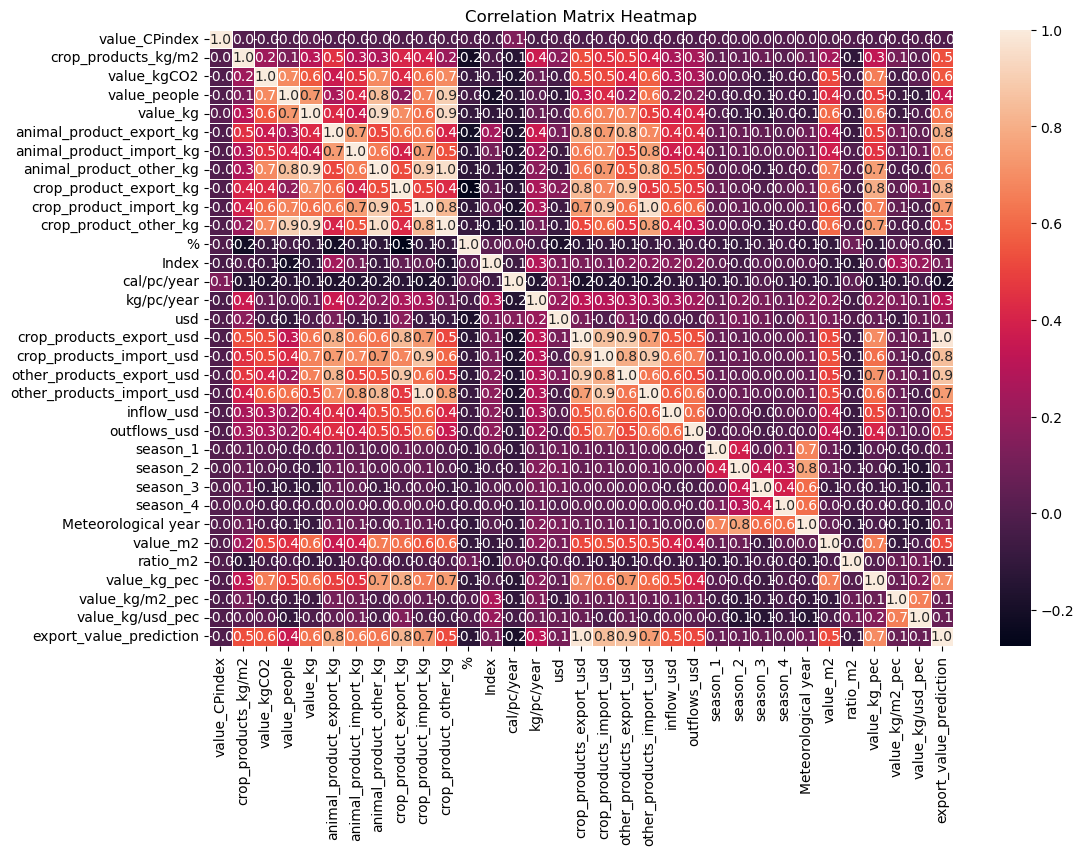

In [81]:
#correlation matrix
correlation_matrix=pivot_table.iloc[:,2:].corr()

plt.figure(figsize=(12, 8))

#create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

According to the heatmap the lighter colours have higher correlation than others. However, it's hard to read the values like this.

In [82]:
target_column = 'export_value_prediction'

#correlation matrix
correlation_matrix = pivot_table.iloc[:,2:].corr()

#gets target correlation
target_correlation = correlation_matrix[target_column]

print("Correlation of each column's with",target_column)
print("------------------------------------------------------------")
print(target_correlation)

Correlation of each column's with export_value_prediction
------------------------------------------------------------
value_CPindex               -0.010332
crop_products_kg/m2          0.529086
value_kgCO2                  0.550751
value_people                 0.355724
value_kg                     0.622122
animal_product_export_kg     0.791600
animal_product_import_kg     0.647075
animal_product_other_kg      0.639557
crop_product_export_kg       0.817581
crop_product_import_kg       0.734716
crop_product_other_kg        0.518625
%                           -0.125729
Index                        0.114815
cal/pc/year                 -0.189400
kg/pc/year                   0.315943
usd                          0.117333
crop_products_export_usd     0.984833
crop_products_import_usd     0.847876
other_products_export_usd    0.867186
other_products_import_usd    0.745875
inflow_usd                   0.535531
outflows_usd                 0.509816
season_1                     0.073504
season_

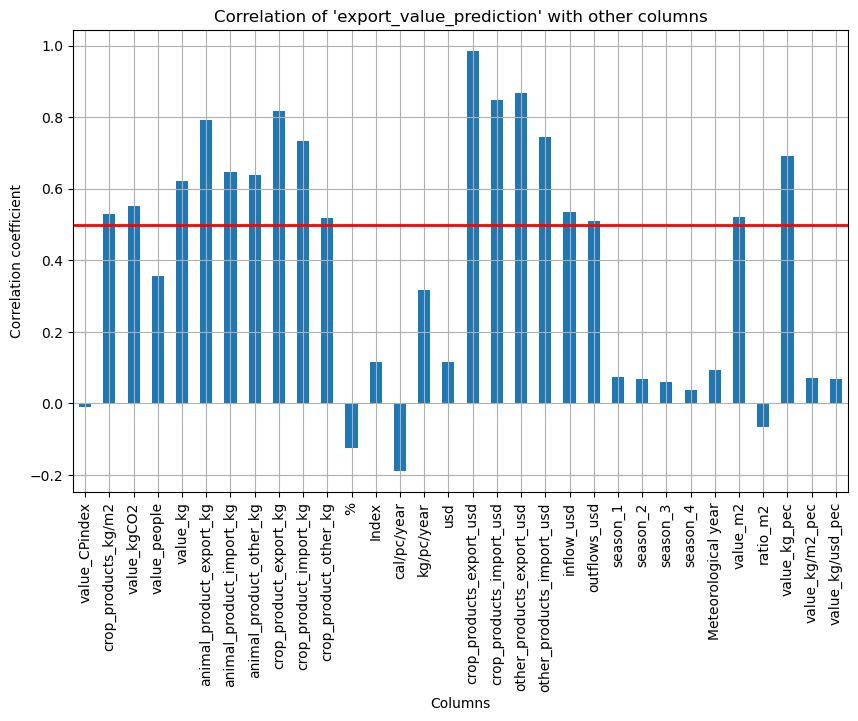

In [83]:
#plot of the correlations above
plt.figure(figsize=(10, 6))
target_correlation.drop(target_column).plot(kind='bar')

plt.title(f"Correlation of '{target_column}' with other columns")
plt.xlabel("Columns")
plt.ylabel("Correlation coefficient")

plt.axhline(y = 0.5, color = 'red', linewidth=2)

#adding grid to help reading the values
plt.grid(True)

plt.show()

According to the whole correlation figures, the most correlated columns are:

- animal_product_export_kg
- crop_product_export_kg       
- crop_product_import_kg   
- crop_products_import_usd     
- other_products_export_usd    
- other_products_import_usd
- value_kg_pec                 

If the threshold is accepted as 0.5 in terms of correlation values.

In [84]:
threshold_columns=target_correlation[target_correlation>0.5]
threshold_columns

crop_products_kg/m2          0.529086
value_kgCO2                  0.550751
value_kg                     0.622122
animal_product_export_kg     0.791600
animal_product_import_kg     0.647075
animal_product_other_kg      0.639557
crop_product_export_kg       0.817581
crop_product_import_kg       0.734716
crop_product_other_kg        0.518625
crop_products_export_usd     0.984833
crop_products_import_usd     0.847876
other_products_export_usd    0.867186
other_products_import_usd    0.745875
inflow_usd                   0.535531
outflows_usd                 0.509816
value_m2                     0.521981
value_kg_pec                 0.692036
export_value_prediction      1.000000
Name: export_value_prediction, dtype: float64

In [85]:
num_columns=len(threshold_columns)
print("There are",f"{num_columns}","columns remained")

There are 18 columns remained


In [86]:
list(dict(threshold_columns).keys())

['crop_products_kg/m2',
 'value_kgCO2',
 'value_kg',
 'animal_product_export_kg',
 'animal_product_import_kg',
 'animal_product_other_kg',
 'crop_product_export_kg',
 'crop_product_import_kg',
 'crop_product_other_kg',
 'crop_products_export_usd',
 'crop_products_import_usd',
 'other_products_export_usd',
 'other_products_import_usd',
 'inflow_usd',
 'outflows_usd',
 'value_m2',
 'value_kg_pec',
 'export_value_prediction']

In [87]:
#taking only higher correlated columns
pivot_table2=pivot_table[["Area"]+["Year"]+list(dict(threshold_columns).keys())]
pivot_table2

Area  Year  crop_products_kg/m2   value_kgCO2     value_kg  \
0     Afghanistan  2010              6.73334  1.302812e+09   72084000.0   
1     Afghanistan  2011              6.83984  1.217192e+09  107228000.0   
2     Afghanistan  2012              6.65926  1.329958e+09          NaN   
3     Afghanistan  2013              7.16387  1.342162e+09          NaN   
4     Afghanistan  2014              6.76465  1.418266e+09          NaN   
...           ...   ...                  ...           ...          ...   
1945       Tuvalu  2015              1.64928  0.000000e+00          NaN   
1946       Tuvalu  2016              1.64515  0.000000e+00          NaN   
1947       Tuvalu  2017              1.64050  0.000000e+00          NaN   
1948       Tuvalu  2018              1.63849  0.000000e+00          NaN   
1949       Tuvalu  2019              1.64445  0.000000e+00          NaN   

      animal_product_export_kg  animal_product_import_kg  \
0                          0.0              1.860100e+08   
1                          0.0              1.760000e+08   
2                          0.0              2.750000e+08   
3                          0.0              3.280000e+08   
4                          0.0              1.425000e+09   
...                        ...                       ...   
1945                       NaN                       NaN   
1946                       NaN                       NaN   
1947                       NaN                       NaN   
1948                       NaN                       NaN   
1949                       NaN                       NaN   

      animal_product_other_kg  crop_product_export_kg  crop_product_import_kg  \
0                1.652260e+09             360000000.0            2.931000e+09   
1                1.682000e+09             277000000.0            3.571000e+09   
2                1.843780e+09             198000000.0            3.464000e+09   
3                1.830560e+09             281000000.0            3.617000e+09   
4                3.360360e+09             412000000.0            3.756000e+09   
...                       ...                     ...                     ...   
1945                      NaN                     NaN                     NaN   
1946                      NaN                     NaN                     NaN   
1947                      NaN                     NaN                     NaN   
1948                      NaN                     NaN                     NaN   
1949                      NaN                     NaN                     NaN   

      crop_product_other_kg  crop_products_export_usd  \
0              9.880000e+09               169932000.0   
1              9.820000e+09               148362000.0   
2              1.076700e+10               129926000.0   
3              1.123700e+10               189275000.0   
4              1.186800e+10               286736690.0   
...                     ...                       ...   
1945                    NaN                  188050.0   
1946                    NaN                       NaN   
1947                    NaN                   15090.0   
1948                    NaN                   31000.0   
1949                    NaN                    4240.0   

      crop_products_import_usd  other_products_export_usd  \
0                 9.519490e+08                107182000.0   
1                 1.216503e+09                101119000.0   
2                 1.065700e+09                 81693000.0   
3                 1.119694e+09                100862000.0   
4                 2.478995e+09                159917790.0   
...                        ...                        ...   
1945              3.387870e+06                        NaN   
1946              3.114550e+06                      150.0   
1947              2.776440e+06                      260.0   
1948              2.892110e+06                     4270.0   
1949              2.545760e+06                     1130.0   



In [88]:
total_column_number=len(pivot_table2.columns)-2

In [89]:
#finding which country has which NaN columns
nan_dict={}
for index in range(len(name)):
    n=name[index]
    nan_indexes=list(pivot_table2[pivot_table["Area"]==n].isnull().any(axis=0))
    for i,j in enumerate(nan_indexes):
        if j==True:
            nan_dict[n]=pivot_table2.columns[i]


In [90]:
nan_dict

{'Afghanistan': 'value_kg_pec',
 'Algeria': 'value_kg',
 'Angola': 'value_kg',
 'Antigua and Barbuda': 'value_kg',
 'Armenia': 'value_kg',
 'Australia': 'value_kg',
 'Austria': 'value_kg',
 'Azerbaijan': 'value_kg',
 'Bahamas': 'value_kg',
 'Bahrain': 'crop_product_other_kg',
 'Barbados': 'value_kg',
 'Belarus': 'value_kg',
 'Belgium': 'value_kg',
 'Belize': 'value_kg',
 'Benin': 'value_kg',
 'Bhutan': 'crop_product_other_kg',
 'Bolivia (Plurinational State of)': 'value_kg',
 'Bosnia and Herzegovina': 'value_kg',
 'Botswana': 'value_kg',
 'Brazil': 'value_kg',
 'Brunei Darussalam': 'crop_product_other_kg',
 'Bulgaria': 'value_kg',
 'Burkina Faso': 'value_kg',
 'Burundi': 'outflows_usd',
 'Cabo Verde': 'value_kg',
 'Cambodia': 'value_kg',
 'Cameroon': 'value_kg',
 'Central African Republic': 'value_kg',
 'Chad': 'value_kg',
 'Chile': 'value_kg',
 'China': 'outflows_usd',
 'China, Hong Kong SAR': 'value_kg',
 'China, Macao SAR': 'value_kg',
 'China, mainland': 'value_kg',
 'Colombia': 'v

In [91]:
name_1=list(nan_dict.keys())[0]
column_1=list(nan_dict.values())[0]

In [92]:
#to see dataframes wider
pd.set_option('display.max_columns', None)

In [93]:
check_null(pivot_table2)

Total number of null rows: 1181
The total percentage of null values in dataframe: 60.56%
Null-valued Columns:
--------------
Area                         False
Year                         False
crop_products_kg/m2           True
value_kgCO2                   True
value_kg                      True
animal_product_export_kg      True
animal_product_import_kg      True
animal_product_other_kg       True
crop_product_export_kg        True
crop_product_import_kg        True
crop_product_other_kg         True
crop_products_export_usd      True
crop_products_import_usd     False
other_products_export_usd     True
other_products_import_usd    False
inflow_usd                    True
outflows_usd                  True
value_m2                      True
value_kg_pec                  True
export_value_prediction       True
dtype: bool


Still, there are many NaN values

In [94]:
def interpolating(pivot_table,col_start_index,par="forward"):
    columns = list(pivot_table.columns[col_start_index:])
    areas = list(pivot_table.Area.unique())
    
    #calculating total number of instances for progress bar
    total_numbers = len(columns) * len(areas)
    with tqdm(total=total_numbers) as pbar:
        for area in areas:
            for column in columns:
                result = pivot_table[(pivot_table["Area"] == area)][["Year", column]]
                x_data = result.iloc[:, 0]
                y_data = result.iloc[:, 1]
                
                #finding NaN values
                nan_mask = y_data.isna()
                #the years that must be filled
                x_predictions = x_data[nan_mask]
                
                #condition to interpolating only NaN values
                if len(x_predictions) > 0:
                    x_predictions = x_predictions.tolist()
                    x_data = x_data[~nan_mask].tolist()
                    y_data = y_data[~nan_mask].tolist()
                    
                    #condition for data is not empty
                    if len(x_data) > 0 and len(y_data) > 0:
                        _, y_predictions = interpolation(x_data, y_data, x_predictions, par=par)
                        
                        for year, value in zip(x_predictions, y_predictions):
                            pivot_table.loc[(pivot_table['Area'] == area) & (pivot_table['Year'] == year), column] = value
                pbar.update(1)
    return pivot_table

In [95]:
pivot_table2=interpolating(pivot_table2,col_start_index=2,par="forward")

100%|█████████████████████████████████████████████████████████████████████████████| 3510/3510 [00:03<00:00, 946.65it/s]


In [96]:
pivot_table2=interpolating(pivot_table2,col_start_index=2,par="backward")

100%|████████████████████████████████████████████████████████████████████████████| 3510/3510 [00:03<00:00, 1078.84it/s]


In [97]:
check_null(pivot_table2)

Total number of null rows: 545
The total percentage of null values in dataframe: 27.95%
Null-valued Columns:
--------------
Area                         False
Year                         False
crop_products_kg/m2           True
value_kgCO2                  False
value_kg                      True
animal_product_export_kg      True
animal_product_import_kg      True
animal_product_other_kg       True
crop_product_export_kg        True
crop_product_import_kg        True
crop_product_other_kg         True
crop_products_export_usd     False
crop_products_import_usd     False
other_products_export_usd    False
other_products_import_usd    False
inflow_usd                    True
outflows_usd                  True
value_m2                     False
value_kg_pec                  True
export_value_prediction      False
dtype: bool


In [98]:
#group by 'Area' and count NaNs
nan_counts = pivot_table2.groupby('Area').apply(lambda x: x.isnull().sum(axis=0))

# Filter areas with at least one NaN value
areas_with_nan = nan_counts[nan_counts.gt(0).any(axis=1)]
nan_countries=areas_with_nan.gt(0).sum(axis=1)
number=list(nan_countries)
name=list(nan_countries.index)

print("The countries have NaN values:")
print("------------------------------")
for i,j in zip(name,number):
    print(i,":",j)

The countries have NaN values:
------------------------------
Afghanistan : 1
Bahamas : 1
Bahrain : 6
Belgium : 1
Bhutan : 6
Brunei Darussalam : 6
Cabo Verde : 1
Central African Republic : 1
Chad : 1
China : 3
China, Macao SAR : 1
China, mainland : 1
Comoros : 1
Cook Islands : 8
Cuba : 2
Democratic People's Republic of Korea : 1
Djibouti : 1
Dominica : 1
Equatorial Guinea : 7
Eritrea : 6
Eswatini : 1
Faroe Islands : 8
Germany : 1
Grenada : 1
Guinea-Bissau : 1
Haiti : 1
Kazakhstan : 1
Kiribati : 1
Lao People's Democratic Republic : 1
Liberia : 1
Malaysia : 1
Mali : 1
Mauritania : 1
Nauru : 8
Niue : 9
Palestine : 7
Qatar : 6
Russian Federation : 1
Saint Vincent and the Grenadines : 1
Sao Tome and Principe : 1
Sierra Leone : 1
Singapore : 7
Solomon Islands : 1
Somalia : 7
Spain : 1
Sudan : 1
Syrian Arab Republic : 1
Timor-Leste : 1
Tonga : 6
Turkmenistan : 1
Tuvalu : 7
United Arab Emirates : 1
United Kingdom of Great Britain and Northern Ireland : 1
Uzbekistan : 2
Vanuatu : 1


Even though I perform interpolation both forward and backward, the number of null records don't change.

In [99]:
pivot_table2.groupby('Area').apply(lambda x: x.isnull().sum(axis=0))

Area  Year  crop_products_kg/m2  \
Area                                                                  
Afghanistan                            0     0                    0   
Albania                                0     0                    0   
Algeria                                0     0                    0   
Angola                                 0     0                    0   
Antigua and Barbuda                    0     0                    0   
...                                  ...   ...                  ...   
Venezuela (Bolivarian Republic of)     0     0                    0   
Viet Nam                               0     0                    0   
Yemen                                  0     0                    0   
Zambia                                 0     0                    0   
Zimbabwe                               0     0                    0   

                                    value_kgCO2  value_kg  \
Area                                                        
Afghanistan                                   0         0   
Albania                                       0         0   
Algeria                                       0         0   
Angola                                        0         0   
Antigua and Barbuda                           0         0   
...                                         ...       ...   
Venezuela (Bolivarian Republic of)            0         0   
Viet Nam                                      0         0   
Yemen                                         0         0   
Zambia                                        0         0   
Zimbabwe                                      0         0   

                                    animal_product_export_kg  \
Area                                                           
Afghanistan                                                0   
Albania                                                    0   
Algeria                                                    0   
Angola                                                     0   
Antigua and Barbuda                                        0   
...                                                      ...   
Venezuela (Bolivarian Republic of)                         0   
Viet Nam                                                   0   
Yemen                                                      0   
Zambia                                                     0   
Zimbabwe                                                   0   

                                    animal_product_import_kg  \
Area                                                           
Afghanistan                                                0   
Albania                                                    0   
Algeria                                                    0   
Angola                                                     0   
Antigua and Barbuda                                        0   
...                                                      ...   
Venezuela (Bolivarian Republic of)                         0   
Viet Nam                                                   0   
Yemen                                                      0   
Zambia                                                     0   
Zimbabwe                                                   0   

                                    animal_product_other_kg  \
Area                                                          
Afghanistan                                               0   
Albania                                                   0   
Algeria                                                   0   
Angola                                                    0   
Antigua and Barbuda                                       0   
...                                                     ...   
Venezuela (Bolivarian Republic of)                        0   
Viet Nam                                                  0   
Yemen                 

In [100]:
#the number of null value for each column
pivot_table2.isnull().sum()

Area                           0
Year                           0
crop_products_kg/m2           10
value_kgCO2                    0
value_kg                     388
animal_product_export_kg     146
animal_product_import_kg     146
animal_product_other_kg      146
crop_product_export_kg       146
crop_product_import_kg       146
crop_product_other_kg        146
crop_products_export_usd       0
crop_products_import_usd       0
other_products_export_usd      0
other_products_import_usd      0
inflow_usd                    60
outflows_usd                  60
value_m2                       0
value_kg_pec                  60
export_value_prediction        0
dtype: int64

There will be different approaches for final dataframe:

- Dropping the most-null-contained column (df_last3)
- Excluding all null columns (df_last1)
- Filling nulls with each column's mean value (df_last2)

In [131]:
pivot_table2.isnull().sum()

Area                           0
Year                           0
crop_products_kg/m2           10
value_kgCO2                    0
value_kg                     388
animal_product_export_kg     146
animal_product_import_kg     146
animal_product_other_kg      146
crop_product_export_kg       146
crop_product_import_kg       146
crop_product_other_kg        146
crop_products_export_usd       0
crop_products_import_usd       0
other_products_export_usd      0
other_products_import_usd      0
inflow_usd                    60
outflows_usd                  60
value_m2                       0
value_kg_pec                  60
export_value_prediction        0
dtype: int64

## 1) Dropping the column which has the most null values (value_kg)

In [227]:
pivot_table3=pivot_table2.copy(deep=True)
pivot_table3=pivot_table3.drop(columns=["value_kg"])
pivot_table3

Area  Year  crop_products_kg/m2   value_kgCO2  \
0     Afghanistan  2010              6.73334  1.302812e+09   
1     Afghanistan  2011              6.83984  1.217192e+09   
2     Afghanistan  2012              6.65926  1.329958e+09   
3     Afghanistan  2013              7.16387  1.342162e+09   
4     Afghanistan  2014              6.76465  1.418266e+09   
...           ...   ...                  ...           ...   
1945       Tuvalu  2015              1.64928  0.000000e+00   
1946       Tuvalu  2016              1.64515  0.000000e+00   
1947       Tuvalu  2017              1.64050  0.000000e+00   
1948       Tuvalu  2018              1.63849  0.000000e+00   
1949       Tuvalu  2019              1.64445  0.000000e+00   

      animal_product_export_kg  animal_product_import_kg  \
0                          0.0              1.860100e+08   
1                          0.0              1.760000e+08   
2                          0.0              2.750000e+08   
3                          0.0              3.280000e+08   
4                          0.0              1.425000e+09   
...                        ...                       ...   
1945                       NaN                       NaN   
1946                       NaN                       NaN   
1947                       NaN                       NaN   
1948                       NaN                       NaN   
1949                       NaN                       NaN   

      animal_product_other_kg  crop_product_export_kg  crop_product_import_kg  \
0                1.652260e+09             360000000.0            2.931000e+09   
1                1.682000e+09             277000000.0            3.571000e+09   
2                1.843780e+09             198000000.0            3.464000e+09   
3                1.830560e+09             281000000.0            3.617000e+09   
4                3.360360e+09             412000000.0            3.756000e+09   
...                       ...                     ...                     ...   
1945                      NaN                     NaN                     NaN   
1946                      NaN                     NaN                     NaN   
1947                      NaN                     NaN                     NaN   
1948                      NaN                     NaN                     NaN   
1949                      NaN                     NaN                     NaN   

      crop_product_other_kg  crop_products_export_usd  \
0              9.880000e+09               169932000.0   
1              9.820000e+09               148362000.0   
2              1.076700e+10               129926000.0   
3              1.123700e+10               189275000.0   
4              1.186800e+10               286736690.0   
...                     ...                       ...   
1945                    NaN                  188050.0   
1946                    NaN                 1312290.0   
1947                    NaN                   15090.0   
1948                    NaN                   31000.0   
1949                    NaN                    4240.0   

      crop_products_import_usd  other_products_export_usd  \
0                 9.519490e+08                107182000.0   
1                 1.216503e+09                101119000.0   
2                 1.065700e+09                 81693000.0   
3                 1.119694e+09                100862000.0   
4                 2.478995e+09                159917790.0   
...                        ...                        ...   
1945              3.387870e+06                        0.0   
1946              3.114550e+06                      150.0   
1947              2.776440e+06                      260.0   
1948              2.892110e+06                     4270.0   
1949              2.545760e+06                     1130.0   

      other_products_import_usd  inflow_usd  outflows_usd      value_m2  \
0                   327575000.0  54200551.0     -715034.0  6.528600e+11   
1     

In [228]:
#group by 'Area' and count NaNs
nan_counts = pivot_table3.groupby('Area').apply(lambda x: x.isnull().sum(axis=0))

# Filter areas with at least one NaN value
areas_with_nan = nan_counts[nan_counts.gt(0).any(axis=1)]
nan_countries=areas_with_nan.gt(0).sum(axis=1)
number=list(nan_countries)
name=list(nan_countries.index)

red_countries=[]
print("The countries have NaN values:")
print("------------------------------")
for i,j in zip(name,number):
    print(i,":",j)
    red_countries.append(i)

The countries have NaN values:
------------------------------
Afghanistan : 1
Bahrain : 6
Bhutan : 6
Brunei Darussalam : 6
China : 2
China, Macao SAR : 1
Cook Islands : 8
Cuba : 2
Democratic People's Republic of Korea : 1
Dominica : 1
Equatorial Guinea : 6
Eritrea : 6
Faroe Islands : 8
Nauru : 8
Niue : 8
Palestine : 6
Qatar : 6
Singapore : 7
Somalia : 6
Tonga : 6
Tuvalu : 6
United Arab Emirates : 1
Uzbekistan : 1


There are less number of countries, these values can be excluded from here.

In [229]:
for area in red_countries:
    pivot_table3=pivot_table3[pivot_table3["Area"]!=area]

In [230]:
check_null(pivot_table3)

There is no null value in dataframe


In [231]:
df_last=pivot_table3.copy(deep=True)

In [233]:
#distribution of each feature by histograms
def plot_column_distributions(df):
    num_columns = df.select_dtypes(include=[np.number]).columns
    num_plots = len(num_columns)
    num_rows = (num_plots // 3) + (num_plots % 3 > 0)
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axes = axes.flatten()
    
    for ax, col in zip(axes, num_columns):
        ax.hist(df[col], bins=10, edgecolor='black',alpha=0.85)
        ax.set_title(col)
        ax.set_ylabel('Frequency')
    
   
    
    plt.tight_layout()
    plt.show()

In [234]:
df_last.to_csv("df_last.csv",index=False)

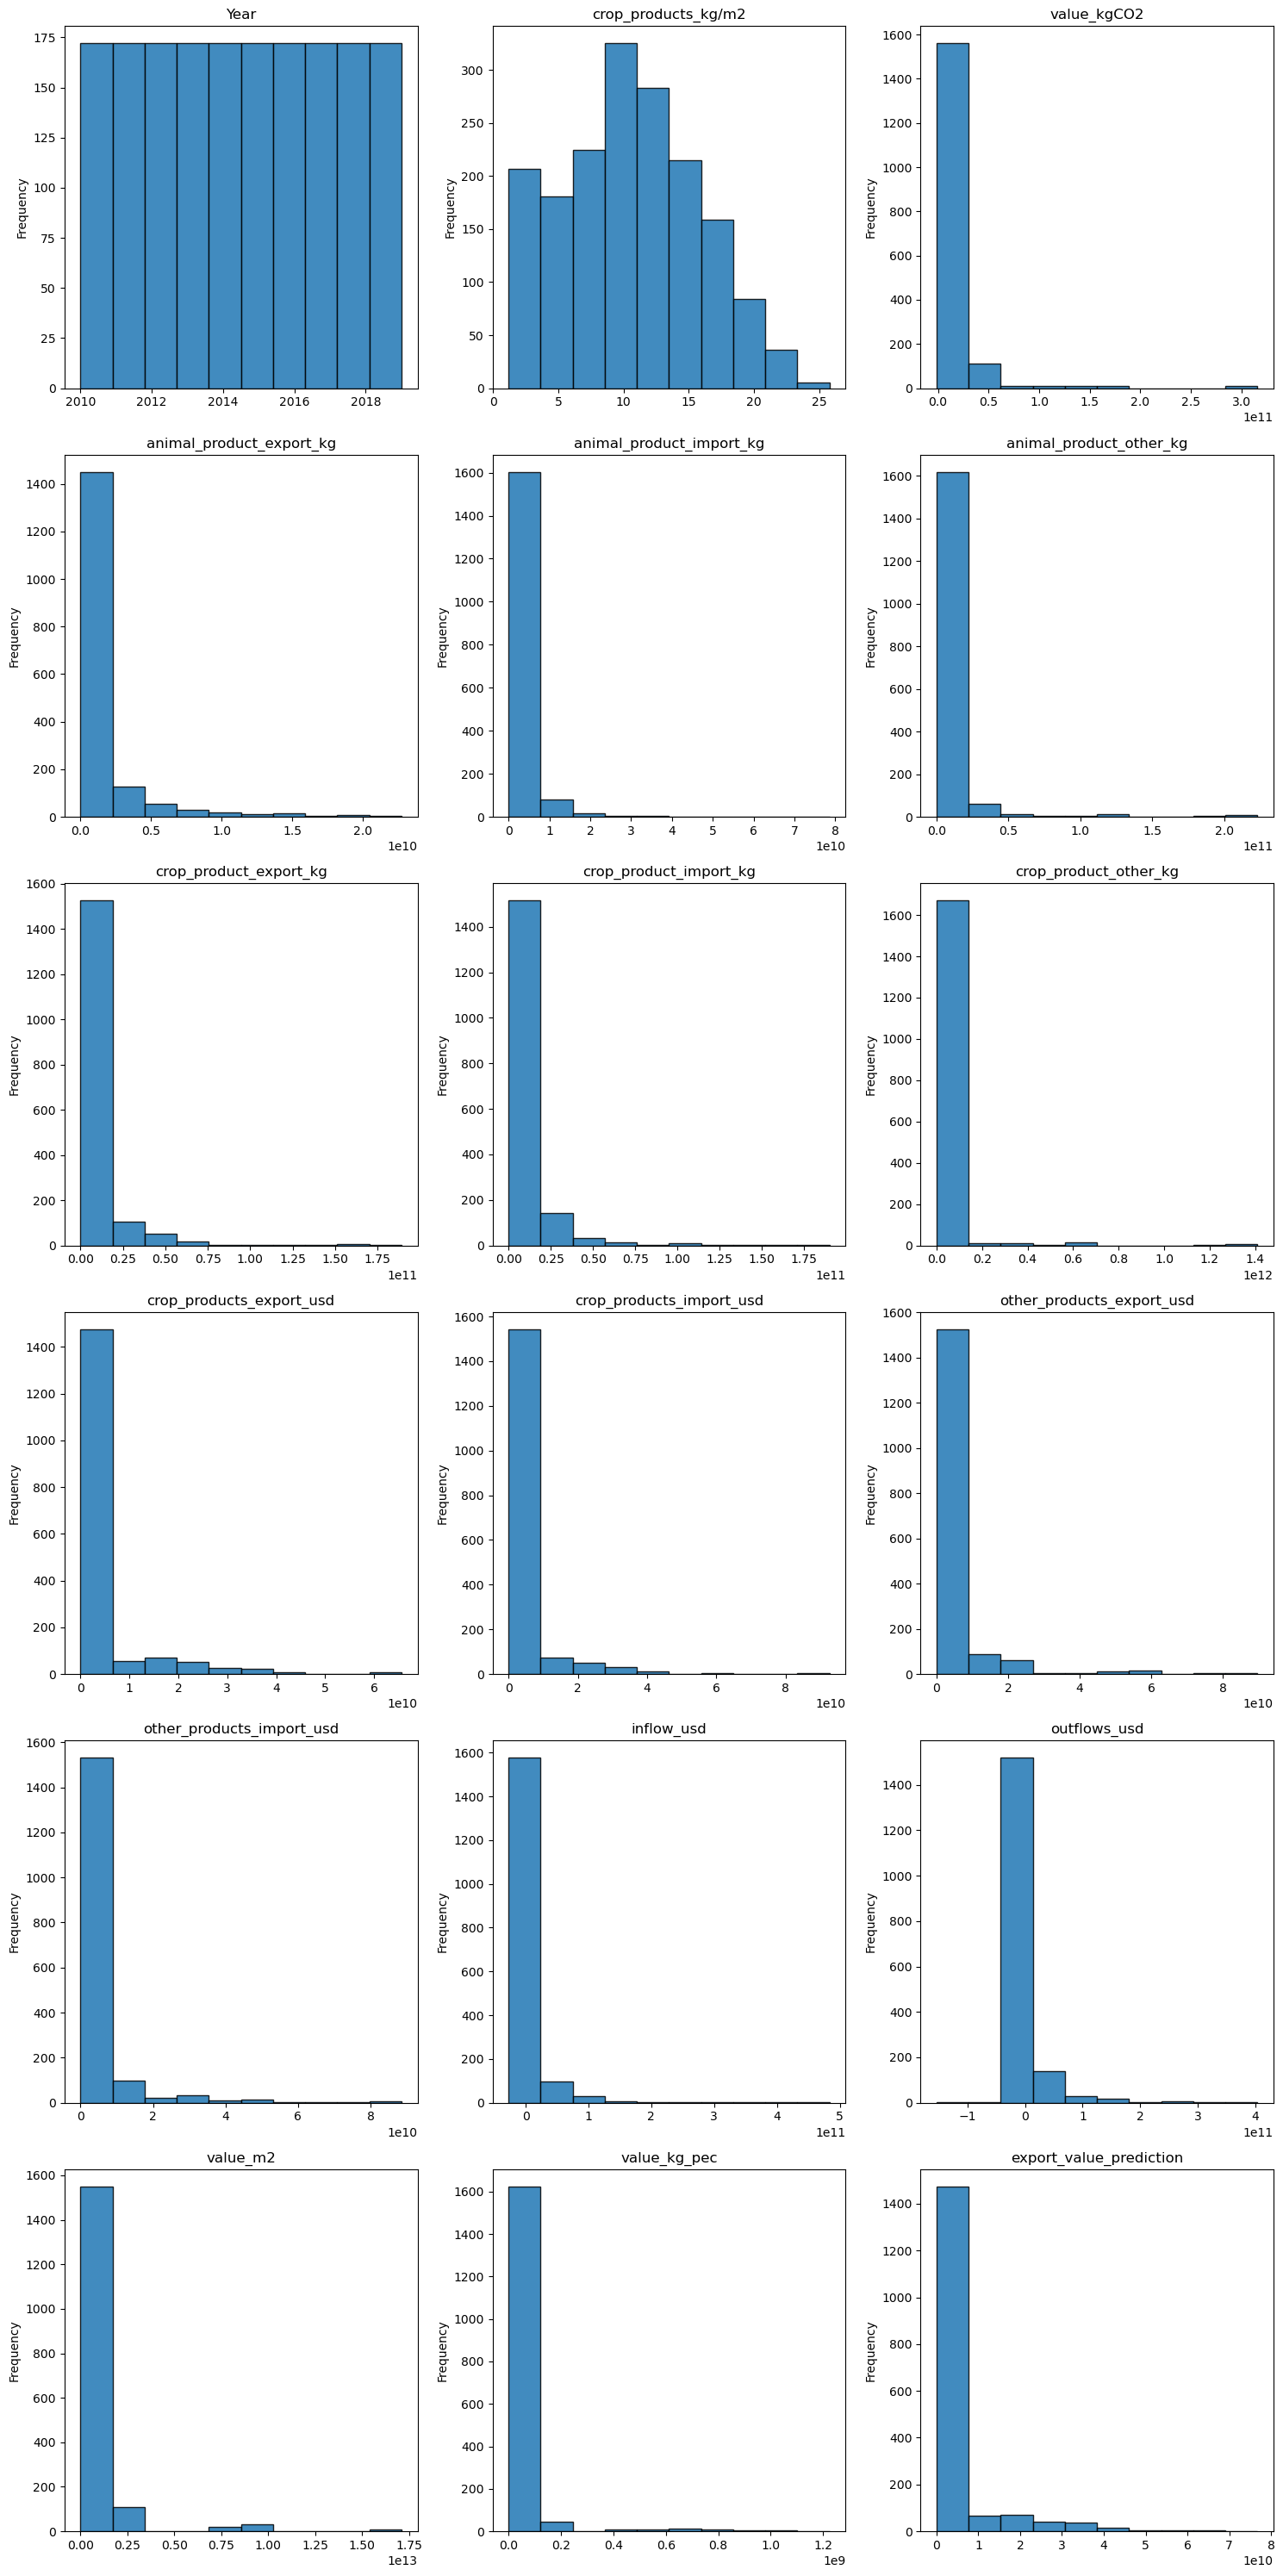

In [235]:
plot_column_distributions(df_last)

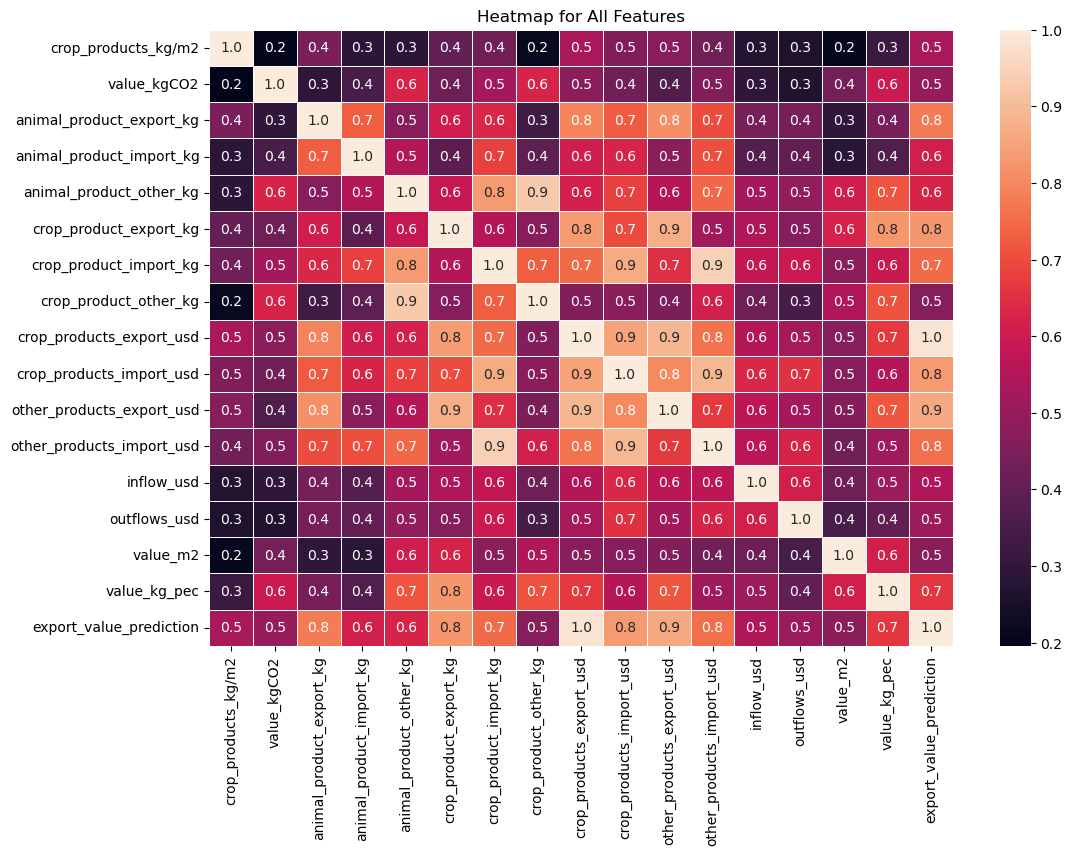

In [237]:
#correlation matrix
correlation_matrix=df_last.iloc[:,2:].corr()

plt.figure(figsize=(12, 8))

#create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidths=0.5)

plt.title('Heatmap for All Features')
plt.show()

# Model

## Data Preparation for the Model

In [3]:
df=pd.read_csv("df_last.csv")
df.head()

Area  Year  crop_products_kg/m2  value_kgCO2  animal_product_export_kg  \
0  Albania  2010             11.30203  183998800.0                10410000.0   
1  Albania  2011             11.94746  185096200.0                 9010000.0   
2  Albania  2012             12.38879  184440300.0                11960000.0   
3  Albania  2013             11.81126  183647400.0                 9910000.0   
4  Albania  2014             12.45786  183508800.0                10400000.0   

   animal_product_import_kg  animal_product_other_kg  crop_product_export_kg  \
0               115070000.0             1.126030e+09              42000000.0   
1               124760000.0             1.159740e+09              56000000.0   
2               118880000.0             1.130750e+09              73000000.0   
3               119270000.0             1.162670e+09              89000000.0   
4                89570000.0             1.139370e+09              92000000.0   

   crop_product_import_kg  crop_product_other_kg  crop_products_export_usd  \
0             976000000.0           2.671000e+09                19530000.0   
1             985000000.0           2.746000e+09                30189000.0   
2             948000000.0           2.739000e+09                36776000.0   
3             986000000.0           2.725000e+09                53114000.0   
4             881000000.0           2.507000e+09                39984290.0   

   crop_products_import_usd  other_products_export_usd  \
0               569642000.0                 40917000.0   
1               622014000.0                 55263000.0   
2               583266000.0                 57322000.0   
3               589121000.0                 59047000.0   
4               389495760.0                 27910480.0   

   other_products_import_usd    inflow_usd  outflows_usd      value_m2  \
0                336507000.0  1.050102e+09     6381076.0  2.875000e+10   
1                333366000.0  8.763517e+08    29776675.0  2.875000e+10   
2                327391000.0  8.554351e+08    23034997.0  2.875000e+10   
3                340368000.0  1.254798e+09    39816721.0  2.875000e+10   
4                191702610.0  1.151223e+09    33358575.0  2.875000e+10   

   value_kg_pec  export_value_prediction  
0     1173250.0               53114000.0  
1     1156240.0               39984290.0  
2      712390.0               62463870.0  
3      889810.0               99523520.0  
4      904170.0               80624530.0

In [4]:
dataframe=df.copy(deep=True)

In [86]:
from sklearn.model_selection import train_test_split #splitting data
from sklearn.preprocessing import StandardScaler, LabelEncoder # feature preparation
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.metrics import mean_squared_error,mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

In [6]:
def data_encoding(dataframe,categorical_variable,target_column,label_encoder):
    #encoding the 'Area' column if it is to be used as a feature
    label_encoder = label_encoder
    dataframe['categorical_encoded'] = label_encoder.fit_transform(dataframe[categorical_variable])
    
    #feature specification
    features = dataframe.drop(columns=[target_column, categorical_variable])
    target = dataframe[[target_column]]
    return features, target

In [7]:
def data_prepare_for_model(X_train,X_test,y_train,y_test, scaler):
  
    #scaling the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #scaling the target
    y_train_scaled = scaler.fit_transform(y_train)
    y_test_scaled = scaler.transform(y_test)
    
    return X_train_scaled,X_test_scaled, y_train_scaled,y_test_scaled

In [8]:
def MLP_model(X_train_scaled,activation):
    #MLP Model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1)) 
    return model

In [9]:
def area_decoder(dataframe,categorical_variable,label_encoder):
    labels=list(set(label_encoder.fit_transform(dataframe[categorical_variable])))
    areas=list(df.Area.unique())
    area_labels={}
    for area_name,label in zip(areas,labels):
        area_labels[label]=area_name
    return area_labels

In [10]:
def evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder):
    #model evaluation
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler.inverse_transform(y_pred_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    #print mean squared error
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    
    
    area_labels=area_decoder(dataframe,categorical_variable,label_encoder)
    area_decoded=list(X_test.categorical_encoded.apply(lambda x: area_labels[x]))
    #area_decoded=area_decoder(dataframe,categorical_variable,label_encoder)
    
    
    #saving predictions into the csv file named predictions
    output_df = pd.DataFrame({
        'data_instance_id': X_test.index,
        'area_name':area_decoded,
        'true_label': y_test[target_column].values.flatten(),
        'prediction': y_pred.flatten()})
    output_df.to_csv("predictions.csv",index=False)
    return output_df,mse,rmse,mae

In [11]:
categorical_variable='Area'
target_column = 'export_value_prediction'
label_encoder=LabelEncoder()
features, target=data_encoding(dataframe,categorical_variable,target_column,label_encoder)

In [12]:
#dataset split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=45)

scaler = StandardScaler()
X_train_scaled,X_test_scaled, y_train_scaled,y_test_scaled=data_prepare_for_model(X_train,X_test,y_train,y_test, scaler)

In [113]:
print("The Number of Instances in Train & Test:")
print("-----------------------------------------")

print("Train:  x:{}  y:{}".format(len(X_train),len(y_train)))
print("Test:   x:{}  y:{}".format(len(X_test),len(y_test)))

The Number of Instances in Train & Test:
-----------------------------------------
Train:  x:1376  y:1376
Test:   x:344  y:344


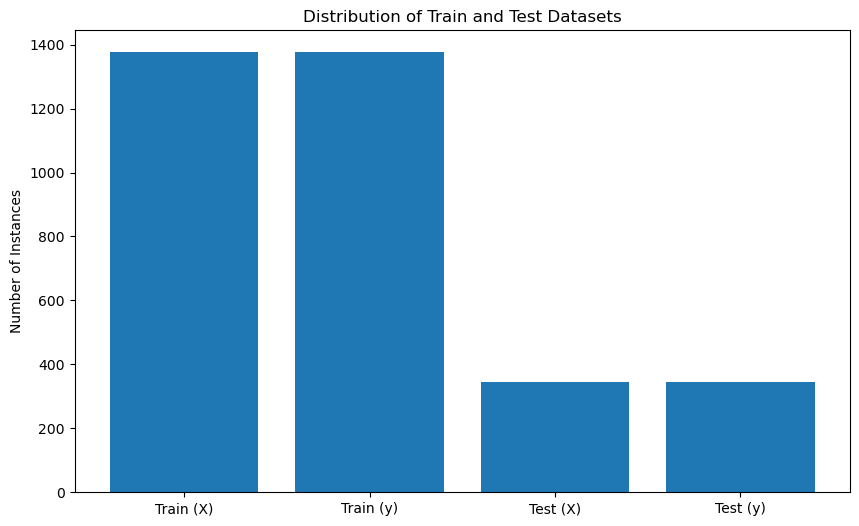

In [112]:
train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(10, 6))
plt.bar(['Train (X)', 'Train (y)', 'Test (X)', 'Test (y)'], [train_size, train_size, test_size, test_size])
plt.title('Distribution of Train and Test Datasets')
plt.ylabel('Number of Instances')
plt.show()


In [13]:
activation='relu'

model=MLP_model(X_train_scaled,activation)

In [14]:
#work the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

#train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_split=0.2, batch_size=32, verbose=2)

Epoch 1/100
35/35 - 1s - 27ms/step - loss: 0.2758 - val_loss: 0.1823
Epoch 2/100
35/35 - 0s - 3ms/step - loss: 0.0969 - val_loss: 0.0884
Epoch 3/100
35/35 - 0s - 3ms/step - loss: 0.0638 - val_loss: 0.0607
Epoch 4/100
35/35 - 0s - 2ms/step - loss: 0.0424 - val_loss: 0.0486
Epoch 5/100
35/35 - 0s - 3ms/step - loss: 0.0403 - val_loss: 0.0428
Epoch 6/100
35/35 - 0s - 2ms/step - loss: 0.0334 - val_loss: 0.0417
Epoch 7/100
35/35 - 0s - 3ms/step - loss: 0.0293 - val_loss: 0.0360
Epoch 8/100
35/35 - 0s - 3ms/step - loss: 0.0246 - val_loss: 0.0364
Epoch 9/100
35/35 - 0s - 2ms/step - loss: 0.0237 - val_loss: 0.0356
Epoch 10/100
35/35 - 0s - 2ms/step - loss: 0.0207 - val_loss: 0.0346
Epoch 11/100
35/35 - 0s - 2ms/step - loss: 0.0214 - val_loss: 0.0338
Epoch 12/100
35/35 - 0s - 2ms/step - loss: 0.0191 - val_loss: 0.0373
Epoch 13/100
35/35 - 0s - 2ms/step - loss: 0.0231 - val_loss: 0.0359
Epoch 14/100
35/35 - 0s - 2ms/step - loss: 0.0201 - val_loss: 0.0338
Epoch 15/100
35/35 - 0s - 2ms/step - loss:

In [15]:
output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 1.7263661445643807e+18
Root Mean Squared Error: 1313912533.0722668
Mean Absolute Error: 597358726.2049419


In [16]:
output_df

data_instance_id         area_name    true_label    prediction
0                 514             Gabon  3.800228e+10  3.916596e+10
1                 970        Montenegro  3.763460e+08  2.601169e+08
2                 229           Burundi  3.157371e+07 -1.156591e+08
3                 947         Mauritius  2.928276e+07  3.658414e+07
4                 931        Mauritania  2.500000e+03 -1.858988e+08
..                ...               ...           ...           ...
339                48         Argentina  2.279203e+10  1.739582e+10
340               978        Montenegro  2.026133e+08  2.438809e+08
341              1149  Papua New Guinea  5.826127e+08  1.350167e+09
342              1348      Sierra Leone  8.003618e+08  6.010462e+08
343               700             Italy  5.615000e+07  4.671856e+08

[344 rows x 4 columns]

In [17]:
y_actual=output_df["true_label"].values
y_prediction=output_df["prediction"].values

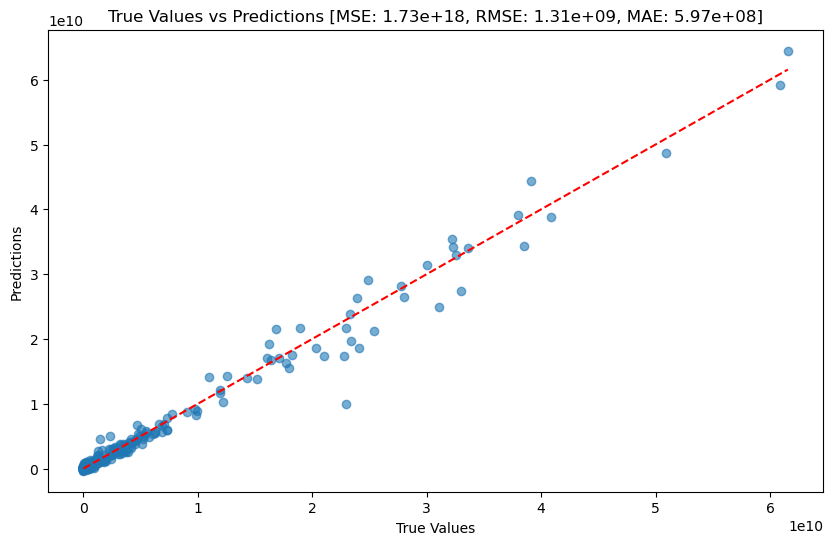

In [18]:
# Plot Predictions vs True Values
plt.figure(figsize=(10, 6))
plt.scatter(y_actual, y_prediction, alpha=0.6)
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions [MSE: {:,.2e}, RMSE: {:,.2e}, MAE: {:,.2e}]'.format(mse,rmse,mae))
plt.show()

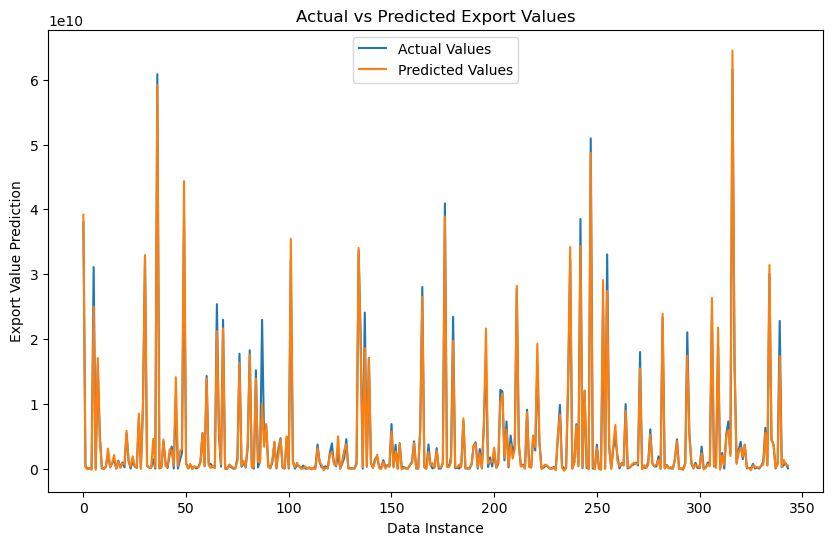

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual Values')
plt.plot(y_prediction, label='Predicted Values')
plt.xlabel('Data Instance')
plt.ylabel('Export Value Prediction')
plt.title('Actual vs Predicted Export Values')
plt.legend()
plt.show()

# Improving Model

## 1.Changing Learning Rate

The learning rate determines how quickly or slowly a model updates its weights during training.
- small learning rate: longer time to the point supposed to reach, many epoch is required.
- bigger learing rate: preventing to reach the optimal point, the model is never stabilized.

In [20]:
def model(X_train_scaled,activation):
    #MLP Model
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='linear')) 
    return model

activation='relu'

model=model(X_train_scaled,activation)

best_parameters={}
best_mae=1e99
for learning_rate in [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]:
    #work the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    
    #train the model
    history = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_split=0.2, batch_size=32, verbose=0)
    
    output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)

    if mae<best_mae:
        best_mae=mae
        best_parameters={"learning_rate": learning_rate,
                         "mse":mse,
                         "rmse":rmse,
                         "mae":mae}
        
print()
print("The best parameters:")
print("----------------------")
print(best_parameters)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 8.681646843511182e+19
Root Mean Squared Error: 9317535534.416374
Mean Absolute Error: 7443201020.616279
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 1.0631752048768592e+19
Root Mean Squared Error: 3260636755.1091294
Mean Absolute Error: 1794892149.988372
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Squared Error: 1.9091352017323804e+18
Root Mean Squared Error: 1381714587.6527398
Mean Absolute Error: 685449792.9694995
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 2.2731811298428503e+18
Root Mean Squared Error: 1507707242.7506776
Mean Absolute Error: 643606556.9491279
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 1.7424827945306327e+18
Root Mean Squared Error: 1320031361.1920865
Mean Absolute Error: 603519629.1264535
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 8.704659120674398e+19
Root Mean Squared Error: 9329876269.637447
Mean Absolute Error: 5868100186.988372

The best

## 2.Changing Epochs

Epoch indicates how many times the training dataset is processed.

- small epochs: it causes underfitting, the model doesn't learn
- bigger epochs: it causes overfitting, the model learns much on training data, while it performs poor on new dataset


In [21]:
def model(X_train_scaled,activation):
    #MLP Model
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='linear')) 
    return model

activation='relu'

model=model(X_train_scaled,activation)

best_parameters={}
best_mae=1e99
for epoch in [10,25,50,100,200,250,500,1000]:
    #work the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    #train the model
    history = model.fit(X_train_scaled, y_train_scaled, epochs=epoch, validation_split=0.2, batch_size=32, verbose=0)
    
    output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)

    if mae<best_mae:
        best_mae=mae
        best_parameters={"epoch": epoch,
                         "mse":mse,
                         "rmse":rmse,
                         "mae":mae}
        
print()
print("The best parameters:")
print("----------------------")
print(best_parameters)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 3.4225854102813875e+18
Root Mean Squared Error: 1850023083.715819
Mean Absolute Error: 895656366.1744186
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 1.8037577575392558e+18
Root Mean Squared Error: 1343040489.9105818
Mean Absolute Error: 650525546.3953488
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 2.4045196977664143e+18
Root Mean Squared Error: 1550651378.5394878
Mean Absolute Error: 699835367.9156977
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 2.022545871380111e+18
Root Mean Squared Error: 1422162392.7597408
Mean Absolute Error: 582437626.1715117
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 2.1716416265800548e+18
Root Mean Squared Error: 1473649085.2913575
Mean Absolute Error: 605298021.7732558
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 1.8560450696482424e+18
Root Mean Squared Error: 1362367450.3041544
Mean Absolute Error: 646839688.7819767
11/11 

## 3.Changing Batch Size

It determines the number of samples

- smaller batch size: More updates per epoch, better generalization but it takes much time.
- bigger batch size: Less updates per epoch, takes less time, but expensive in terms of memory. Also, it might overfit.

In [22]:
def model(X_train_scaled,activation):
    #MLP Model
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='linear')) 
    return model

activation='relu'

model=model(X_train_scaled,activation)

best_parameters={}
best_mae=1e99
for batch_size in [4,8,16,32,64,128,256]:
    #work the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    #train the model
    history = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_split=0.2, batch_size=batch_size, verbose=0)
    
    output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)

    if mae<best_mae:
        best_mae=mae
        best_parameters={"batch_size": batch_size,
                         "mse":mse,
                         "rmse":rmse,
                         "mae":mae}
        
print()
print("The best parameters:")
print("----------------------")
print(best_parameters)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 1.816986998584404e+18
Root Mean Squared Error: 1347956601.1502018
Mean Absolute Error: 591182865.4360465
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 1.7270434634956178e+18
Root Mean Squared Error: 1314170256.6622095
Mean Absolute Error: 577943813.3502907
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 1.7418385844041147e+18
Root Mean Squared Error: 1319787325.4445636
Mean Absolute Error: 553508227.1700581
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 2.0296054591210995e+18
Root Mean Squared Error: 1424642221.4440718
Mean Absolute Error: 585675651.0436046
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 1.836714682585699e+18
Root Mean Squared Error: 1355254471.523964
Mean Absolute Error: 556348930.5421512
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 1.8831048192091054e+18
Root Mean Squared Error: 1372262664.0731378
Mean Absolute Error: 566226146.6962209
11/11 ━

## 4.Changing Activation Function

In [23]:
def model_act_func(X_train_scaled,activation):
    #MLP Model
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='linear')) 
    return model


best_parameters={}
best_mae=1e99

for activation in ['relu', 'sigmoid', 'tanh']:
    
    model=model_act_func(X_train_scaled,activation)
    
   

    #work the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    #train the model
    history = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_split=0.2, batch_size=32, verbose=0)
    
    output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)
    
    if mae<best_mae:
        best_mae=mae
        best_parameters={"activation": activation,
                         "mse":mse,
                         "rmse":rmse,
                         "mae":mae}
            
print()
print("The best parameters:")
print("----------------------")
print(best_parameters)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 1.9404232478363484e+18
Root Mean Squared Error: 1392990756.5509357
Mean Absolute Error: 632626859.306686
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 1.7887099483843896e+18
Root Mean Squared Error: 1337426614.2052019
Mean Absolute Error: 716373494.9345931
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 1.5094698624275633e+18
Root Mean Squared Error: 1228604843.88902
Mean Absolute Error: 637833439.7572675

The best parameters:
----------------------
{'activation': 'relu', 'mse': 1.9404232478363484e+18, 'rmse': 1392990756.5509357, 'mae': 632626859.306686}


## 5.Changing Optimizer

In [27]:
def model_optimizer(X_train_scaled,activation):
    #MLP Model
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='linear')) 
    return model

print("Adam Optimizer:")
print("------------------")
activation='relu'
model=model_optimizer(X_train_scaled,activation)

#work the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

#train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_split=0.2, batch_size=32, verbose=0)

output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)




print("SGD Optimizer:")
print("------------------")
activation='relu'
model=model_optimizer(X_train_scaled,activation)

#work the model
model.compile(optimizer=SGD(learning_rate=0.001), loss='mse')

#train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_split=0.2, batch_size=32, verbose=0)

output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)






Adam Optimizer:
------------------
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 1.6323629872432113e+18
Root Mean Squared Error: 1277639615.5580068
Mean Absolute Error: 581244672.8546512
SGD Optimizer:
------------------
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 3.606464437218392e+18
Root Mean Squared Error: 1899069360.8234513
Mean Absolute Error: 1072245206.5915698


## 6.Changing Model Architecture

### Increasing Layer Number

In [36]:
def model(input_dim, activation='relu'):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim.shape[1], activation=activation))
    model.add(Dense(64, activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='linear')) 
    return model


activation='relu'

model=model(X_train_scaled,activation)

#work the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

#train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_split=0.2, batch_size=32, verbose=0)

output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 1.4501609489358085e+18
Root Mean Squared Error: 1204226286.4328318
Mean Absolute Error: 552767025.4709302


In [37]:
def model(input_dim, activation='relu'):
    model = Sequential()
    model.add(Dense(256, input_dim=input_dim.shape[1], activation=activation))
    model.add(Dense(128, activation=activation))
    model.add(Dense(64, activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='linear')) 
    return model


activation='relu'

model=model(X_train_scaled,activation)

#work the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

#train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_split=0.2, batch_size=32, verbose=0)

output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Squared Error: 1.7613366603258775e+18
Root Mean Squared Error: 1327153593.3439949
Mean Absolute Error: 608113645.6337209


In [38]:
def model(input_dim, activation='relu'):
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim.shape[1], activation=activation))
    model.add(Dense(256, activation=activation))
    model.add(Dense(128, activation=activation))
    model.add(Dense(64, activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='linear')) 
    return model


activation='relu'

model=model(X_train_scaled,activation)

#work the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

#train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_split=0.2, batch_size=32, verbose=0)

output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Squared Error: 1.2697446657445696e+18
Root Mean Squared Error: 1126829475.007008
Mean Absolute Error: 511296448.4505814


In [39]:
def model(input_dim, activation='relu'):
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim.shape[1], activation=activation))
    model.add(Dense(256, activation=activation))
    model.add(Dense(128, activation=activation))
    model.add(Dense(64, activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(16, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(4, activation=activation))
    model.add(Dense(2, activation=activation))
    model.add(Dense(1, activation='linear')) 
    return model


activation='relu'

model=model(X_train_scaled,activation)

#work the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

#train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_split=0.2, batch_size=32, verbose=0)

output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error: 1.5032722759179403e+19
Root Mean Squared Error: 3877205534.812335
Mean Absolute Error: 1059324197.5145348


## 7.Changing Dropout Rate

In [41]:
def model_dropout(input_dim, activation='relu', dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim.shape[1], activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear')) 
    return model

best_parameters={}
best_mae=1e99

activation='relu'
for dropout_rate in [0.1, 0.2, 0.3, 0.4, 0.5]:
    model=model_dropout(X_train_scaled,activation,dropout_rate=dropout_rate)
    
    #work the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    #train the model
    history = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_split=0.2, batch_size=32, verbose=0)
    
    output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)
    
    if mae<best_mae:
        best_mae=mae
        best_parameters={"dropout_rate": dropout_rate,
                         "mse":mse,
                         "rmse":rmse,
                         "mae":mae}
            
print()
print("The best parameters:")
print("----------------------")
print(best_parameters)    

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 1.7454035928685975e+18
Root Mean Squared Error: 1321137234.684042
Mean Absolute Error: 715394164.4883721
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 2.171811503617878e+18
Root Mean Squared Error: 1473706722.3901362
Mean Absolute Error: 872232913.7325581
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 4.970233072952872e+18
Root Mean Squared Error: 2229401954.101788
Mean Absolute Error: 1203796951.9534883
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Squared Error: 4.431537924594584e+18
Root Mean Squared Error: 2105121831.2949452
Mean Absolute Error: 1274918364.627907
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 7.483177104755579e+18
Root Mean Squared Error: 2735539636.846006
Mean Absolute Error: 1807629812.8488371

The best parameters:
----------------------
{'dropout_rate': 0.1, 'mse': 1.7454035928685975e+18, 'rmse': 1321137234.684042, 'mae': 715394164.4883721}


## 8.Trying Dropout Rate with Different Size of Hidden Layers

In [43]:
def model_dropout(input_dim, activation='relu', dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(256, input_dim=input_dim.shape[1], activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(128, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear')) 
    return model

best_parameters={}
best_mae=1e99

activation='relu'
for dropout_rate in [0.1, 0.2, 0.3, 0.4, 0.5]:
    model=model_dropout(X_train_scaled,activation,dropout_rate=dropout_rate)
    
    #work the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    #train the model
    history = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_split=0.2, batch_size=32, verbose=0)
    
    output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)
    
    if mae<best_mae:
        best_mae=mae
        best_parameters={"dropout_rate": dropout_rate,
                         "mse":mse,
                         "rmse":rmse,
                         "mae":mae}
            
print()
print("The best parameters:")
print("----------------------")
print(best_parameters)    

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Mean Squared Error: 4.236380718160245e+18
Root Mean Squared Error: 2058247001.251367
Mean Absolute Error: 829154528.6918604
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Squared Error: 3.8494060939324247e+18
Root Mean Squared Error: 1961990339.9182231
Mean Absolute Error: 1187024491.0
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
Mean Squared Error: 4.131543308461062e+18
Root Mean Squared Error: 2032619814.048132
Mean Absolute Error: 922398511.4767442
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Mean Squared Error: 5.469576572242366e+18
Root Mean Squared Error: 2338712588.635544
Mean Absolute Error: 1202585821.9186046
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Squared Error: 1.8239824252719466e+19
Root Mean Squared Error: 4270810725.4617906
Mean Absolute Error: 1896622304.3488371

The best parameters:
----------------------
{'dropout_rate': 0.1, 'mse': 4.236380718160245e+18, 'rmse': 2058247001.251367, 'mae': 829154528.6918604}


In [44]:
def model_dropout(input_dim, activation='relu', dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim.shape[1], activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(256, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(128, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear')) 
    return model

best_parameters={}
best_mae=1e99

activation='relu'
for dropout_rate in [0.1, 0.2, 0.3, 0.4, 0.5]:
    model=model_dropout(X_train_scaled,activation,dropout_rate=dropout_rate)
    
    #work the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    #train the model
    history = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_split=0.2, batch_size=32, verbose=0)
    
    output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)
    
    if mae<best_mae:
        best_mae=mae
        best_parameters={"dropout_rate": dropout_rate,
                         "mse":mse,
                         "rmse":rmse,
                         "mae":mae}
            
print()
print("The best parameters:")
print("----------------------")
print(best_parameters)    

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Squared Error: 2.0289657014942318e+18
Root Mean Squared Error: 1424417671.0130465
Mean Absolute Error: 911536123.9883721
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error: 2.3852545648930714e+18
Root Mean Squared Error: 1544426937.376149
Mean Absolute Error: 800304989.3604652
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Squared Error: 3.987058729340579e+18
Root Mean Squared Error: 1996762061.2733452
Mean Absolute Error: 968020120.3488373
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Squared Error: 1.4647113365539402e+19
Root Mean Squared Error: 3827154734.9877825
Mean Absolute Error: 1573628683.1046512
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Squared Error: 1.1221000032492511e+19
Root Mean Squared Error: 3349776116.7714643
Mean Absolute Error: 1729877099.5930233

The best parameters:
----------------------
{'dropout_rate': 0.2, 'mse': 2.3852545648930714e+18, 'rmse': 1544426937.376149, 'mae': 800304989.3604652}


In [46]:
def model_dropout(input_dim, activation='relu', dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(1024, input_dim=input_dim.shape[1], activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(512, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(256, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(128, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear')) 
    return model

best_parameters={}
best_mae=1e99

activation='relu'
for dropout_rate in [0.1, 0.2, 0.3, 0.4, 0.5]:
    model=model_dropout(X_train_scaled,activation,dropout_rate=dropout_rate)
    
    #work the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    #train the model
    history = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_split=0.2, batch_size=32, verbose=0)
    
    output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)
    
    if mae<best_mae:
        best_mae=mae
        best_parameters={"dropout_rate": dropout_rate,
                         "mse":mse,
                         "rmse":rmse,
                         "mae":mae}
            
print()
print("The best parameters:")
print("----------------------")
print(best_parameters)    

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error: 3.742696523298395e+18
Root Mean Squared Error: 1934605004.464321
Mean Absolute Error: 838167314.5116279
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error: 1.9019385197596431e+18
Root Mean Squared Error: 1379107870.9657352
Mean Absolute Error: 690517498.6279069
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Mean Squared Error: 4.407589417958099e+18
Root Mean Squared Error: 2099425973.440859
Mean Absolute Error: 1248950399.6860466
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error: 6.201960165176275e+18
Root Mean Squared Error: 2490373499.1314607
Mean Absolute Error: 1162134950.4186046
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Mean Squared Error: 2.1608817747111985e+19
Root Mean Squared Error: 4648528557.200869
Mean Absolute Error: 1952011757.1976745

The best parameters:
----------------------
{'dropout_rate': 0.2, 'mse': 1.9019385197596431e+18, 'rmse': 1379107870.9657352, 'mae': 690517498.6279069}


In [47]:
def model_dropout(input_dim, activation='relu', dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(1024, input_dim=input_dim.shape[1], activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(512, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(256, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(128, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear')) 
    return model

best_parameters={}
best_mae=1e99

activation='relu'
for dropout_rate in [0.1, 0.2, 0.3, 0.4]:
    model=model_dropout(X_train_scaled,activation,dropout_rate=dropout_rate)
    
    #work the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    #train the model
    history = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_split=0.2, batch_size=32, verbose=0)
    
    output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)
    
    if mae<best_mae:
        best_mae=mae
        best_parameters={"dropout_rate": dropout_rate,
                         "mse":mse,
                         "rmse":rmse,
                         "mae":mae}
            
print()
print("The best parameters:")
print("----------------------")
print(best_parameters)    

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error: 1.7838588589239905e+18
Root Mean Squared Error: 1335611791.9979558
Mean Absolute Error: 920239282.3488373
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error: 6.246856412218941e+18
Root Mean Squared Error: 2499371203.366747
Mean Absolute Error: 1375758659.2441862
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error: 6.253429175382649e+18
Root Mean Squared Error: 2500685741.028378
Mean Absolute Error: 1330029111.5813954
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error: 2.5143132564829123e+19
Root Mean Squared Error: 5014292827.9897175
Mean Absolute Error: 2266846766.604651

The best parameters:
----------------------
{'dropout_rate': 0.1, 'mse': 1.7838588589239905e+18, 'rmse': 1335611791.9979558, 'mae': 920239282.3488373}


In [49]:
def model_dropout(input_dim, activation='relu', dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim.shape[1], activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(256, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(128, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(2, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear')) 
    return model

best_parameters={}
best_mae=1e99

activation='relu'
for dropout_rate in [0.1, 0.2, 0.3, 0.4]:
    model=model_dropout(X_train_scaled,activation,dropout_rate=dropout_rate)
    
    #work the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    #train the model
    history = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_split=0.2, batch_size=32, verbose=0)
    
    output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)
    
    if mae<best_mae:
        best_mae=mae
        best_parameters={"dropout_rate": dropout_rate,
                         "mse":mse,
                         "rmse":rmse,
                         "mae":mae}
            
print()
print("The best parameters:")
print("----------------------")
print(best_parameters)    

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Mean Squared Error: 4.778702009095507e+18
Root Mean Squared Error: 2186024247.142631
Mean Absolute Error: 1349912071.9186046
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Squared Error: 4.562450388377109e+19
Root Mean Squared Error: 6754591318.782439
Mean Absolute Error: 3840493716.9651165
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error: 4.8664365042573705e+19
Root Mean Squared Error: 6975984879.755239
Mean Absolute Error: 4060849816.7674417
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error: 7.376164868531299e+19
Root Mean Squared Error: 8588460204.560128
Mean Absolute Error: 5147572677.360465

The best parameters:
----------------------
{'dropout_rate': 0.1, 'mse': 4.778702009095507e+18, 'rmse': 2186024247.142631, 'mae': 1349912071.9186046}


In [50]:
def model_dropout(input_dim, activation='relu', dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(1024, input_dim=input_dim.shape[1], activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(512, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(256, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear')) 
    return model

best_parameters={}
best_mae=1e99

activation='relu'
for dropout_rate in [0.1, 0.2, 0.3, 0.4, 0.5]:
    model=model_dropout(X_train_scaled,activation,dropout_rate=dropout_rate)
    
    #work the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    #train the model
    history = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_split=0.2, batch_size=32, verbose=0)
    
    output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)
    
    if mae<best_mae:
        best_mae=mae
        best_parameters={"dropout_rate": dropout_rate,
                         "mse":mse,
                         "rmse":rmse,
                         "mae":mae}
            
print()
print("The best parameters:")
print("----------------------")
print(best_parameters)    

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Squared Error: 1.4041530530175447e+18
Root Mean Squared Error: 1184969642.2345784
Mean Absolute Error: 551367114.6031977
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Squared Error: 1.7976988483595735e+18
Root Mean Squared Error: 1340782923.6530325
Mean Absolute Error: 702202602.5581396
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Squared Error: 2.083190216465201e+18
Root Mean Squared Error: 1443326094.985191
Mean Absolute Error: 743671607.3023256
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Squared Error: 2.6197043587611203e+18
Root Mean Squared Error: 1618550079.1637928
Mean Absolute Error: 888006412.4302325
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Squared Error: 3.754692753071157e+18
Root Mean Squared Error: 1937702957.9043217
Mean Absolute Error: 939913340.744186

The best parameters:
----------------------
{'dropout_rate': 0.1, 'mse': 1.4041530530175447e+18, 'rmse': 1184969642.2345784, 'mae': 551367114.6031977}


In [51]:
def model_dropout(input_dim, activation='relu', dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(2048, input_dim=input_dim.shape[1], activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(1024, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(512, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(256, activation=activation))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear')) 
    return model

best_parameters={}
best_mae=1e99

activation='relu'
for dropout_rate in [0.1, 0.2, 0.3]:
    model=model_dropout(X_train_scaled,activation,dropout_rate=dropout_rate)
    
    #work the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    #train the model
    history = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_split=0.2, batch_size=32, verbose=0)
    
    output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)
    
    if mae<best_mae:
        best_mae=mae
        best_parameters={"dropout_rate": dropout_rate,
                         "mse":mse,
                         "rmse":rmse,
                         "mae":mae}
            
print()
print("The best parameters:")
print("----------------------")
print(best_parameters)    

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Mean Squared Error: 1.6899542927839311e+18
Root Mean Squared Error: 1299982420.1826465
Mean Absolute Error: 777582262.4186046
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error: 2.611110719053226e+18
Root Mean Squared Error: 1615893164.4923887
Mean Absolute Error: 951127362.9302325
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error: 3.1980298961977436e+18
Root Mean Squared Error: 1788303636.4660628
Mean Absolute Error: 867304095.5465117

The best parameters:
----------------------
{'dropout_rate': 0.1, 'mse': 1.6899542927839311e+18, 'rmse': 1299982420.1826465, 'mae': 777582262.4186046}


## Adding Early Stopping

In [76]:
def model_earlystop(input_dim, activation='relu'):
    model = Sequential()

    #input layer & 1.hidden layer
    model.add(Dense(128, input_dim=input_dim.shape[1], activation=activation))
    model.add(Dropout(0.3))
    
    #2.hidden layer
    model.add(Dense(64, activation=activation))
    model.add(Dropout(0.3))
    
    #3.hidden layer
    model.add(Dense(32, activation=activation))
    model.add(Dropout(0.3))
    
    #output layer
    model.add(Dense(1, activation='linear'))
    
    return model

input_dim = X_train_scaled
model = model_earlystop(input_dim, activation='relu')


model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

#earlystopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, 
    y_train_scaled, 
    epochs=100, 
    validation_split=0.2, 
    batch_size=32, 
    verbose=0, 
    callbacks=[early_stopping]
)


output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 4.0879130794527944e+18
Root Mean Squared Error: 2021858817.8833838
Mean Absolute Error: 1531417718.9069767


In [77]:
def model_earlystop(input_dim, activation='relu'):
    model = Sequential()

    #input layer & 1.hidden layer
    model.add(Dense(128, input_dim=input_dim.shape[1], activation=activation))
    model.add(Dropout(0.1))
    
    #2.hidden layer
    model.add(Dense(64, activation=activation))
    model.add(Dropout(0.1))
    
    #3.hidden layer
    model.add(Dense(32, activation=activation))
    model.add(Dropout(0.1))
    
    #output layer
    model.add(Dense(1, activation='linear'))
    
    return model

input_dim = X_train_scaled
model = model_earlystop(input_dim, activation='relu')


model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

#earlystopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, 
    y_train_scaled, 
    epochs=100, 
    validation_split=0.2, 
    batch_size=16, 
    verbose=0, 
    callbacks=[early_stopping]
)


output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 2.3378695318404844e+18
Root Mean Squared Error: 1529009330.200599
Mean Absolute Error: 784821489.4709302


## Final Model

In [105]:
def model(input_dim, activation='relu', dropout_rate=0.1):
    model = Sequential()
    #input layer & 1.hidden layer
    model.add(Dense(64, input_dim=input_dim.shape[1], activation=activation))
    #2.hidden layer
    model.add(Dense(32, activation=activation))
    model.add(Dropout(dropout_rate))
    #output layer
    model.add(Dense(1, activation='linear')) 
    return model

activation='relu'

model=model(X_train_scaled,activation, dropout_rate=0.1)



#work the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

#earlystopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=500, validation_split=0.2, batch_size=32, verbose=0)

output_df,mse,rmse,mae=evaluate(model,X_test, X_test_scaled,y_test,dataframe,categorical_variable,label_encoder)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 1.6696621763376858e+18
Root Mean Squared Error: 1292154083.8219278
Mean Absolute Error: 554073122.6017442


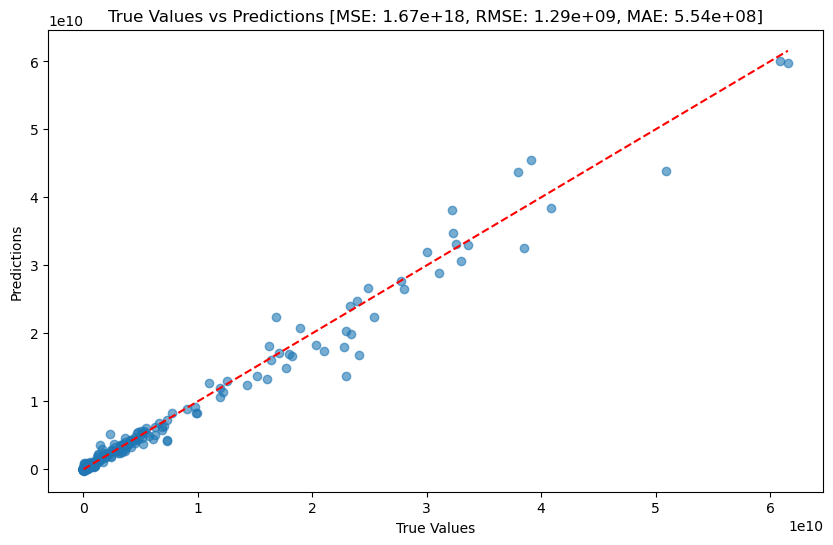

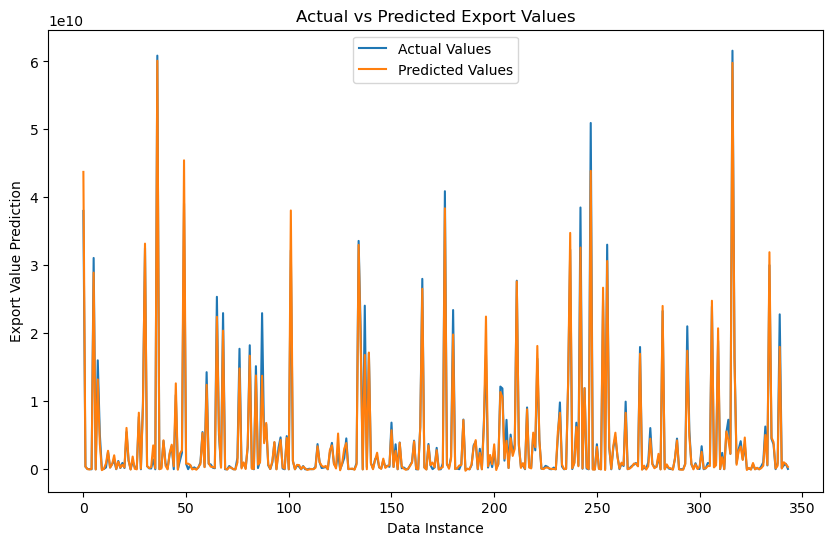

In [106]:
y_actual=output_df["true_label"].values
y_prediction=output_df["prediction"].values

# Plot Predictions vs True Values
plt.figure(figsize=(10, 6))
plt.scatter(y_actual, y_prediction, alpha=0.6)
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions [MSE: {:,.2e}, RMSE: {:,.2e}, MAE: {:,.2e}]'.format(mse,rmse,mae))
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual Values')
plt.plot(y_prediction, label='Predicted Values')
plt.xlabel('Data Instance')
plt.ylabel('Export Value Prediction')
plt.title('Actual vs Predicted Export Values')
plt.legend()
plt.show()